# PROBLEMA DE NEGÓCIO

O BANCO ESTAR PASSANDO POR UM PROBLEMA DE FRAUDE E O CEO DO BANCO PEDIU QUE SOLICITASSE UMA EQUIPE 
DE CIENTISTA DE DADOS PARA PREVER SE O PROXIMO CLIENTE TEM A INTENÇÃO DE FRAUDAR TAMBÉM

# IMPORTAÇÃO DE DADOS 

In [160]:
#Importação de pacotes
import warnings
import pandas as pd # Para manipular e tratar os dados
df = pd.read_csv('dadofraude.csv',thousands= " ") # Para exibir o dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
import time
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# PRIMEIRAS VISUALIZAÇÕES

In [161]:
df.head(10) 

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322090928715,42,M,4000.00,MA,17.00,140,2022-11-18,143,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),NaN,N,0.00,10,284.00,187861.70,1617.36,Sim
1,321990634715,31,M,3000.00,MA,20.00,28,2021-07-23,0,14000.00,16100.00,2,1,1,1,CASADO (A),NaN,N,0.00,26,771.00,16615.93,1239.98,Sim
2,321965373715,36,F,2100.00,SP,24.00,180,2021-04-01,149,60000.00,69000.00,4,1,0,1,CASADO (A),Nenhum,N,0.00,27,802.00,74443.40,1346.64,Sim
3,321967133715,28,M,2155.00,DF,19.00,190,2021-04-10,159,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),Nenhum,N,0.00,2,41.00,196812.41,22713.63,Nao
4,322098744715,21,F,4300.00,MG,22.00,100,2022-12-28,94,30000.00,34500.00,4,3,0,1,SOLTEIRO(A),Ensino Médio,N,0.00,6,162.00,36114.39,900.80,Sim
5,322091640715,32,M,6000.00,RS,22.00,100,2022-11-21,91,30000.00,34500.00,3,2,0,2,OUTRO,NaN,N,0.00,9,251.00,36379.10,675.60,Sim
6,322010858715,42,F,3800.00,PR,24.00,36,2021-10-18,15,10000.00,11500.00,25,23,0,0,CASADO (A),NaN,N,0.00,0,NaN,3911.25,9366.42,Nao
7,322011093715,30,F,6000.00,BA,20.00,200,2021-10-19,225,300000.00,345000.00,20,11,1,5,SOLTEIRO(A),Nenhum,N,0.00,1,103.00,341628.55,22798.00,Nao
8,322082506715,20,F,2024.74,MG,18.00,25,2022-10-17,13,14000.00,16100.00,13,8,0,0,SOLTEIRO(A),NaN,N,0.00,0,NaN,8064.00,8766.98,Nao
9,322051550715,41,F,4000.00,MG,18.00,25,2022-04-29,10,9000.00,10350.00,18,16,0,3,SOLTEIRO(A),NaN,N,0.00,0,NaN,2304.81,9016.67,Nao


In [162]:
df.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,54348.00,80143.00,80143.00
mean,322023695416.17,38.82,29308.62,19.49,102.33,93.28,72847.78,83774.94,10.71,5.24,2.34,1.30,1.45,10.65,475.26,78622.32,9687.98
std,44697010.94,12.53,2748166.27,3.56,62.32,70.64,87407.93,100519.12,9.31,6.21,3.97,1.27,355.10,10.43,269.79,102318.95,19090.62
min,321944855715.00,4.00,0.00,4.49,14.00,-18.00,3000.00,3450.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,321984967215.00,29.00,2050.00,18.00,55.00,36.00,15000.00,17250.00,2.00,1.00,0.00,0.00,0.00,0.00,284.00,12122.76,1052.16
50%,322024156715.00,37.00,3000.00,20.00,80.00,78.00,40000.00,46000.00,8.00,2.00,1.00,1.00,0.00,9.00,468.00,35489.36,3951.39
75%,322062662215.00,46.00,5000.00,21.00,170.00,156.00,100000.00,115000.00,18.00,7.00,3.00,2.00,0.00,20.00,708.00,117783.25,10886.24
max,322099706715.00,103.00,765000000.00,28.00,240.00,227.00,500000.00,575000.00,66.00,66.00,31.00,38.00,100000.00,34.00,1014.00,626261.27,465821.39


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          80143 non-null  int64  
 1   Idade                             80143 non-null  int64  
 2   Sexo                              80143 non-null  object 
 3   Valor_Renda                       80143 non-null  float64
 4   UF_Cliente                        80143 non-null  object 
 5   Perc_Juros                        80143 non-null  float64
 6   Prazo_Emprestimo                  80143 non-null  int64  
 7   Data_Contratacao                  80143 non-null  object 
 8   Prazo_Restante                    80143 non-null  int64  
 9   VL_Emprestimo                     80143 non-null  float64
 10  VL_Emprestimo_ComJuros            80143 non-null  float64
 11  QT_Total_Parcelas_Pagas           80143 non-null  int64  
 12  QT_T

# MANIPULAÇÃO E TRATAMENTO DOS DADOS

### VERIFICANDO VALORES NULOS E DUPLICADO 

In [164]:
(df.isnull().sum() / len(df['Sexo']))*100

Contrato                            0.00
Idade                               0.00
Sexo                                0.00
Valor_Renda                         0.00
UF_Cliente                          0.00
Perc_Juros                          0.00
Prazo_Emprestimo                    0.00
Data_Contratacao                    0.00
Prazo_Restante                      0.00
VL_Emprestimo                       0.00
VL_Emprestimo_ComJuros              0.00
QT_Total_Parcelas_Pagas             0.00
QT_Total_Parcelas_Pagas_EmDia       0.00
QT_Total_Parcelas_Pagas_EmAtraso    0.00
Qt_Renegociacao                     0.00
Estado_Civil                        0.00
Escolaridade                       71.49
Possui_Patrimonio                   0.00
VL_Patrimonio                       0.00
QT_Parcelas_Atraso                  0.00
QT_Dias_Atraso                     32.19
Saldo_Devedor                       0.00
Total_Pago                          0.00
Possivel_Fraude                     0.00
dtype: float64

In [165]:
del df['Escolaridade']

In [166]:
mediana = df['QT_Dias_Atraso'].median()
df['QT_Dias_Atraso'] = df['QT_Dias_Atraso'].fillna(mediana)


In [167]:
(df.isnull().sum() / len(df['Sexo']))*100

Contrato                           0.00
Idade                              0.00
Sexo                               0.00
Valor_Renda                        0.00
UF_Cliente                         0.00
Perc_Juros                         0.00
Prazo_Emprestimo                   0.00
Data_Contratacao                   0.00
Prazo_Restante                     0.00
VL_Emprestimo                      0.00
VL_Emprestimo_ComJuros             0.00
QT_Total_Parcelas_Pagas            0.00
QT_Total_Parcelas_Pagas_EmDia      0.00
QT_Total_Parcelas_Pagas_EmAtraso   0.00
Qt_Renegociacao                    0.00
Estado_Civil                       0.00
Possui_Patrimonio                  0.00
VL_Patrimonio                      0.00
QT_Parcelas_Atraso                 0.00
QT_Dias_Atraso                     0.00
Saldo_Devedor                      0.00
Total_Pago                         0.00
Possivel_Fraude                    0.00
dtype: float64

In [168]:
# convertendo variavel
df['Data_Contratacao'] = pd.to_datetime(df['Data_Contratacao'], format='%Y-%m-%d', errors='coerce')

In [169]:
df.duplicated().sum()

0

# ANÁLISE EXPLORATÓRIA

### ESTATÍSTICA

In [170]:
df.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,80143.00,80143.00,80143.00,80143.00,80143.00,80143,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00
mean,322023695416.17,38.82,29308.62,19.49,102.33,2021-12-26 12:01:44.034039040,93.28,72847.78,83774.94,10.71,5.24,2.34,1.30,1.45,10.65,472.92,78622.32,9687.98
min,321944855715.00,4.00,0.00,4.49,14.00,2020-11-25 00:00:00,-18.00,3000.00,3450.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,321984967215.00,29.00,2050.00,18.00,55.00,2021-07-01 00:00:00,36.00,15000.00,17250.00,2.00,1.00,0.00,0.00,0.00,0.00,376.00,12122.76,1052.16
50%,322024156715.00,37.00,3000.00,20.00,80.00,2021-12-13 00:00:00,78.00,40000.00,46000.00,8.00,2.00,1.00,1.00,0.00,9.00,468.00,35489.36,3951.39
75%,322062662215.00,46.00,5000.00,21.00,170.00,2022-06-29 00:00:00,156.00,100000.00,115000.00,18.00,7.00,3.00,2.00,0.00,20.00,589.00,117783.25,10886.24
max,322099706715.00,103.00,765000000.00,28.00,240.00,2023-02-22 00:00:00,227.00,500000.00,575000.00,66.00,66.00,31.00,38.00,100000.00,34.00,1014.00,626261.27,465821.39
std,44697010.94,12.53,2748166.27,3.56,62.32,NaN,70.64,87407.93,100519.12,9.31,6.21,3.97,1.27,355.10,10.43,222.20,102318.95,19090.62


### MODA

In [171]:
from statistics import mode

mode(df['Idade'])

29

In [172]:
mode(df['Valor_Renda'])

3000.0

In [173]:
mode(df['Perc_Juros']) 

18.0

In [174]:
mode(df['Prazo_Emprestimo'])

100

In [175]:
mode(df['VL_Emprestimo'])

30000.0

In [176]:
mode(df['VL_Emprestimo_ComJuros'])

34500.0

In [177]:
mode(df['QT_Total_Parcelas_Pagas'])

1

In [178]:
mode(df['QT_Total_Parcelas_Pagas_EmAtraso'])

0

In [179]:
mode(df['QT_Parcelas_Atraso'])

0

In [180]:
mode(df['QT_Dias_Atraso'])

468.0

In [181]:
mode(df['Saldo_Devedor'])

0.0

In [182]:
mode(df['Total_Pago'])

0.0

### ASSIMETRIA

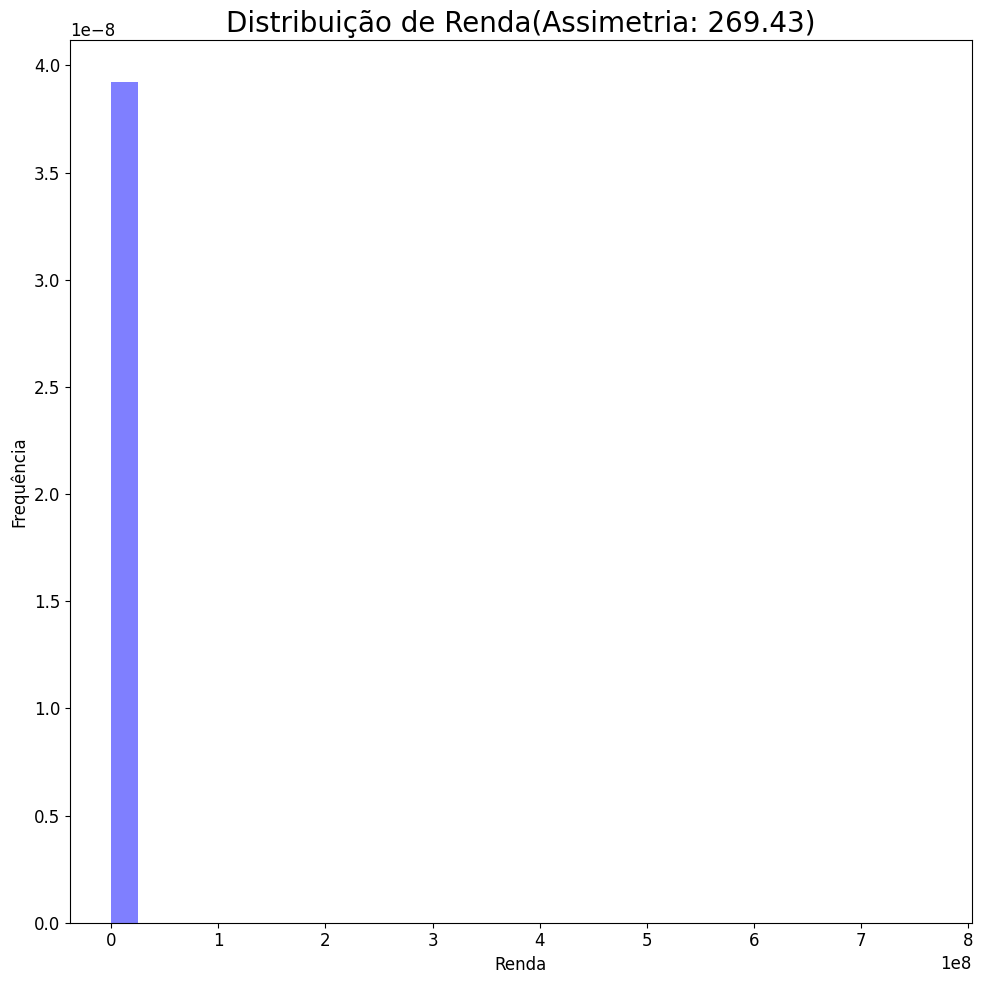

In [183]:
from scipy.stats import skew

Valor_Renda = df['Valor_Renda']

# Calculando a assimetria dos dados
assimetria = skew(Valor_Renda)

# Criando um histograma para visualizar a distribuição dos dados
plt.hist(Valor_Renda, bins=30, density=True, alpha=0.5, color='b')

# Adicionando informações ao gráfico
plt.title(f'Distribuição de Renda(Assimetria: {assimetria:.2f})')
plt.xlabel('Renda')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

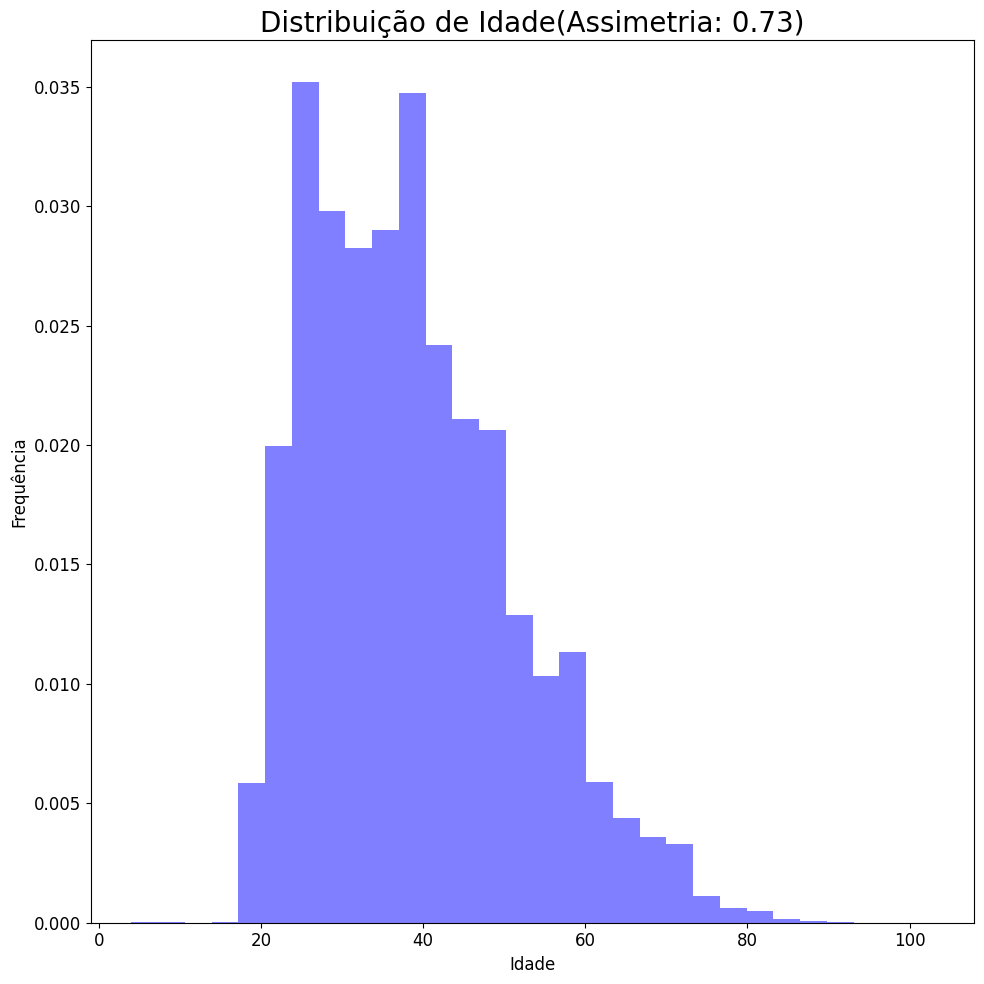

In [184]:
Idade = df['Idade']

assimetria = skew(Idade)


plt.hist(Idade, bins=30, density=True, alpha=0.5, color='b')

plt.title(f'Distribuição de Idade(Assimetria: {assimetria:.2f})')
plt.xlabel('Idade')
plt.ylabel('Frequência')


plt.show()

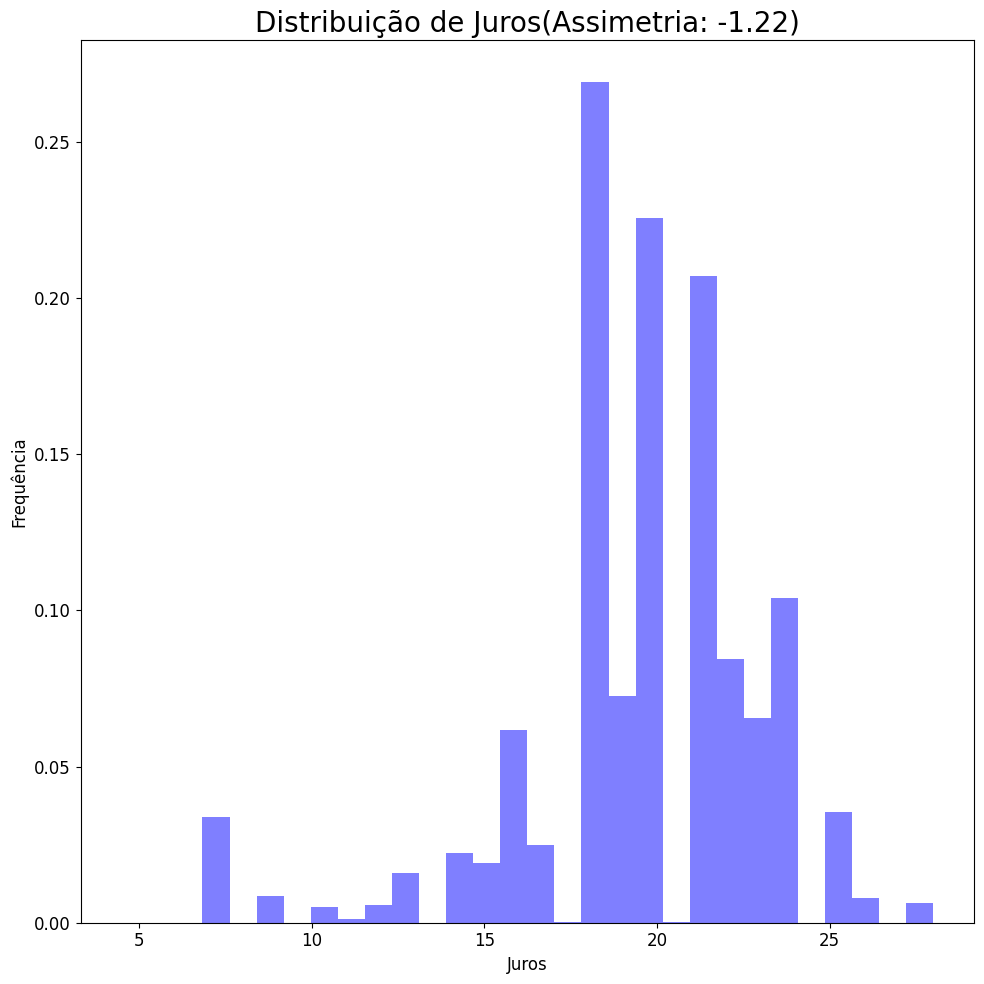

In [185]:
Perc_Juros = df['Perc_Juros']


assimetria = skew(Perc_Juros)


plt.hist(Perc_Juros, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de Juros(Assimetria: {assimetria:.2f})')
plt.xlabel('Juros')
plt.ylabel('Frequência')

plt.show()

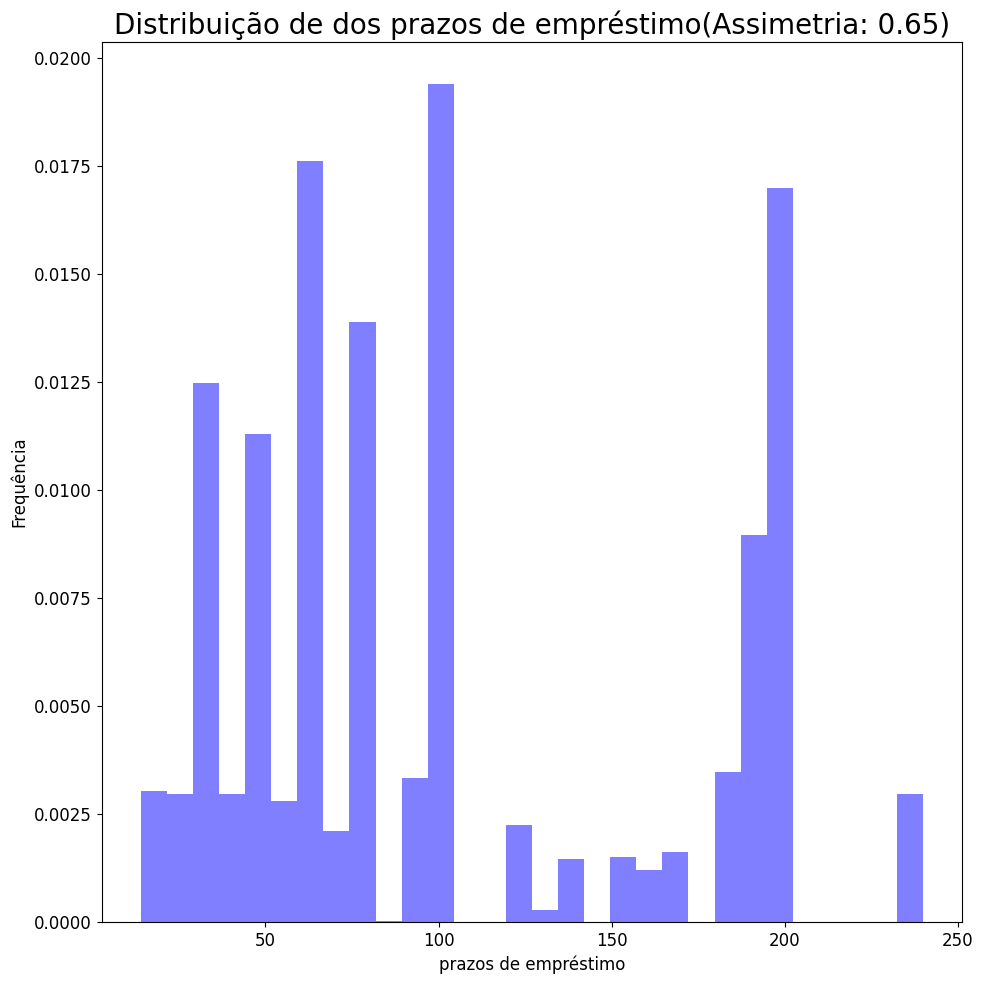

In [186]:
Prazo_Emprestimo = df['Prazo_Emprestimo']


assimetria = skew(Prazo_Emprestimo)


plt.hist(Prazo_Emprestimo, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de dos prazos de empréstimo(Assimetria: {assimetria:.2f})')
plt.xlabel('prazos de empréstimo')
plt.ylabel('Frequência')

plt.show()

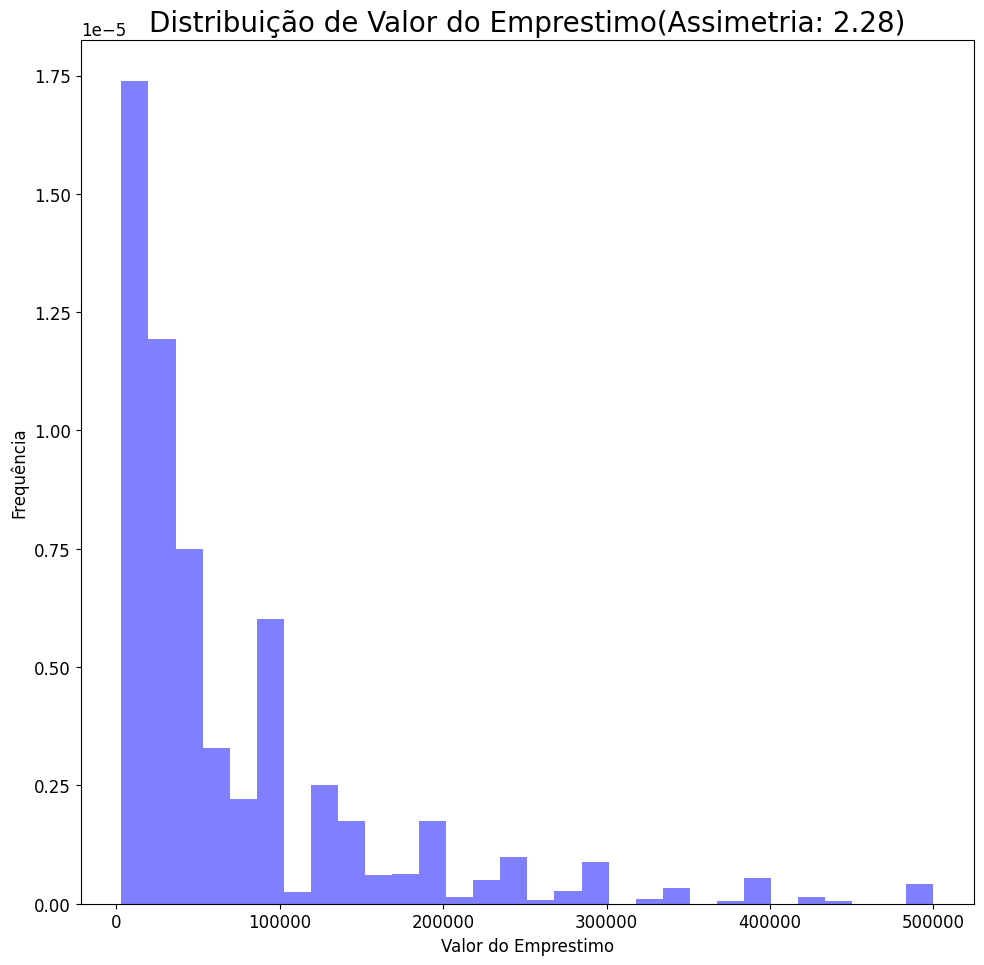

In [187]:
VL_Emprestimo = df['VL_Emprestimo']


assimetria = skew(VL_Emprestimo)


plt.hist(VL_Emprestimo, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de Valor do Emprestimo(Assimetria: {assimetria:.2f})')
plt.xlabel('Valor do Emprestimo')
plt.ylabel('Frequência')

plt.show()

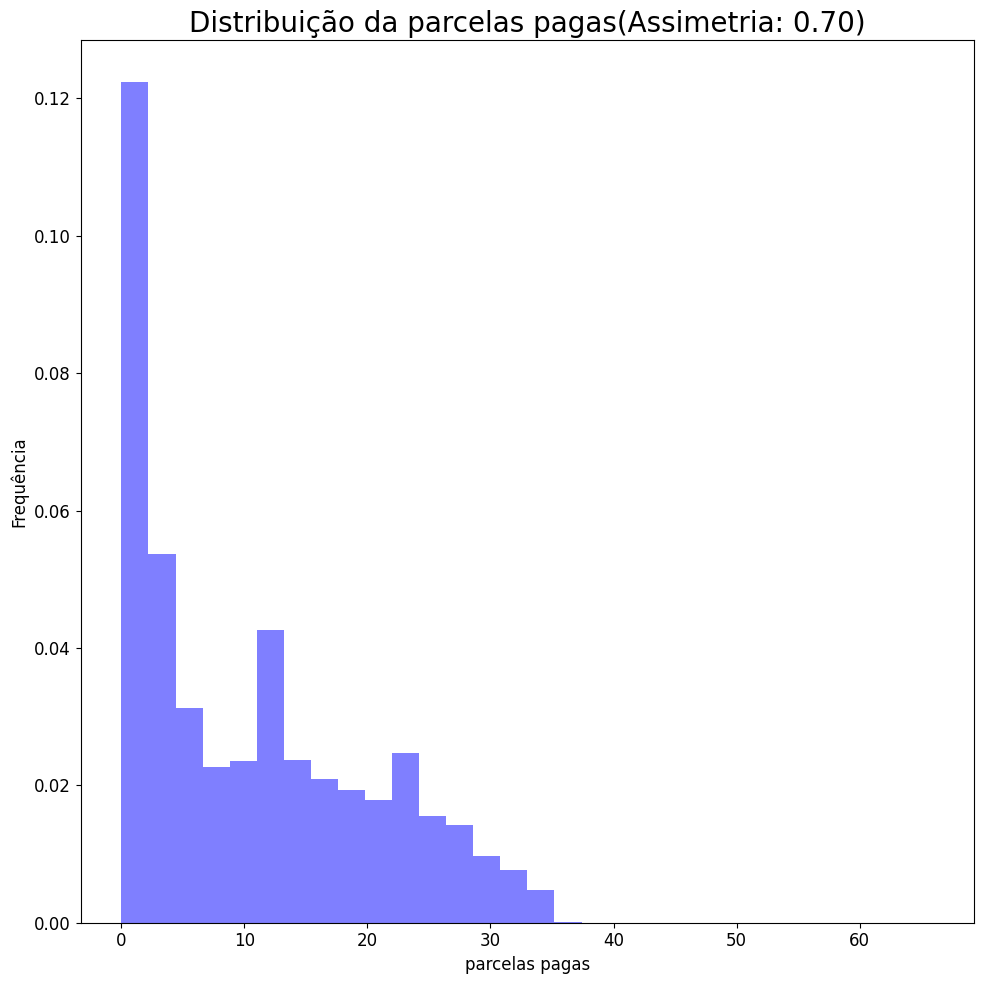

In [188]:
QT_Total_Parcelas_Pagas = df['QT_Total_Parcelas_Pagas']


assimetria = skew(QT_Total_Parcelas_Pagas)


plt.hist(QT_Total_Parcelas_Pagas, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição da parcelas pagas(Assimetria: {assimetria:.2f})')
plt.xlabel('parcelas pagas')
plt.ylabel('Frequência')

plt.show()

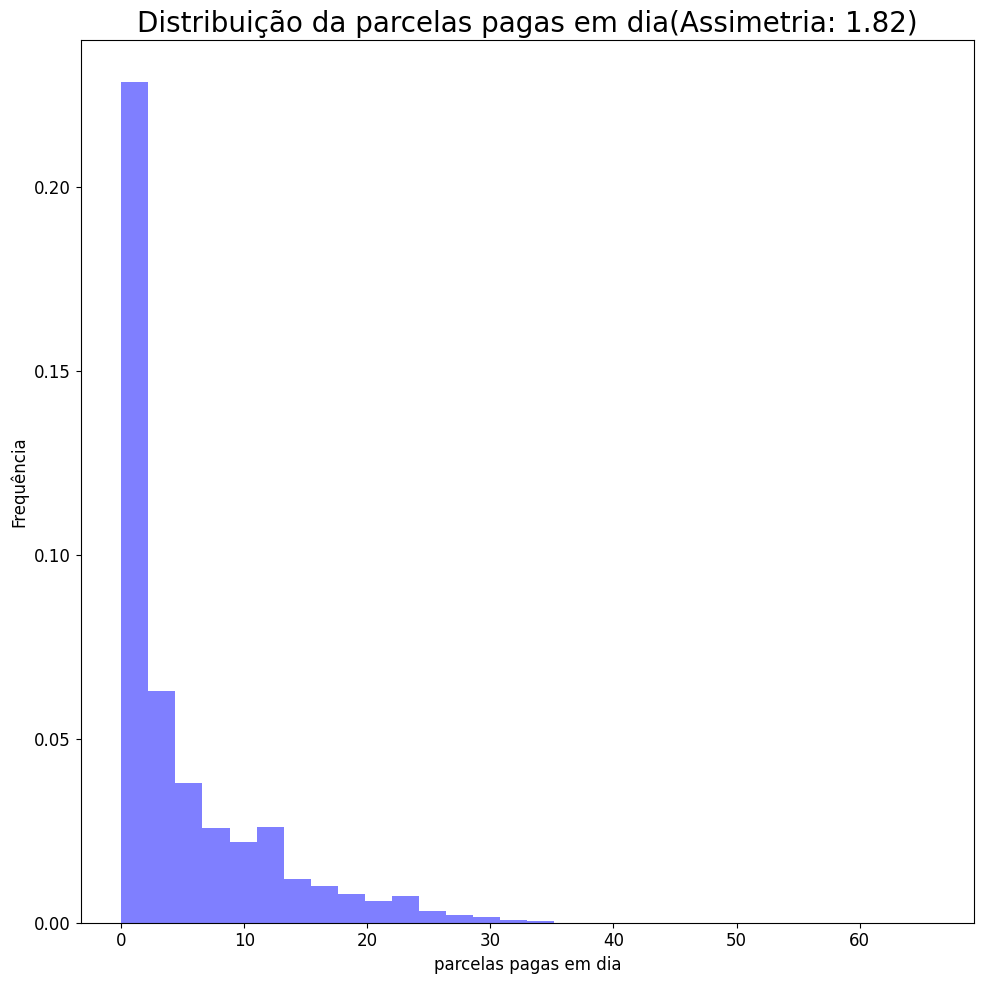

In [189]:
QT_Total_Parcelas_Pagas_EmDia = df['QT_Total_Parcelas_Pagas_EmDia']


assimetria = skew(QT_Total_Parcelas_Pagas_EmDia)


plt.hist(QT_Total_Parcelas_Pagas_EmDia, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição da parcelas pagas em dia(Assimetria: {assimetria:.2f})')
plt.xlabel('parcelas pagas em dia')
plt.ylabel('Frequência')

plt.show()

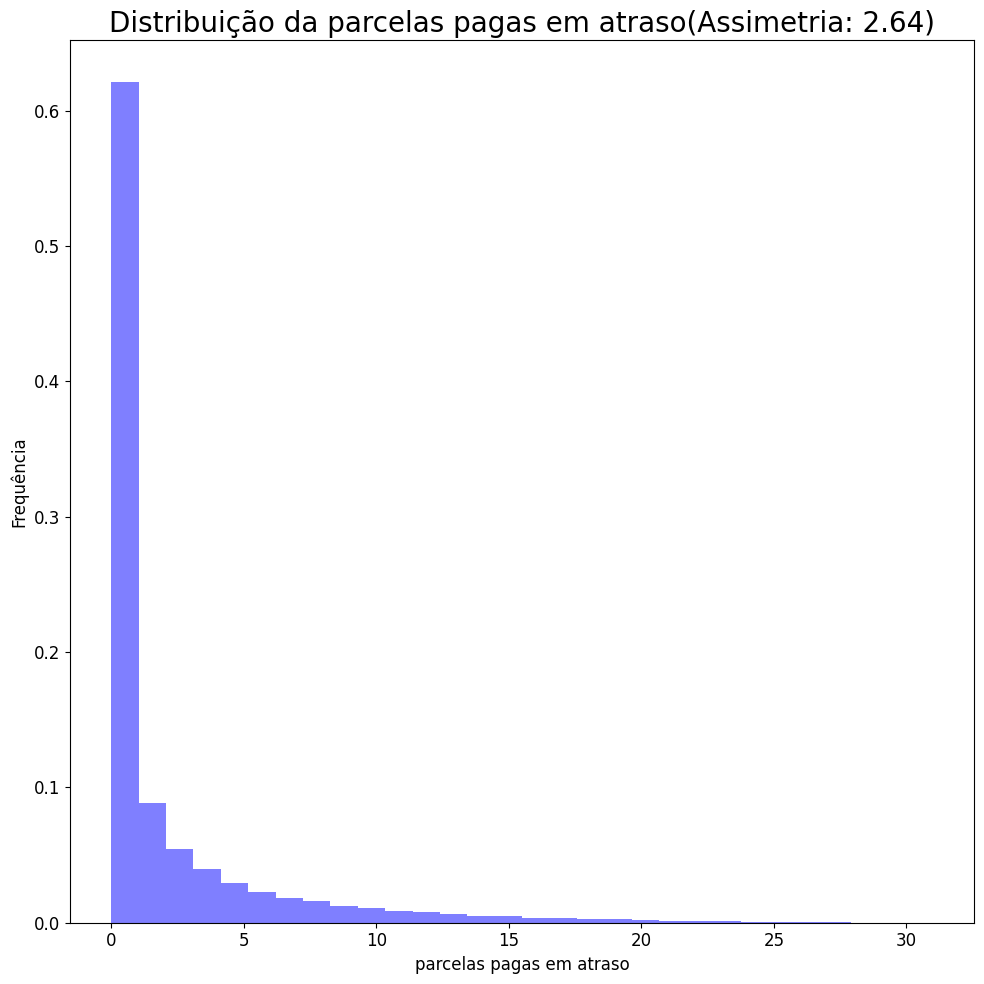

In [190]:
QT_Total_Parcelas_Pagas_EmAtraso = df['QT_Total_Parcelas_Pagas_EmAtraso']


assimetria = skew(QT_Total_Parcelas_Pagas_EmAtraso)


plt.hist(QT_Total_Parcelas_Pagas_EmAtraso, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição da parcelas pagas em atraso(Assimetria: {assimetria:.2f})')
plt.xlabel('parcelas pagas em atraso')
plt.ylabel('Frequência')

plt.show()

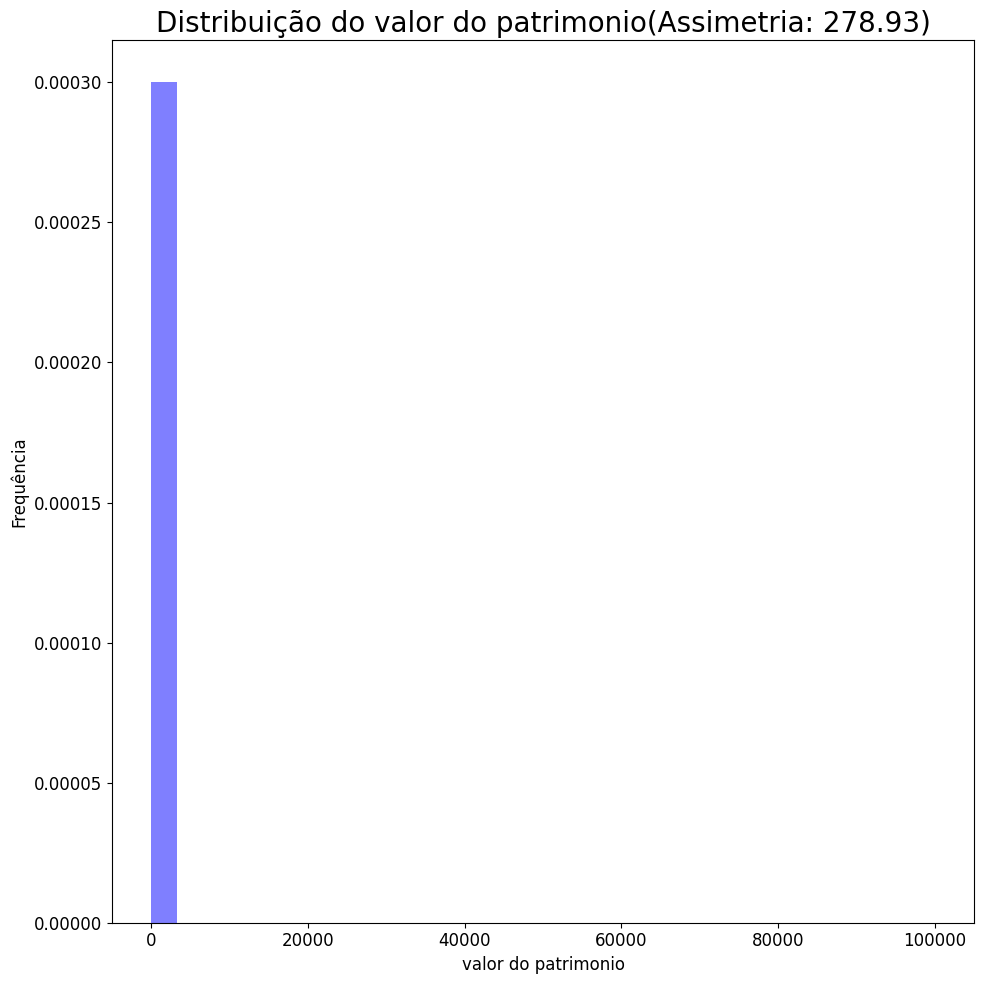

In [191]:
VL_Patrimonio = df['VL_Patrimonio']


assimetria = skew(VL_Patrimonio)


plt.hist(VL_Patrimonio, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição do valor do patrimonio(Assimetria: {assimetria:.2f})')
plt.xlabel('valor do patrimonio')
plt.ylabel('Frequência')

plt.show()

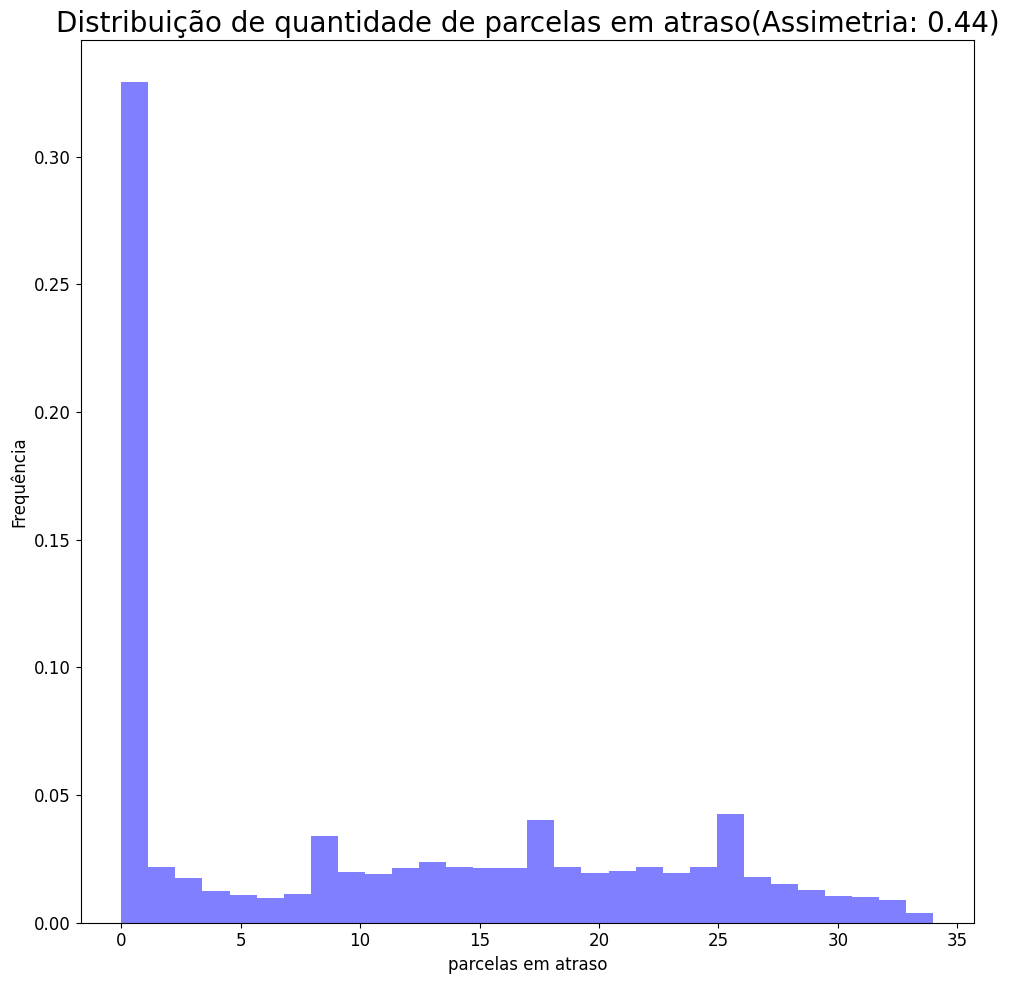

In [192]:
QT_Parcelas_Atraso = df['QT_Parcelas_Atraso']


assimetria = skew(QT_Parcelas_Atraso)


plt.hist(QT_Parcelas_Atraso, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição de quantidade de parcelas em atraso(Assimetria: {assimetria:.2f})')
plt.xlabel('parcelas em atraso')
plt.ylabel('Frequência')

plt.show()

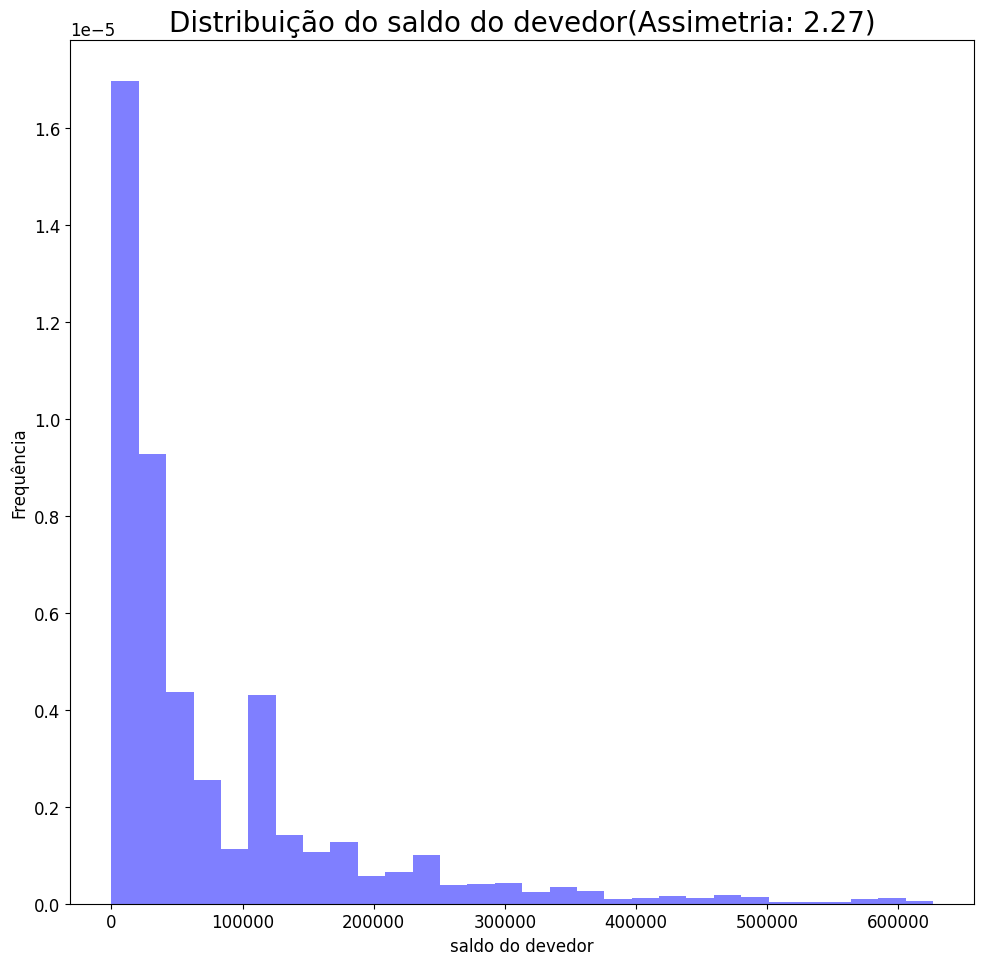

In [193]:
Saldo_Devedor = df['Saldo_Devedor']


assimetria = skew(Saldo_Devedor)


plt.hist(Saldo_Devedor, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição do saldo do devedor(Assimetria: {assimetria:.2f})')
plt.xlabel('saldo do devedor')
plt.ylabel('Frequência')

plt.show()

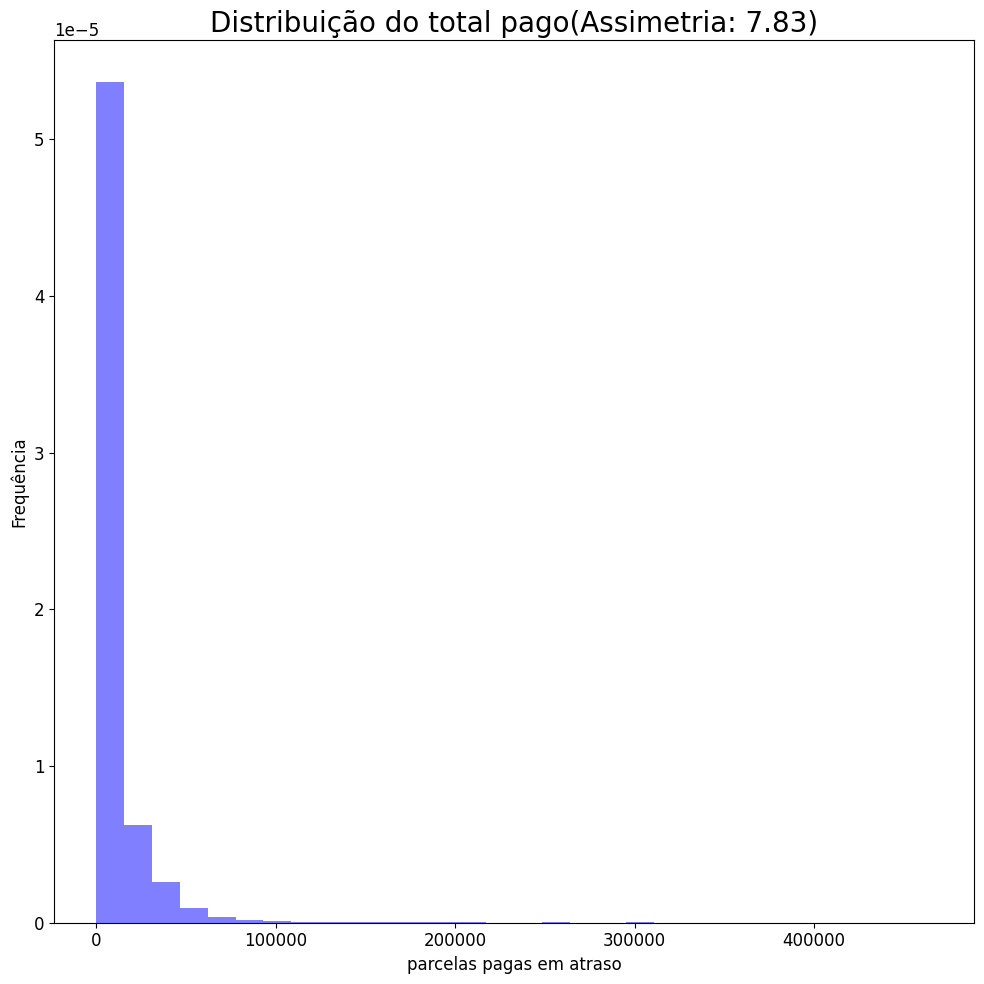

In [194]:
Total_Pago = df['Total_Pago']


assimetria = skew(Total_Pago)


plt.hist(Total_Pago, bins=30, density=True, alpha=0.5, color='b')


plt.title(f'Distribuição do total pago(Assimetria: {assimetria:.2f})')
plt.xlabel('parcelas pagas em atraso')
plt.ylabel('Frequência')

plt.show()

### CURTOSE

In [195]:
df['Idade'].kurt()

0.12106510419731187

In [196]:
df['Valor_Renda'].kurt()

74917.00085012075

In [197]:
df['Perc_Juros'].kurt()

2.8304152385613848

In [198]:
df['VL_Emprestimo'].kurt()

5.946122034192699

In [199]:
df['VL_Emprestimo_ComJuros'].kurt()

5.946122034192703

In [200]:
df['QT_Total_Parcelas_Pagas'].kurt()

-0.6575277033947944

In [201]:
df['QT_Total_Parcelas_Pagas_EmDia'].kurt()

3.242451457568708

In [202]:
df['QT_Total_Parcelas_Pagas_EmAtraso'].kurt()

7.962376273153927

In [203]:
df['Qt_Renegociacao'].kurt()

10.961914802648215

In [204]:
df['VL_Patrimonio'].kurt()

78478.41403100688

In [205]:
df['QT_Parcelas_Atraso'].kurt()

-1.222530028058299

In [206]:
df['QT_Dias_Atraso'].kurt()

-0.06317524355689974

In [207]:
df['Saldo_Devedor'].kurt()

5.912693755390636

In [208]:
df['Total_Pago'].kurt()

101.69020358706616

### HISTOGRAMA

array([[<Axes: title={'center': 'Contrato'}>,
        <Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'Valor_Renda'}>,
        <Axes: title={'center': 'Perc_Juros'}>],
       [<Axes: title={'center': 'Prazo_Emprestimo'}>,
        <Axes: title={'center': 'Data_Contratacao'}>,
        <Axes: title={'center': 'Prazo_Restante'}>,
        <Axes: title={'center': 'VL_Emprestimo'}>],
       [<Axes: title={'center': 'VL_Emprestimo_ComJuros'}>,
        <Axes: title={'center': 'QT_Total_Parcelas_Pagas'}>,
        <Axes: title={'center': 'QT_Total_Parcelas_Pagas_EmDia'}>,
        <Axes: title={'center': 'QT_Total_Parcelas_Pagas_EmAtraso'}>],
       [<Axes: title={'center': 'Qt_Renegociacao'}>,
        <Axes: title={'center': 'VL_Patrimonio'}>,
        <Axes: title={'center': 'QT_Parcelas_Atraso'}>,
        <Axes: title={'center': 'QT_Dias_Atraso'}>],
       [<Axes: title={'center': 'Saldo_Devedor'}>,
        <Axes: title={'center': 'Total_Pago'}>, <Axes: >, <Axes: >]],
      dt

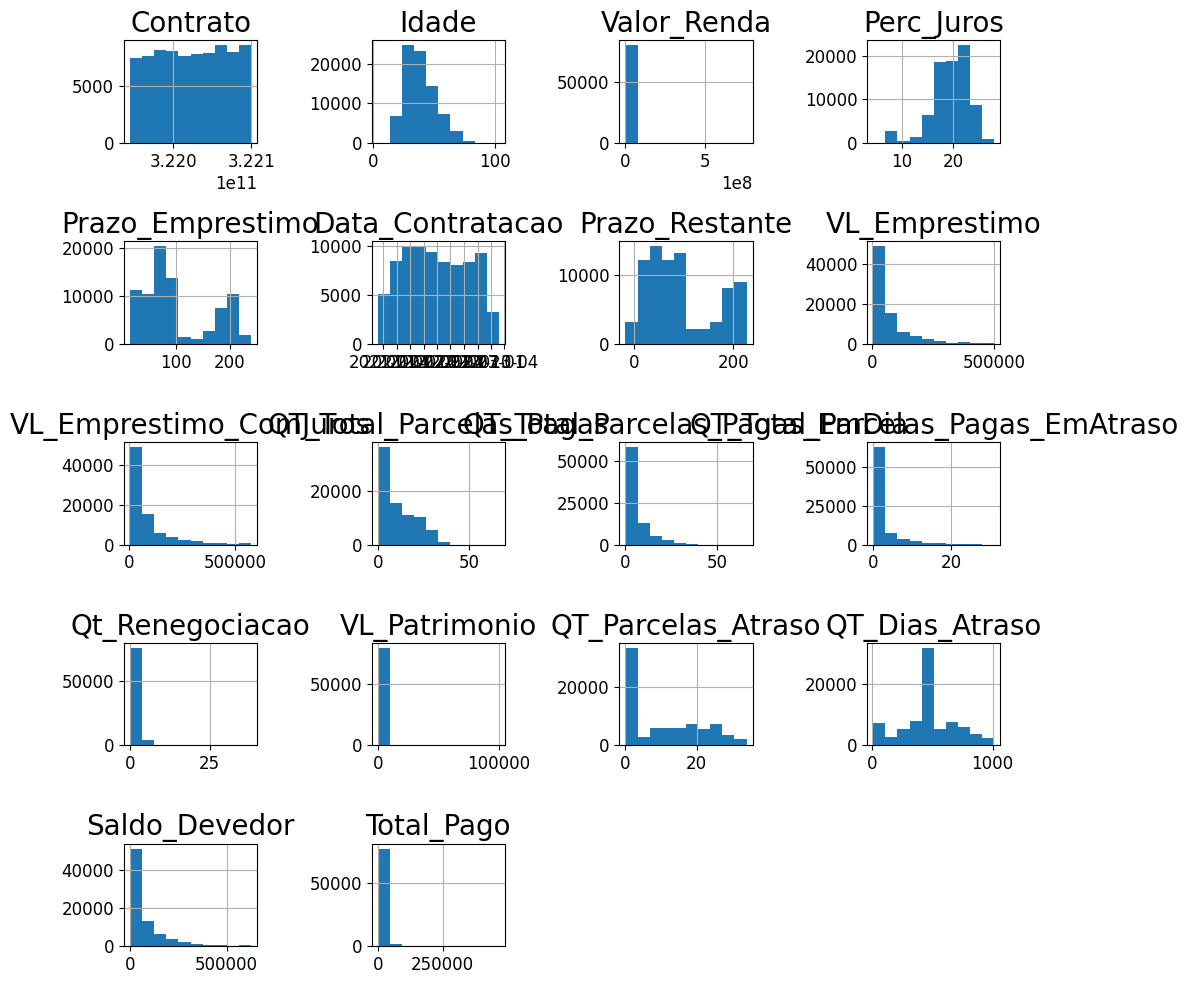

In [209]:
df.hist()

### TOTAL DE VALORES UNICOS EM CADA VARIAVEL

In [210]:
valores_unicos = []
for i in df.columns[0:12].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

Contrato : 80143
Idade : 86
Sexo : 2
Valor_Renda : 4747
UF_Cliente : 27
Perc_Juros : 53
Prazo_Emprestimo : 60
Data_Contratacao : 751
Prazo_Restante : 93
VL_Emprestimo : 73
VL_Emprestimo_ComJuros : 73
QT_Total_Parcelas_Pagas : 50


### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

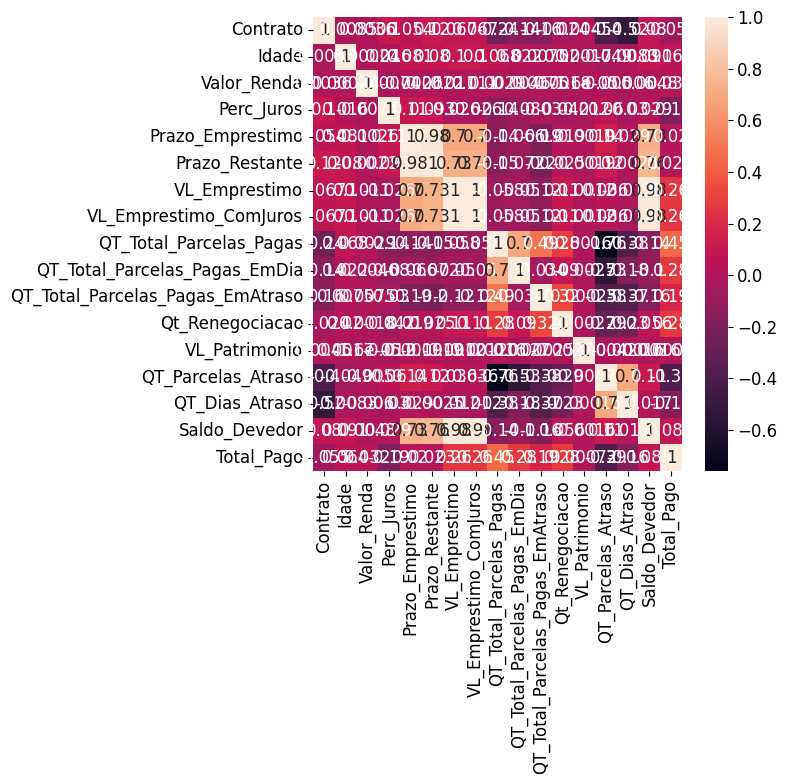

In [211]:
# Correlação
# A correção é utilizada para entender como as variaveis se relacionam entre si.
# A correção vai de -1 até +1 onde -1 significa uma forte correção negativa e +1 significa uma forte correlação positiva.
# Correlação NÃO é causalidade, ou seja, uma relação entre as variaveis não significa que uma é a causa do valor da outra.


# Remover colunas não numéricas, se necessário
df_numeric = df.select_dtypes(include=['number'])

# Gerar o heatmap de correlação
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

Contrato : int64
Idade : int64
Valor_Renda : float64
Perc_Juros : float64
Prazo_Emprestimo : int64
Prazo_Restante : int64
VL_Emprestimo : float64
VL_Emprestimo_ComJuros : float64
QT_Total_Parcelas_Pagas : int64
QT_Total_Parcelas_Pagas_EmDia : int64
QT_Total_Parcelas_Pagas_EmAtraso : int64
Qt_Renegociacao : int64


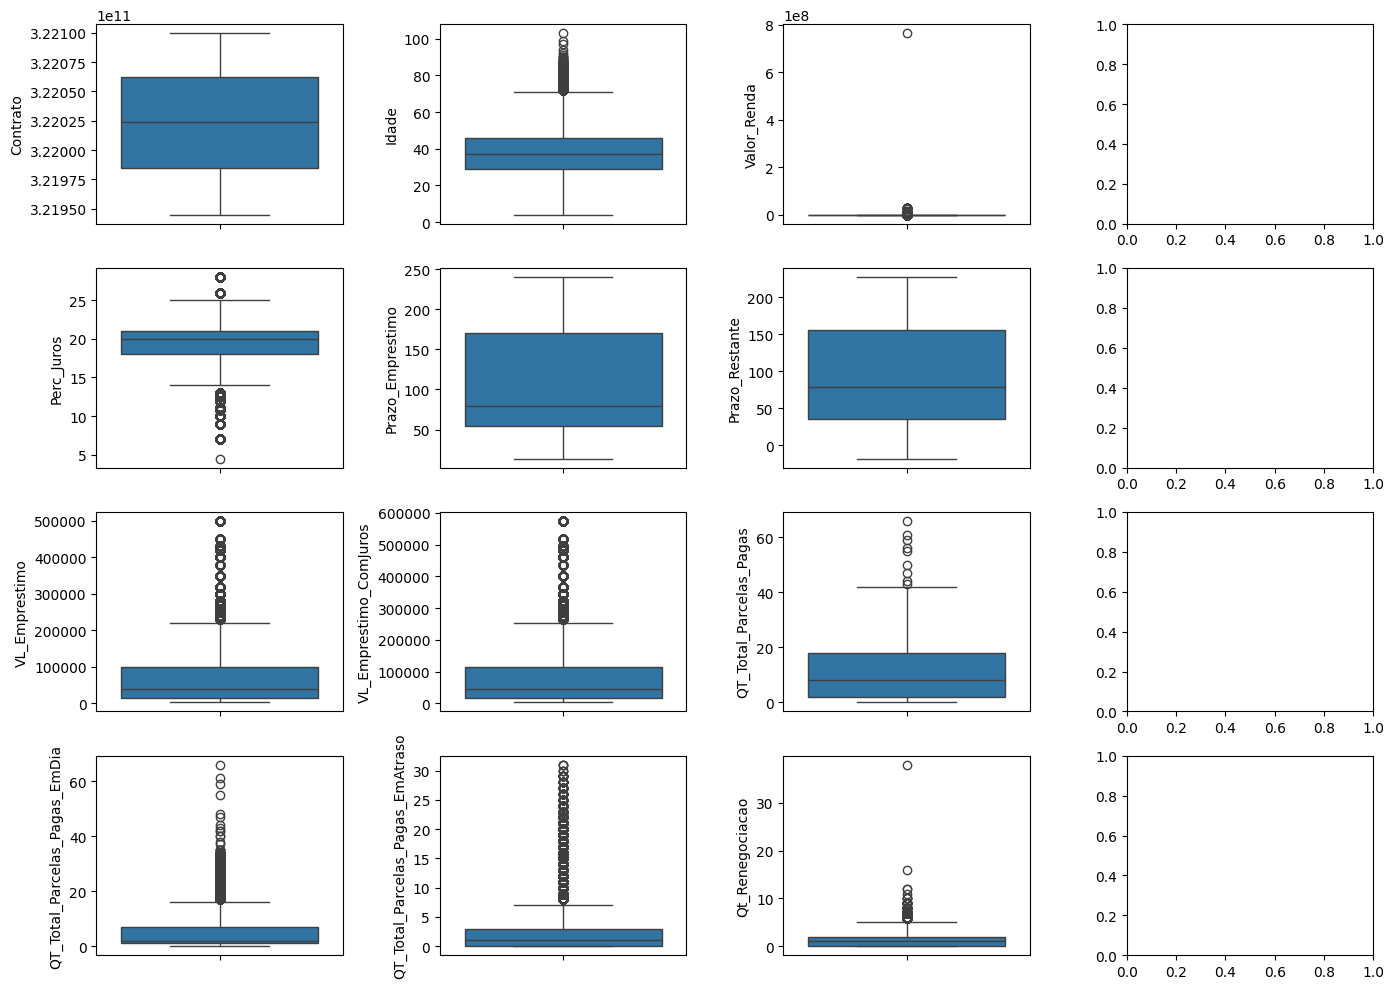

In [212]:
variaveis_numericas = []
for i in df.columns[0:16].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(4, 4) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

In [213]:
# Cria o encoder
lb = LabelEncoder()
df['Possivel_Fraude'] = lb.fit_transform(df['Possivel_Fraude'])

# Remove valores missing eventualmente gerados
df.dropna(inplace = True)

# ANÁLISE DE DADOS

In [214]:
df.head(1)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322090928715,42,M,4000.00,MA,17.00,140,2022-11-18,143,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),N,0.00,10,284.00,187861.70,1617.36,1


## AGRUPAMENTO DE DADOS 

In [215]:
df.groupby(df['Idade']).size()

Idade
4         2
6         1
7         1
8         1
9         1
10        1
17       12
18       60
19      424
20     1065
21     1533
22     1688
23     2059
24     2047
25     2310
26     2516
27     2431
28     2641
29     2652
30     2591
31     2512
32     2532
33     2429
34     2493
35     2577
36     2596
37     2333
38     2340
39     2301
40     2214
41     2325
42     2078
43     1997
44     2056
45     1831
46     1691
47     1503
48     1386
49     1366
50     1202
51     1293
52     1056
53     1060
54      977
55      934
56      825
57      781
58      772
59      733
60      716
61      558
62      533
63      470
64      418
65      364
66      379
67      308
68      312
69      332
70      285
71      226
72      148
73      210
74      112
75       93
76       95
77       63
78       59
79       37
80       46
81       33
82       30
83       24
84       19
85       11
86        9
87        5
88        7
89        3
90        3
91        1
92        1
94        

In [216]:
df.groupby(df['Sexo']).size()

Sexo
F    31643
M    48500
dtype: int64

In [331]:
df.groupby(df['UF_Cliente']).size()

UF_Cliente
0        25
1       867
2        76
3        23
4      6709
5      2050
6       583
7       312
8      3860
9      3593
10    13718
11     2120
12      984
13     3443
14     1442
15     2502
16      731
17     5794
18     2462
19      759
20       55
21       15
22     3500
23     2555
24      415
25    21393
26      157
dtype: int64

In [218]:
df.groupby(df['Data_Contratacao']).size()

Data_Contratacao
2020-11-25      1
2021-01-01      1
2021-01-02     22
2021-01-03      2
2021-01-04     86
2021-01-05    118
2021-01-06    120
2021-01-07    186
2021-01-08    218
2021-01-09    130
2021-01-10     15
2021-01-11    207
2021-01-12    129
2021-01-13    117
2021-01-14    128
2021-01-15    144
2021-01-16     86
2021-01-17      3
2021-01-18    178
2021-01-19    174
2021-01-20    196
2021-01-21    172
2021-01-22    189
2021-01-23     50
2021-01-24      3
2021-01-25    118
2021-01-26    116
2021-01-27    113
2021-01-28    154
2021-01-29    194
2021-01-30    128
2021-01-31     29
2021-02-01    124
2021-02-02    112
2021-02-03     90
2021-02-04    115
2021-02-05    164
2021-02-06     83
2021-02-07      5
2021-02-08    160
2021-02-09    155
2021-02-10    152
2021-02-11    154
2021-02-12    165
2021-02-13     66
2021-02-14      2
2021-02-15     70
2021-02-16     58
2021-02-17    224
2021-02-18    177
2021-02-19    192
2021-02-20     91
2021-02-21      4
2021-02-22    310
2021-02-23 

In [219]:
df.groupby(df['Estado_Civil']).size()

Estado_Civil
CASADO (A)                23576
DIVORCIADO                 3783
NENHUM                        4
OUTRO                      5912
SEPARADO JUDICIALMENTE        4
SOLTEIRO(A)               45205
UNIÃO ESTAVEL               501
VIÚVO(A)                   1158
dtype: int64

In [220]:
df.groupby(df['Possui_Patrimonio']).size()

Possui_Patrimonio
N    79785
S      358
dtype: int64

In [221]:
df.groupby(df['Possivel_Fraude']).size()

Possivel_Fraude
0    35632
1    44511
dtype: int64

## PLOTANDO EM UM GRAFÍCO

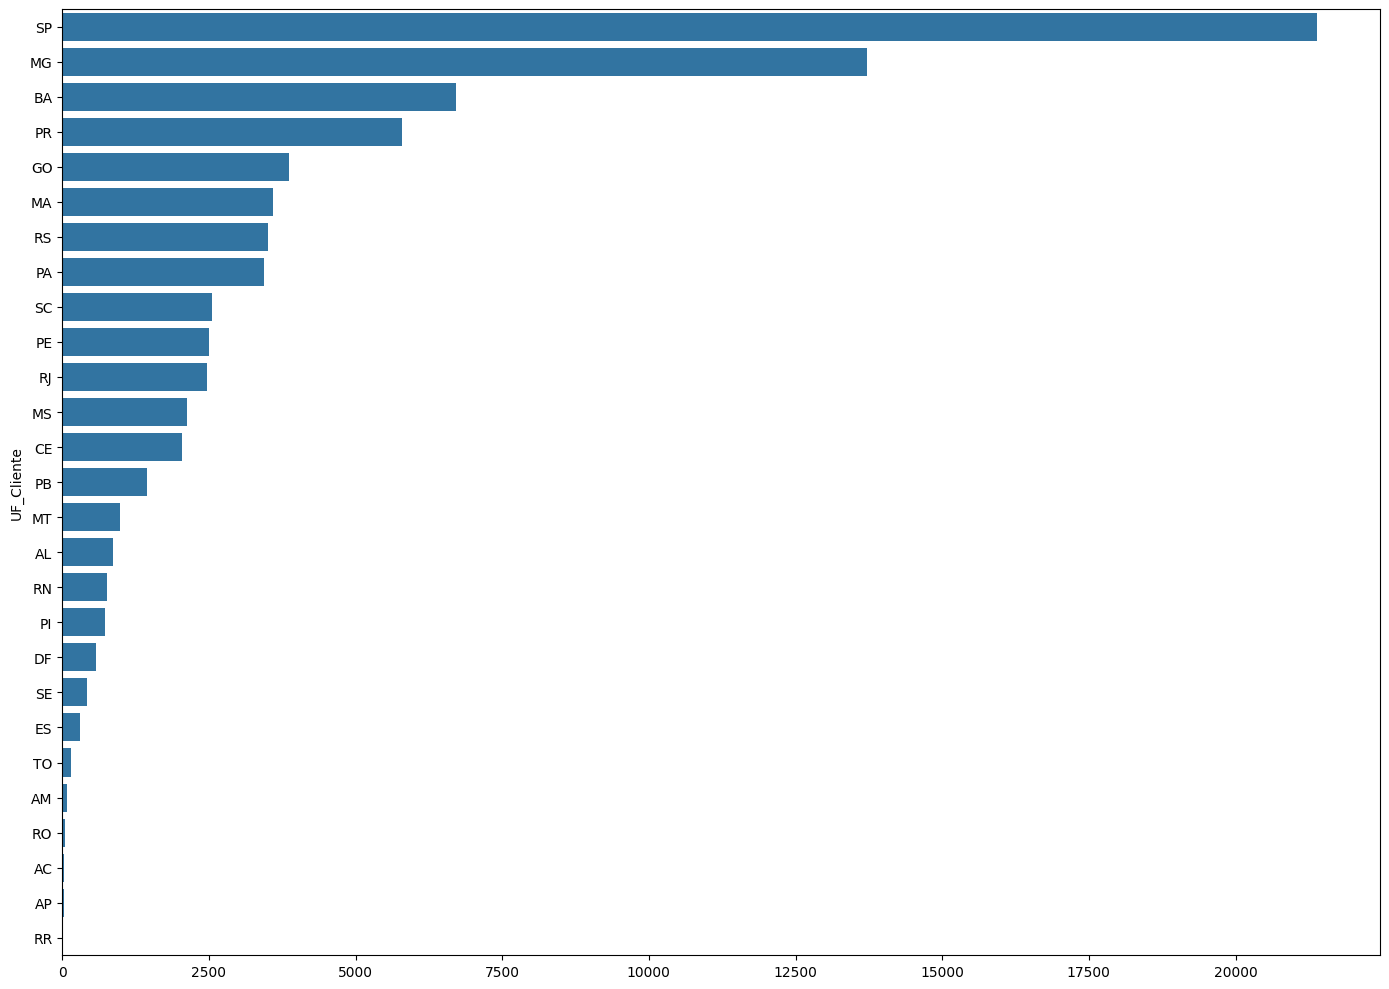

In [222]:

x = df['UF_Cliente'].value_counts().values
y = df['UF_Cliente'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

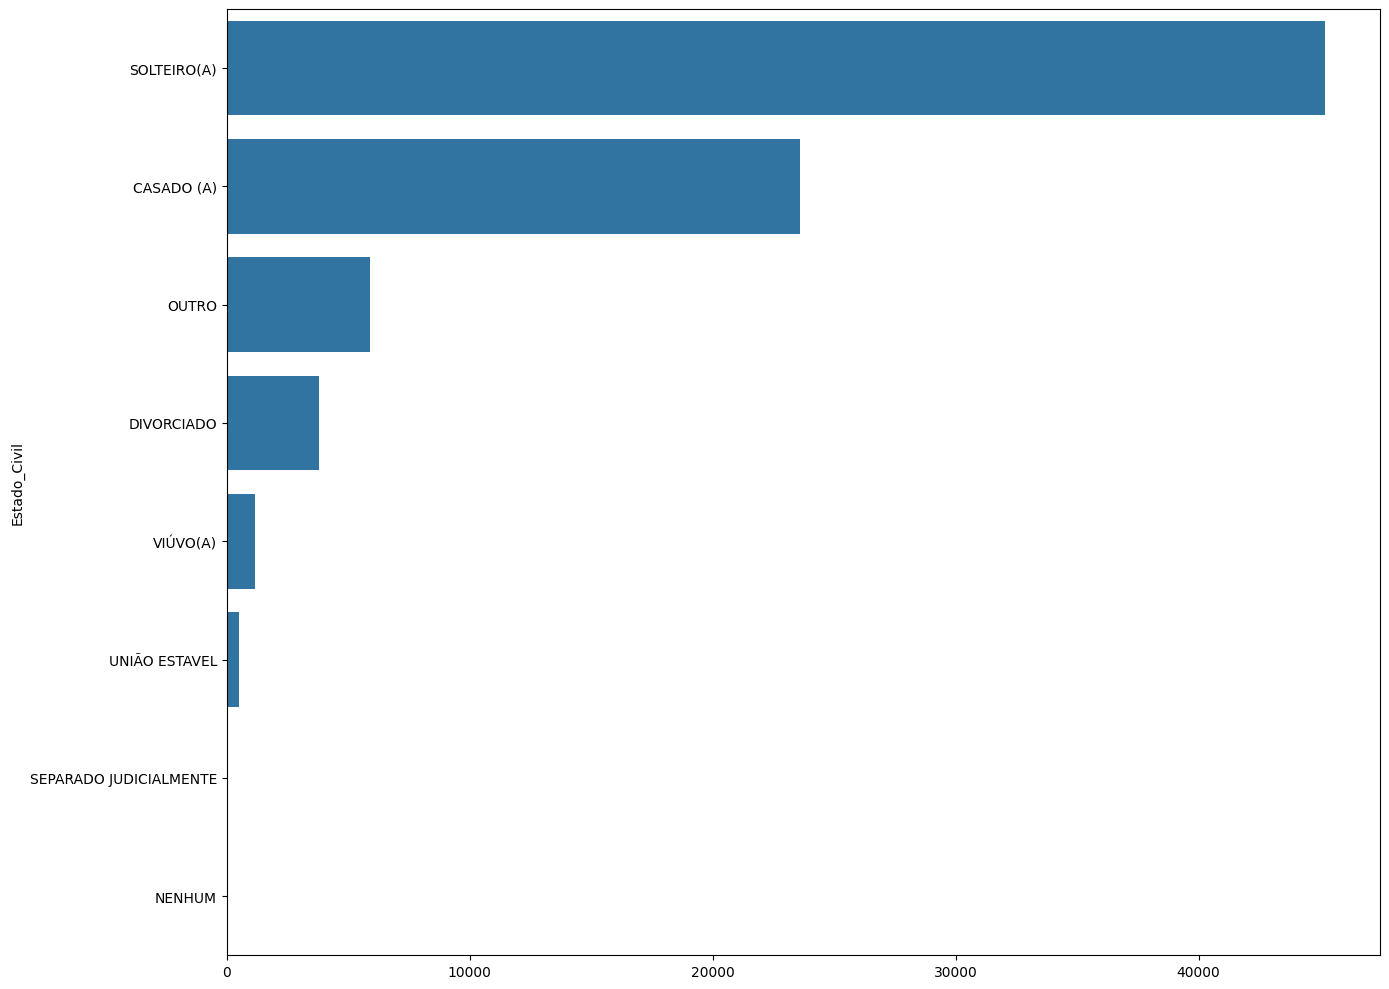

In [223]:
x = df['Estado_Civil'].value_counts().values
y = df['Estado_Civil'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

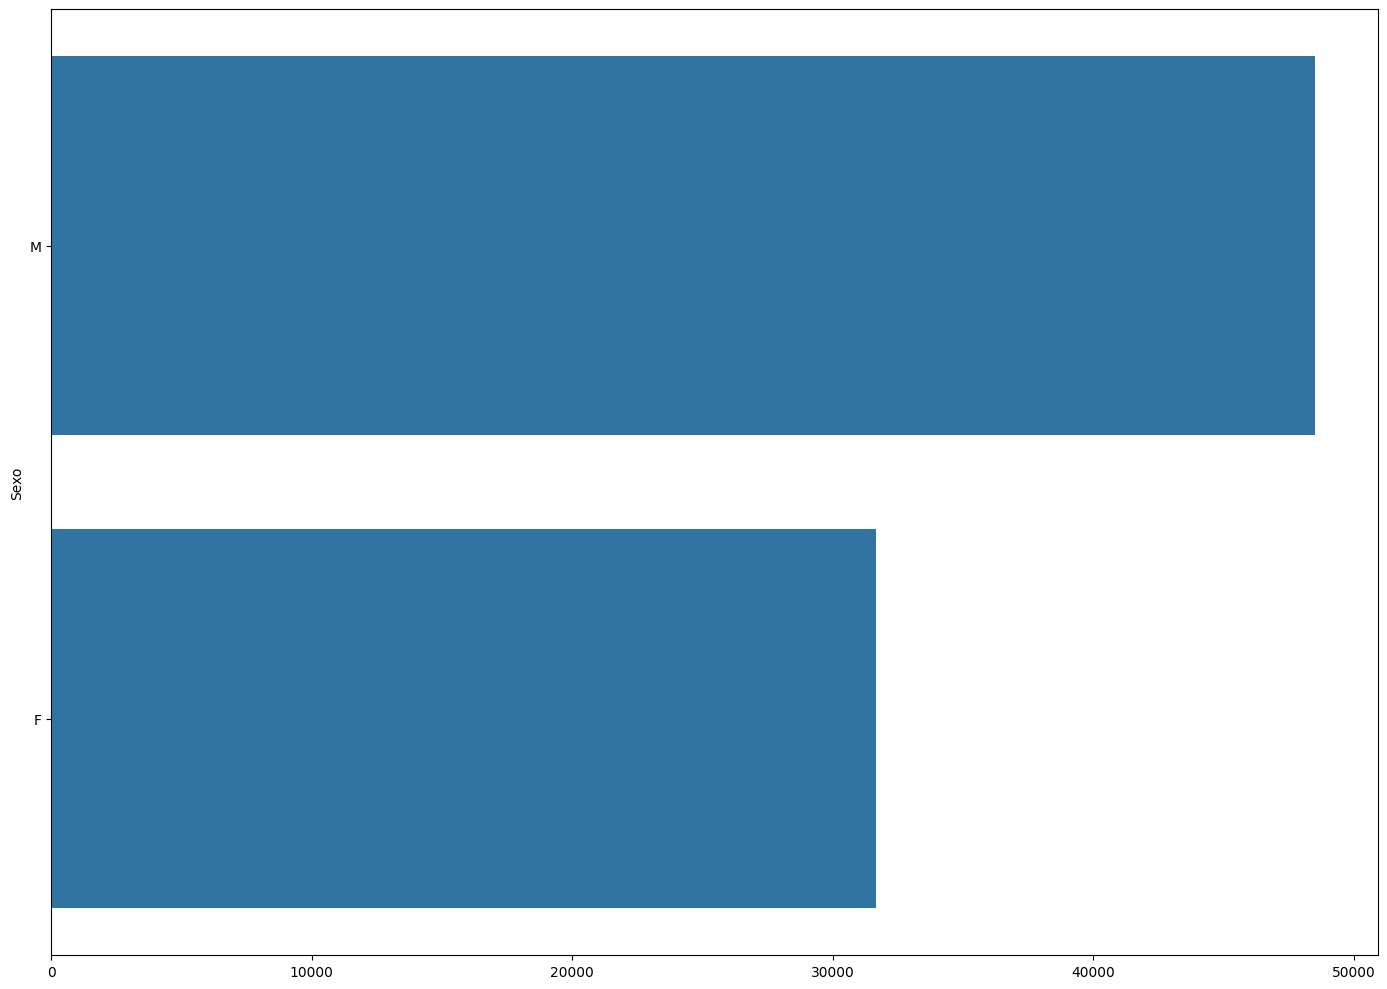

In [224]:
x = df['Sexo'].value_counts().values
y = df['Sexo'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

<Axes: xlabel='Possivel_Fraude', ylabel='count'>

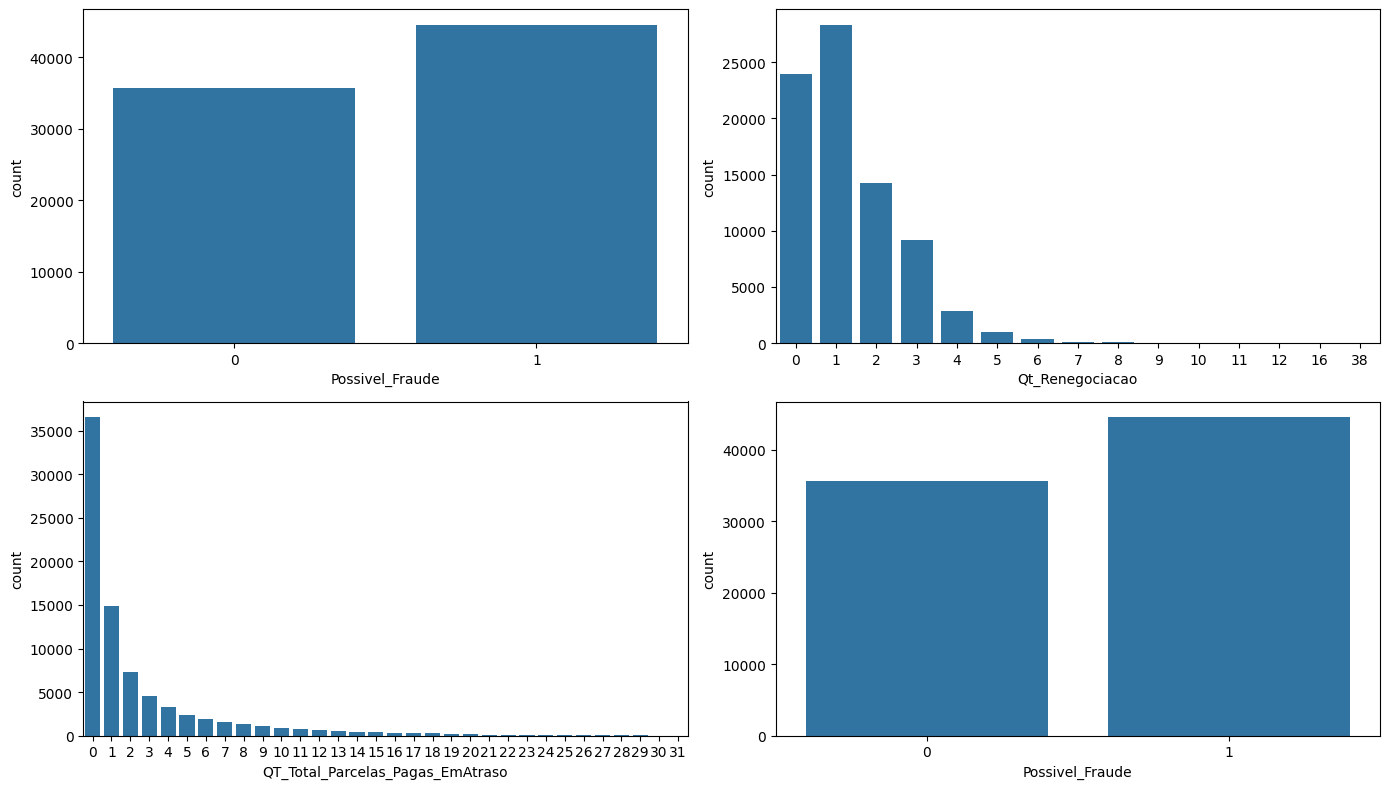

In [225]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df, x="Possivel_Fraude", ax=axes[0][0])
sns.countplot(data = df, x="Qt_Renegociacao", ax=axes[0][1])
sns.countplot(data = df, x="QT_Total_Parcelas_Pagas_EmAtraso", ax=axes[1][0])
sns.countplot(data = df, x="Possivel_Fraude", ax=axes[1][1])

### COMO NÃO HOUVE FRAUDES VAMOS APENAS ANALISAR O LUCRO POR DATA

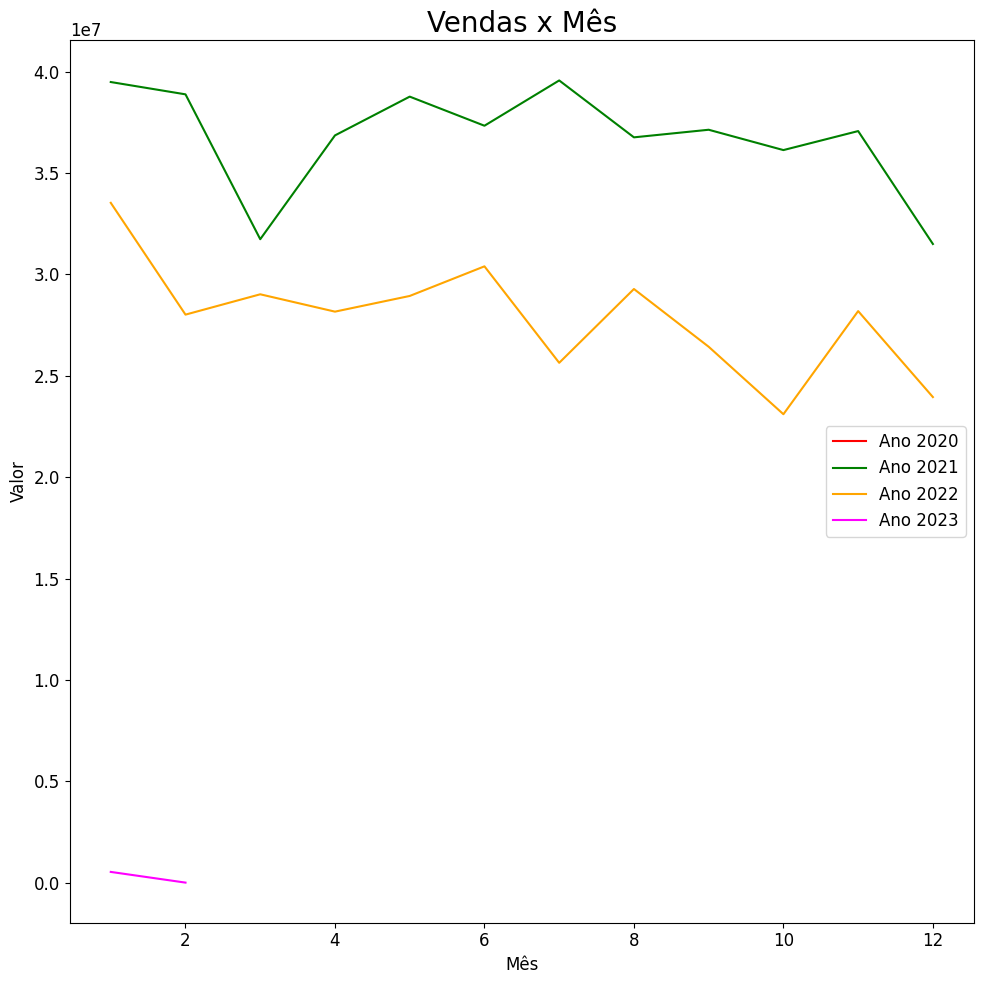

In [226]:
# Reiniciando o matplotlib
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
df['Data_Contratacao'] = pd.to_datetime(df['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
df_2020 = df[df["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
df_2021 = df[df["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
df_2022 = df[df["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
df_2023 = df[df["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
df_2020.groupby(df_2020["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='red', label='Ano 2020')
df_2021.groupby(df_2021["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='green', label='Ano 2021')
df_2022.groupby(df_2022["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='orange', label='Ano 2022')
df_2023.groupby(df_2023["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Vendas x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

plt.legend()
plt.show()


In [227]:
# ANALISANDO 2020
(df_2020.groupby(df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
11-2020,"35,305.52"


In [228]:
# ANALISANDO 2021
(df_2021.groupby(df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2021,"39,485,013.15"
02-2021,"38,877,705.55"
03-2021,"31,734,432.08"
04-2021,"36,853,007.84"
05-2021,"38,765,250.56"
06-2021,"37,329,972.91"
07-2021,"39,563,237.27"
08-2021,"36,757,453.45"
09-2021,"37,131,878.67"


In [229]:
# ANALISANDO 2022
(df_2022.groupby(df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2022,"33,528,484.16"
02-2022,"28,015,691.09"
03-2022,"29,018,266.42"
04-2022,"28,162,761.84"
05-2022,"28,936,142.70"
06-2022,"30,396,601.43"
07-2022,"25,639,469.71"
08-2022,"29,279,046.21"
09-2022,"26,431,083.11"


In [230]:
# ANALISANDO 2023
(df_2023.groupby(df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2023,"535,798.48"
02-2023,"7,930.09"


# UMA ANÁLISE DAS PESSOAS QUE NÃO FRAUDARAM

In [231]:
nao_fraude = df.loc[df['Possivel_Fraude'] == 0]
nao_fraude.head(1)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
3,321967133715,28,M,2155.00,DF,19.00,190,2021-04-10,159,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),N,0.00,2,41.00,196812.41,22713.63,0


### COMO NÃO HOUVE FRAUDES VAMOS APENAS ANALISAR O LUCRO 

Text(0.5, 0, 'Mês')

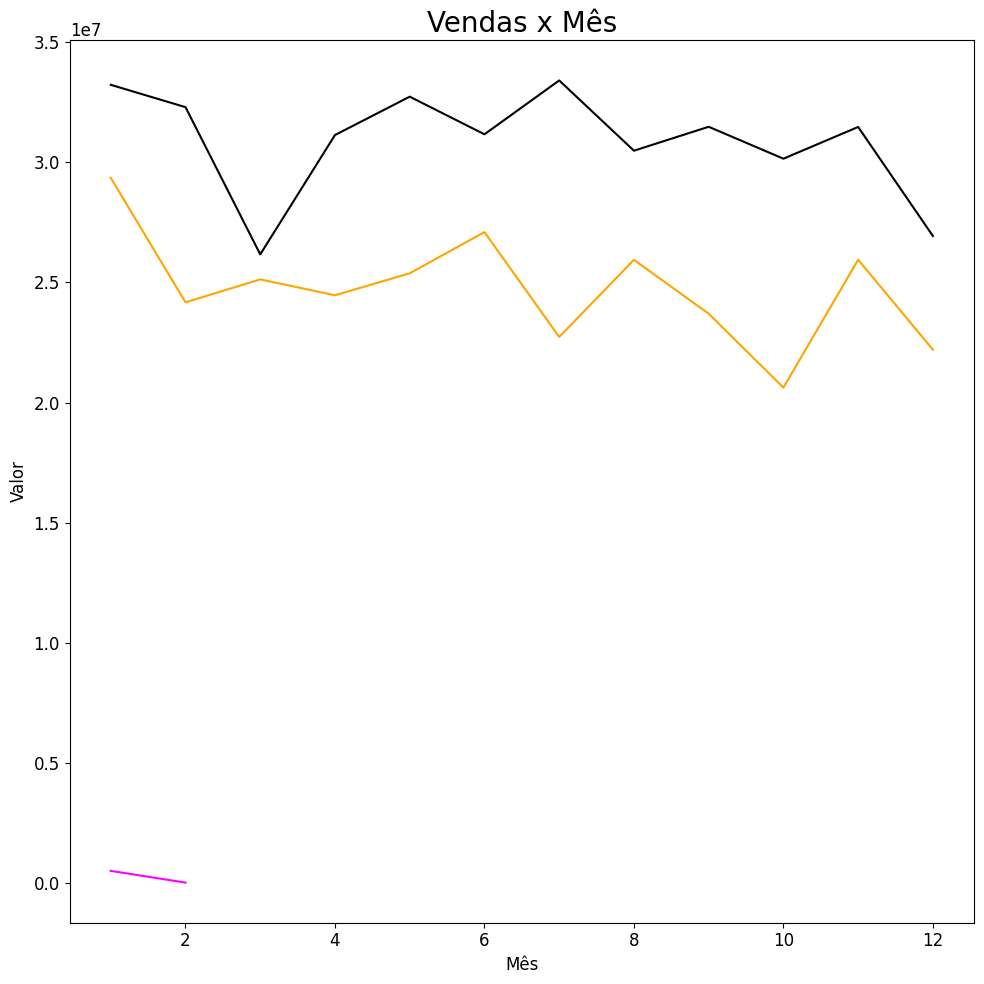

In [232]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
nao_fraude['Data_Contratacao'] = pd.to_datetime(nao_fraude['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
nao_fraude_df_2020 = nao_fraude[nao_fraude["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
nao_fraude_df_2021 = nao_fraude[nao_fraude["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
nao_fraude_df_2022 = nao_fraude[nao_fraude["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
nao_fraude_df_2023 = nao_fraude[nao_fraude["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
nao_fraude_df_2020.groupby(nao_fraude_df_2020["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='red', label='Ano 2020')
nao_fraude_df_2021.groupby(nao_fraude_df_2021["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='black', label='Ano 2021')
nao_fraude_df_2022.groupby(nao_fraude_df_2022["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='orange', label='Ano 2022')
nao_fraude_df_2023.groupby(nao_fraude_df_2023["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Vendas x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

In [233]:
# ANALISANDO 2020
(nao_fraude_df_2020.groupby(nao_fraude_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
11-2020,"35,305.52"


In [234]:
# ANALISANDO 2021
(nao_fraude_df_2021.groupby(nao_fraude_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2021,"33,233,780.36"
02-2021,"32,302,645.37"
03-2021,"26,170,866.49"
04-2021,"31,141,992.67"
05-2021,"32,739,519.28"
06-2021,"31,172,523.76"
07-2021,"33,415,620.48"
08-2021,"30,489,172.95"
09-2021,"31,485,601.89"


In [235]:
# ANALISANDO 2022
(nao_fraude_df_2022.groupby(nao_fraude_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2022,"29,360,522.68"
02-2022,"24,174,025.93"
03-2022,"25,128,933.18"
04-2022,"24,467,109.30"
05-2022,"25,381,798.74"
06-2022,"27,099,679.18"
07-2022,"22,732,679.80"
08-2022,"25,942,837.35"
09-2022,"23,700,100.42"


In [236]:
# ANALISANDO 2023
(nao_fraude_df_2023.groupby(nao_fraude_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,


## SEGMENTAÇÃO POR FAIXA ETARIA DE IDADE

### JOVENS

In [237]:
jovens = nao_fraude[nao_fraude['Idade']<=29] 
jovens['Idade'].value_counts().sum()

8525

In [238]:
jovens.head(1)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
3,321967133715,28,M,2155.00,DF,19.00,190,2021-04-10,159,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),N,0.00,2,41.00,196812.41,22713.63,0


### ANALISANDO POR SEXO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO, SOMA LUCROS

### PARCELAS PAGAS EM DIA e PARCELAS PAGAS

In [239]:
quantidade = jovens.groupby(["Sexo"])["Idade"].count().rename('Quantidade')
mediarenda = jovens.groupby(['Sexo'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =jovens.groupby(['Sexo'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = jovens.groupby(['Sexo'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = jovens.groupby(['Sexo'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = jovens.groupby(['Sexo'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = jovens.groupby(['Sexo'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = jovens.groupby(['Sexo'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
Sexo,,,,,,,,
M,5447,"$2,500.00",$20.00,"$30,000.00","$14,988.83","$85,748,443.01",9.33,0.84
F,3078,"$2,500.00",$20.00,"$25,000.00","$15,297.98","$40,738,582.11",9.29,0.84


### ANALISANDO POR ESTADO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO E SOMA LUCRO

In [240]:
quantidade = jovens.groupby(["UF_Cliente"])["Idade"].count().rename('Quantidade')
mediarenda = jovens.groupby(['UF_Cliente'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =jovens.groupby(['UF_Cliente'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = jovens.groupby(['UF_Cliente'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = jovens.groupby(['UF_Cliente'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = jovens.groupby(['UF_Cliente'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = jovens.groupby(['UF_Cliente'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = jovens.groupby(['UF_Cliente'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
UF_Cliente,,,,,,,,
SP,2197,"$2,500.00",$20.00,"$30,000.00","$19,620.45","$31,979,688.28",9.65,0.74
MG,2019,"$2,400.00",$20.00,"$20,000.00","$10,332.00","$31,400,024.65",9.09,0.79
BA,806,"$2,000.00",$20.00,"$20,000.00","$11,187.83","$11,544,540.68",7.60,0.90
PR,567,"$2,600.00",$20.00,"$30,000.00","$21,196.75","$8,655,587.64",10.02,0.82
GO,502,"$2,600.00",$19.00,"$30,000.00","$17,108.28","$7,949,462.12",10.04,1.03


### PLOTANDO EM UM GRAFICO AS INFORMAÇÕES

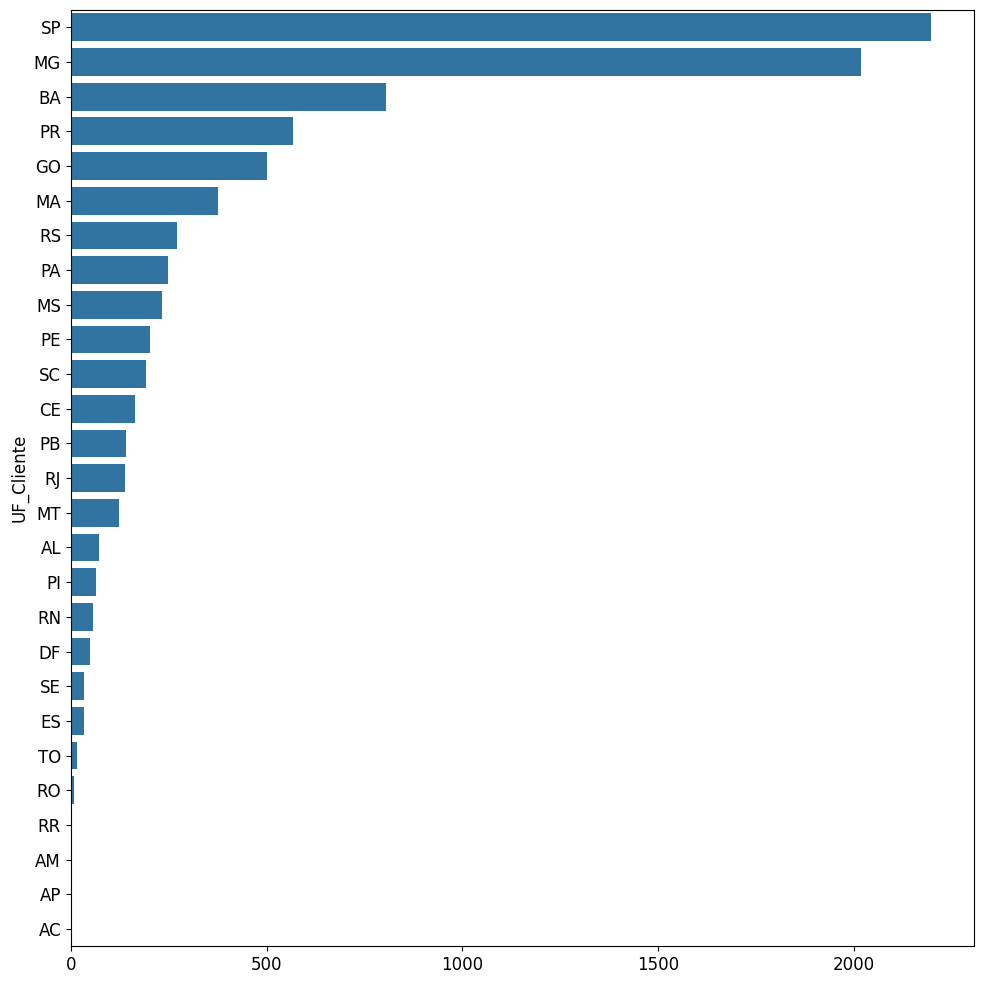

In [241]:
x = jovens['UF_Cliente'].value_counts().values
y = jovens['UF_Cliente'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

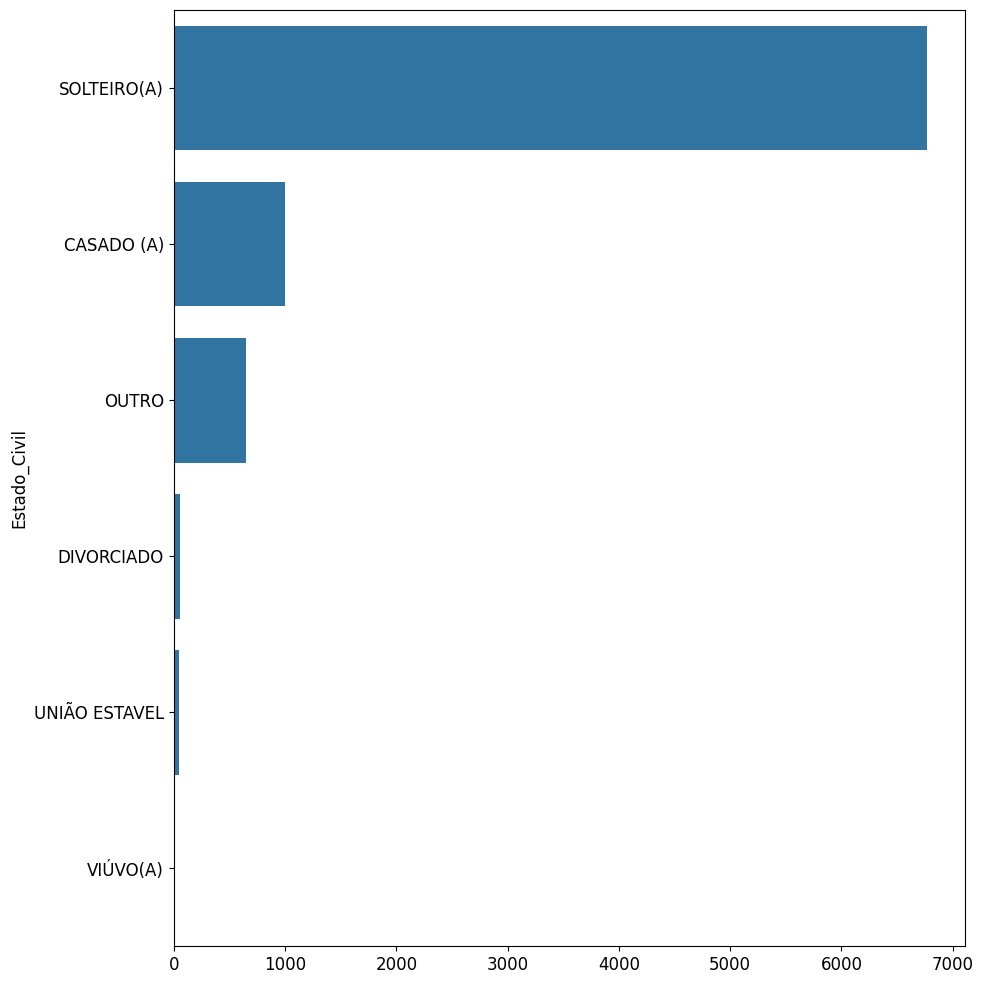

In [242]:
x = jovens['Estado_Civil'].value_counts().values
y = jovens['Estado_Civil'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

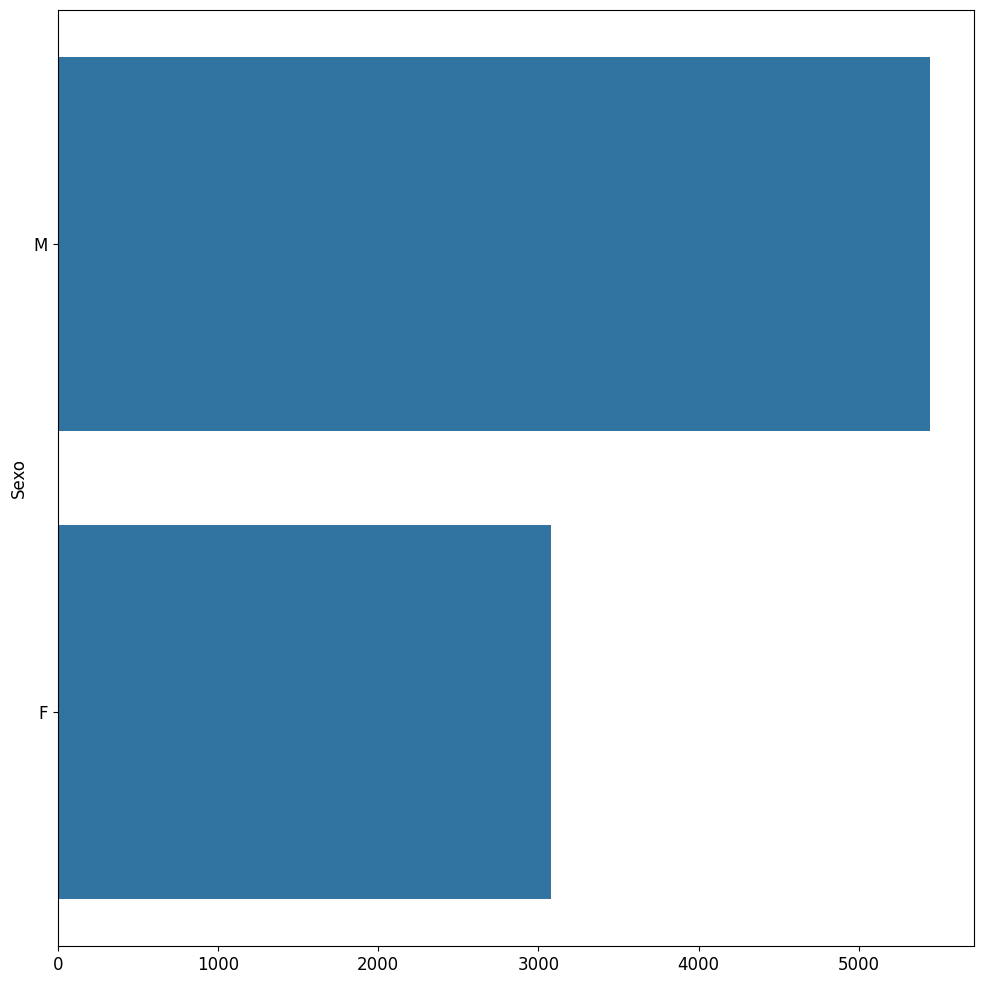

In [243]:
x = jovens['Sexo'].value_counts().values
y = jovens['Sexo'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

<Axes: xlabel='Possivel_Fraude', ylabel='count'>

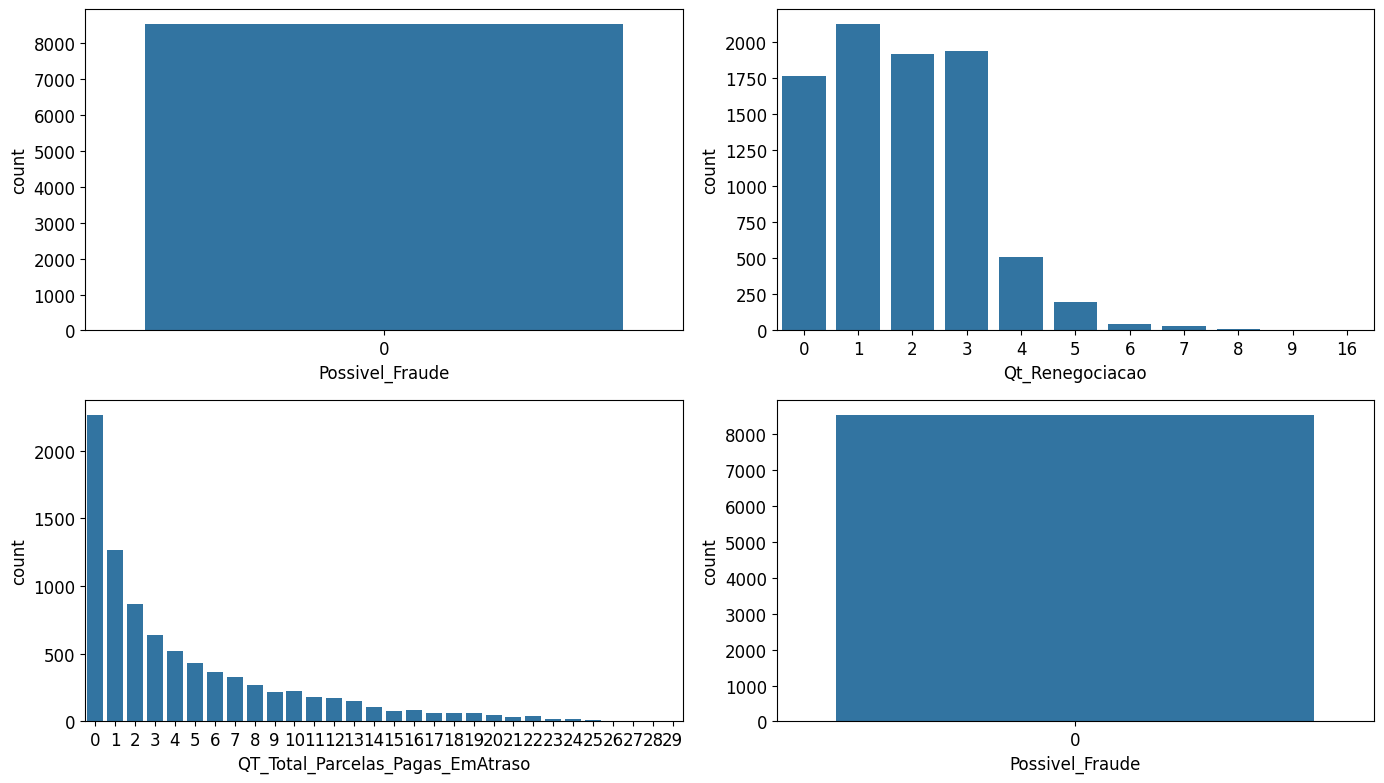

In [244]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens, x="Possivel_Fraude", ax=axes[0][0])
sns.countplot(data = jovens, x="Qt_Renegociacao", ax=axes[0][1])
sns.countplot(data = jovens, x="QT_Total_Parcelas_Pagas_EmAtraso", ax=axes[1][0])
sns.countplot(data = jovens, x="Possivel_Fraude", ax=axes[1][1])

### COMO NÃO HOUVE FRAUDES VAMOS APENAS ANALISAR O LUCRO POR DATA DOS JOVENS

Text(0.5, 0, 'Mês')

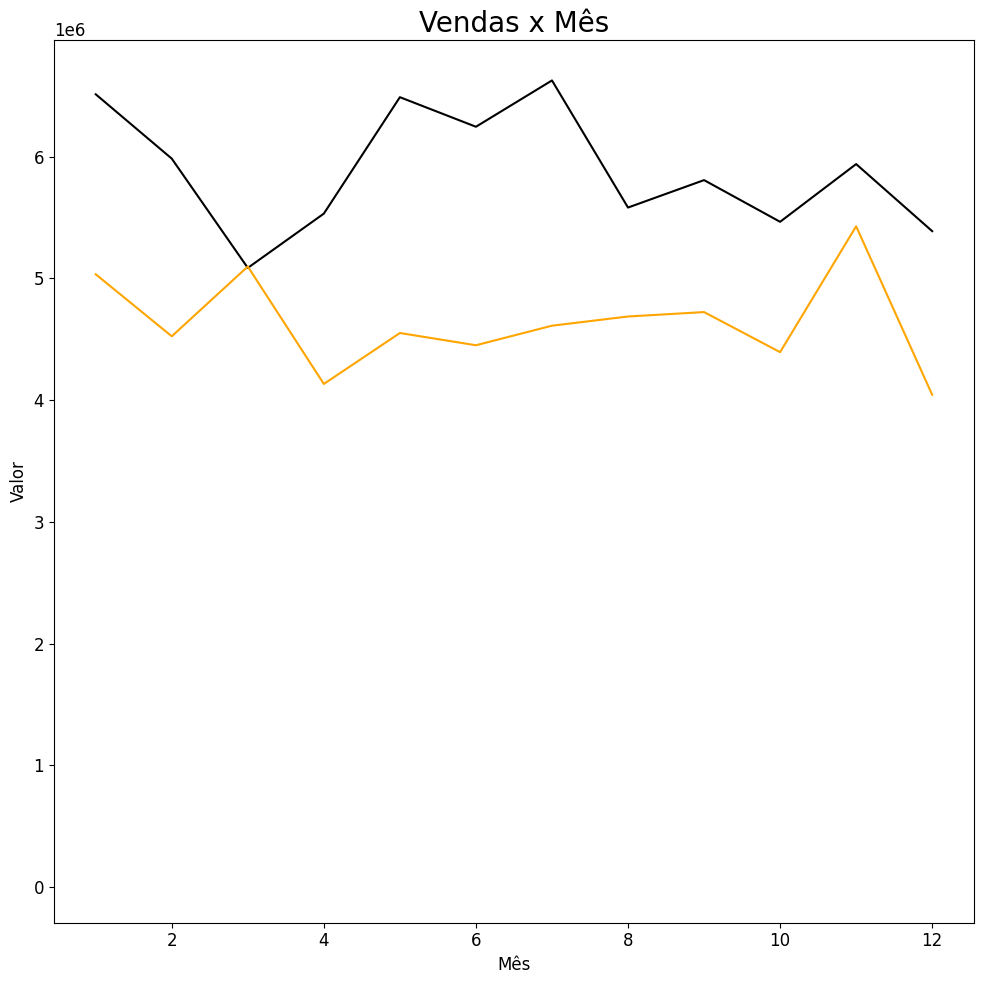

In [245]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
jovens['Data_Contratacao'] = pd.to_datetime(jovens['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
nao_fraude_jovens_df_2020 = jovens[jovens["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
nao_fraude_jovens_df_2021 = jovens[jovens["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
nao_fraude_jovens_df_2022 = jovens[jovens["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
nao_fraude_jovens_df_2023 = jovens[jovens["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
nao_fraude_jovens_df_2020.groupby(nao_fraude_jovens_df_2020["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='red', label='Ano 2020')
nao_fraude_jovens_df_2021.groupby(nao_fraude_jovens_df_2021["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='black', label='Ano 2021')
nao_fraude_jovens_df_2022.groupby(nao_fraude_jovens_df_2022["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='orange', label='Ano 2022')
nao_fraude_jovens_df_2023.groupby(nao_fraude_jovens_df_2023["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Vendas x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

In [246]:
# ANALISANDO 2020
(nao_fraude_jovens_df_2020.groupby(nao_fraude_jovens_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
11-2020,"35,305.52"


In [247]:
# ANALISANDO 2021
(nao_fraude_jovens_df_2021.groupby(nao_fraude_jovens_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2021,"6,512,860.92"
02-2021,"5,984,224.24"
03-2021,"5,086,320.03"
04-2021,"5,532,511.00"
05-2021,"6,489,060.98"
06-2021,"6,246,150.08"
07-2021,"6,626,663.67"
08-2021,"5,582,179.44"
09-2021,"5,807,685.71"


In [248]:
# ANALISANDO 2022
(nao_fraude_jovens_df_2022.groupby(nao_fraude_jovens_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2022,"5,033,758.84"
02-2022,"4,524,477.09"
03-2022,"5,097,614.07"
04-2022,"4,132,766.48"
05-2022,"4,551,331.41"
06-2022,"4,450,744.26"
07-2022,"4,611,448.48"
08-2022,"4,686,963.11"
09-2022,"4,723,368.73"


In [249]:
# ANALISANDO 2022
(nao_fraude_jovens_df_2023.groupby(nao_fraude_jovens_df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2023,"112,223.08"


### ADULTOS

In [250]:
adultos = nao_fraude.query('Idade > 29 and Idade <= 59')
adultos['Idade'].value_counts().sum()

24409

In [251]:
adultos.head(1)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
6,322010858715,42,F,3800.00,PR,24.00,36,2021-10-18,15,10000.00,11500.00,25,23,0,0,CASADO (A),N,0.00,0,468.00,3911.25,9366.42,0


### ANALISANDO POR SEXO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO, SOMA LUCROS

In [252]:
quantidade = adultos.groupby(["Sexo"])["Idade"].count().rename('Quantidade')
mediarenda = adultos.groupby(['Sexo'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =adultos.groupby(['Sexo'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = adultos.groupby(['Sexo'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = adultos.groupby(['Sexo'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = adultos.groupby(['Sexo'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = adultos.groupby(['Sexo'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = adultos.groupby(['Sexo'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
Sexo,,,,,,,,
M,14822,"$4,000.00",$19.00,"$40,000.00","$25,922.89","$326,774,037.42",8.85,0.67
F,9587,"$3,300.00",$20.00,"$35,000.00","$25,705.07","$163,217,522.12",8.83,0.74


### ANALISANDO POR ESTADO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO E SOMA LUCRO

In [253]:
quantidade = adultos.groupby(["UF_Cliente"])["Idade"].count().rename('Quantidade')
mediarenda = adultos.groupby(['UF_Cliente'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =adultos.groupby(['UF_Cliente'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = adultos.groupby(['UF_Cliente'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = adultos.groupby(['UF_Cliente'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = adultos.groupby(['UF_Cliente'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = adultos.groupby(['UF_Cliente'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = adultos.groupby(['UF_Cliente'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
UF_Cliente,,,,,,,,
SP,6923,"$4,142.90",$20.00,"$40,000.00","$29,428.31","$150,678,563.81",8.80,0.62
MG,4727,"$3,520.00",$18.00,"$30,000.00","$16,786.62","$97,805,308.02",8.75,0.63
BA,2135,"$3,000.00",$20.00,"$30,000.00","$22,068.76","$38,411,032.60",8.09,0.89
PR,1783,"$4,000.00",$20.00,"$40,000.00","$30,129.01","$34,494,676.49",9.49,0.63
GO,1361,"$4,500.00",$18.00,"$40,000.00","$23,472.13","$31,035,681.38",8.80,0.67


### PLOTANDO EM UM GRAFICO AS INFORMAÇÕES

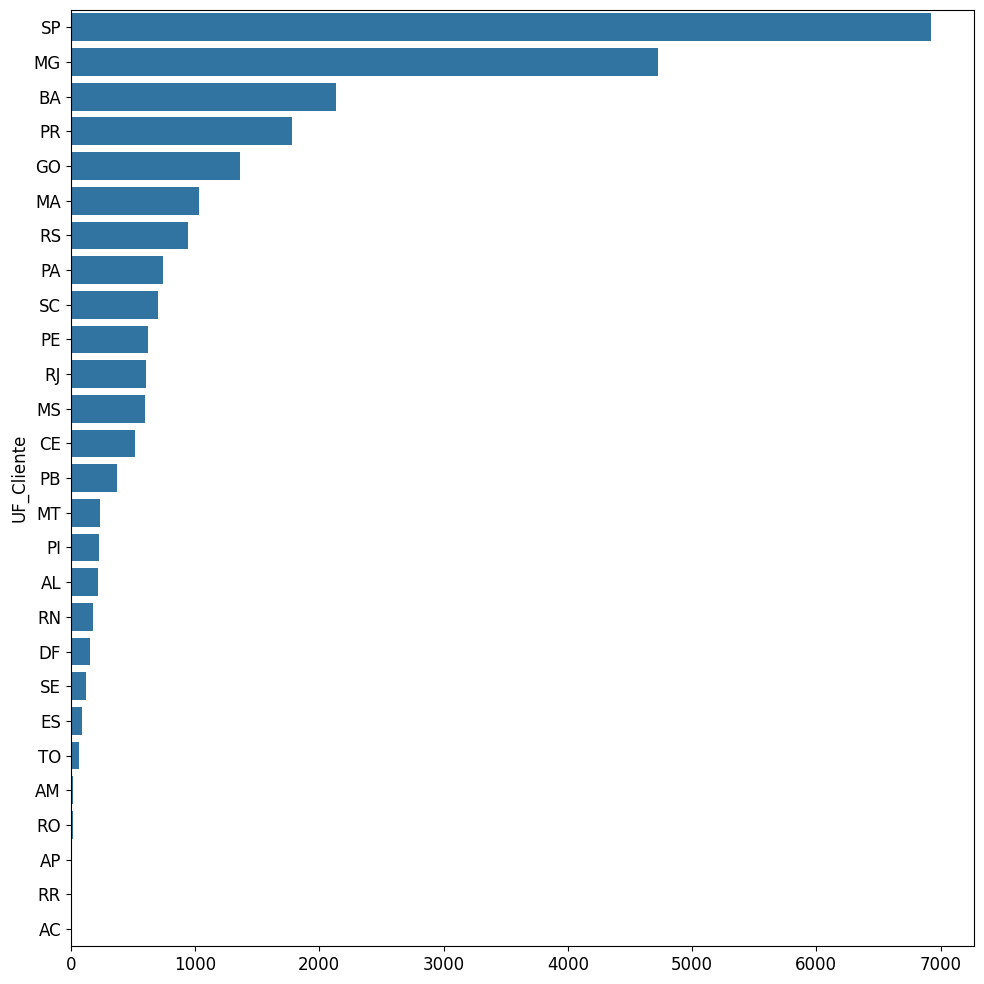

In [254]:
x = adultos['UF_Cliente'].value_counts().values
y = adultos['UF_Cliente'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

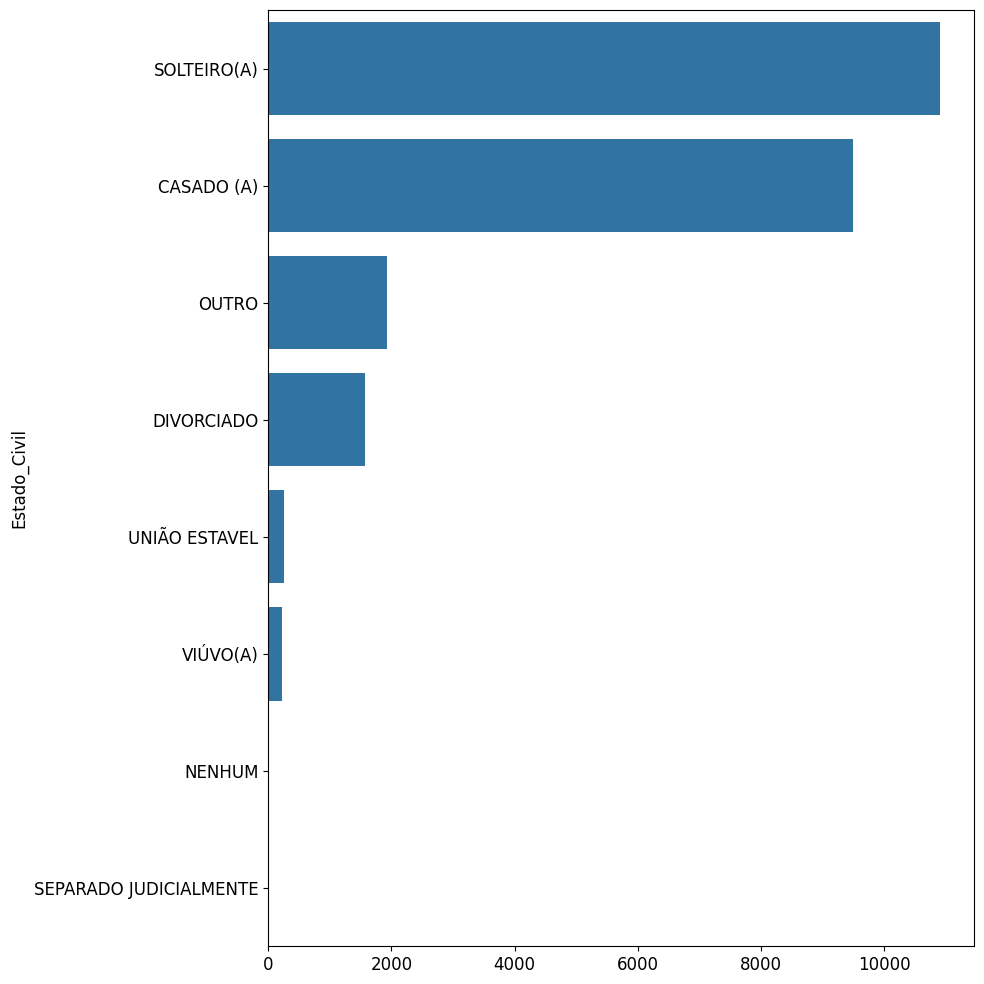

In [255]:
x = adultos['Estado_Civil'].value_counts().values
y = adultos['Estado_Civil'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

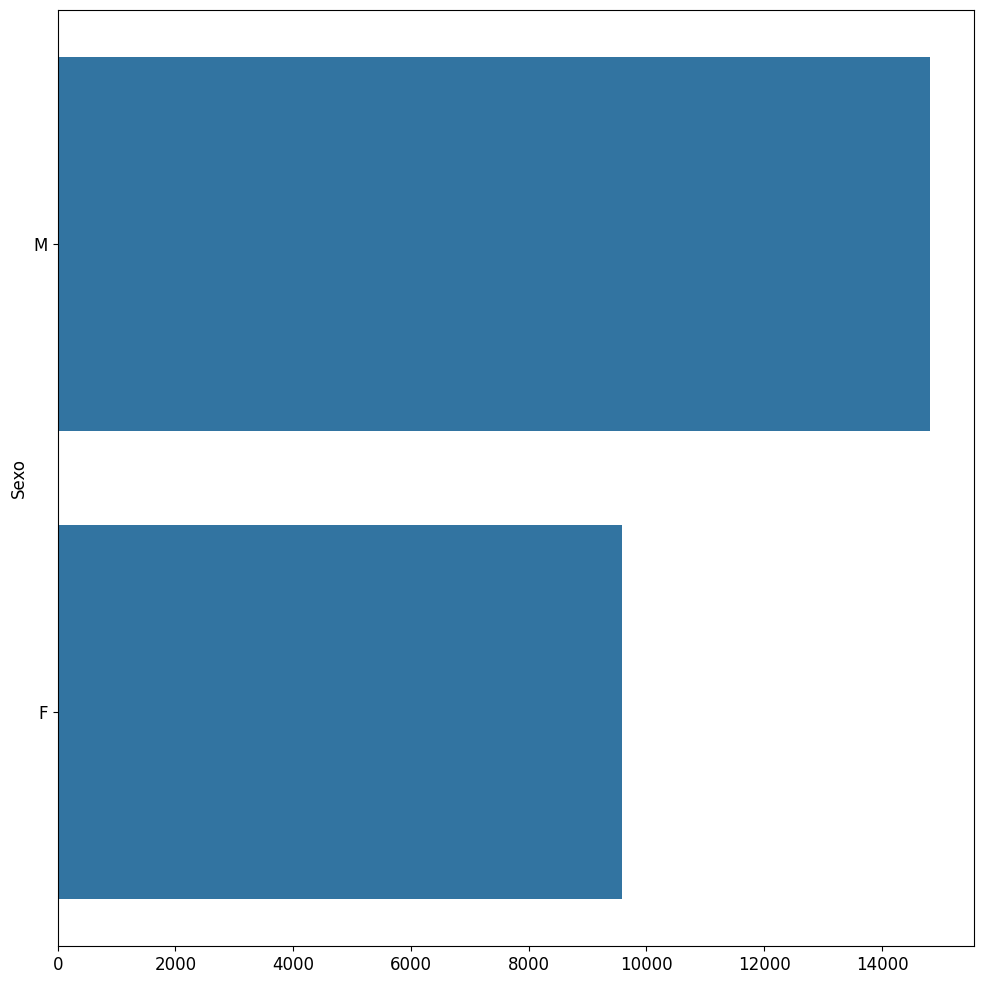

In [256]:
x = adultos['Sexo'].value_counts().values
y = adultos['Sexo'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

<Axes: xlabel='Possivel_Fraude', ylabel='count'>

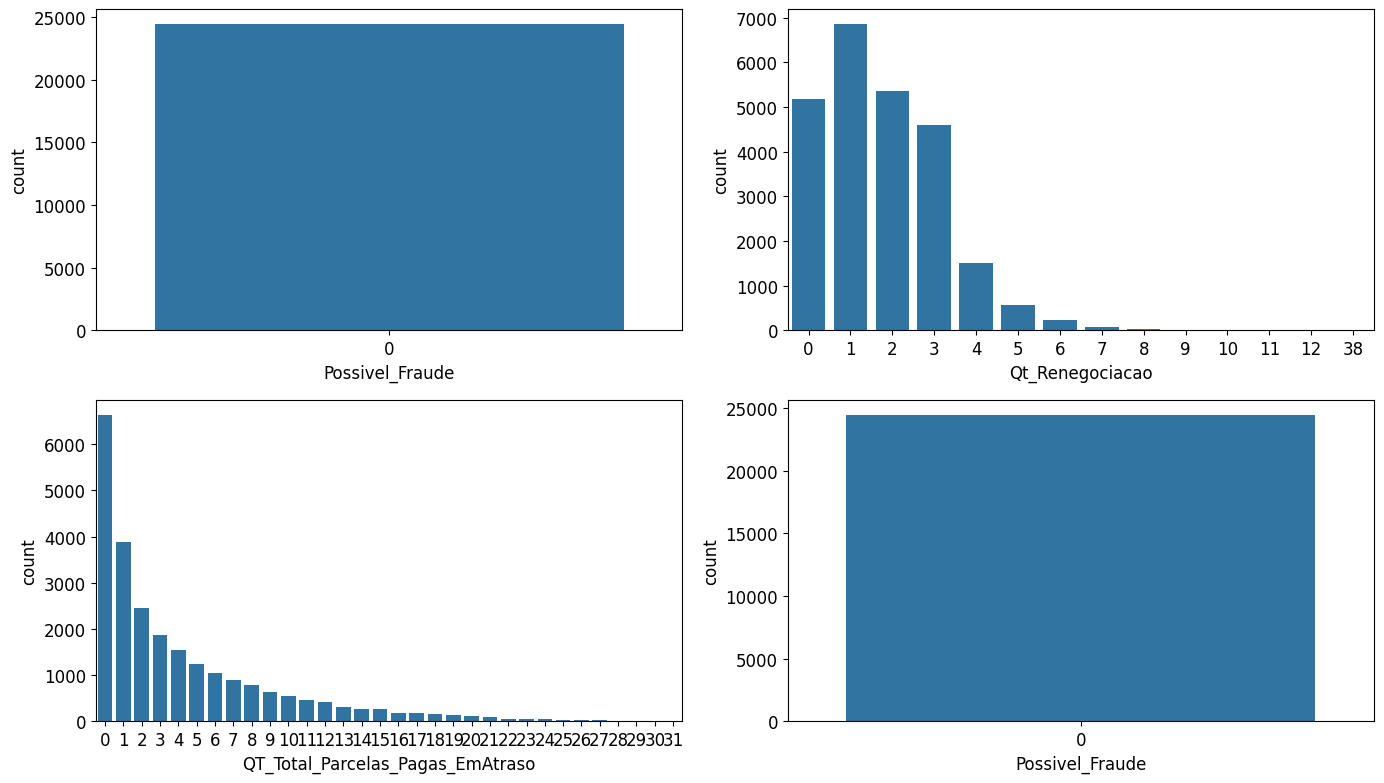

In [257]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultos, x="Possivel_Fraude", ax=axes[0][0])
sns.countplot(data = adultos, x="Qt_Renegociacao", ax=axes[0][1])
sns.countplot(data = adultos, x="QT_Total_Parcelas_Pagas_EmAtraso", ax=axes[1][0])
sns.countplot(data = adultos, x="Possivel_Fraude", ax=axes[1][1])

### COMO NÃO HOUVE FRAUDES VAMOS APENAS ANALISAR O LUCRO POR DATA DOS ADULTOS

Text(0.5, 0, 'Mês')

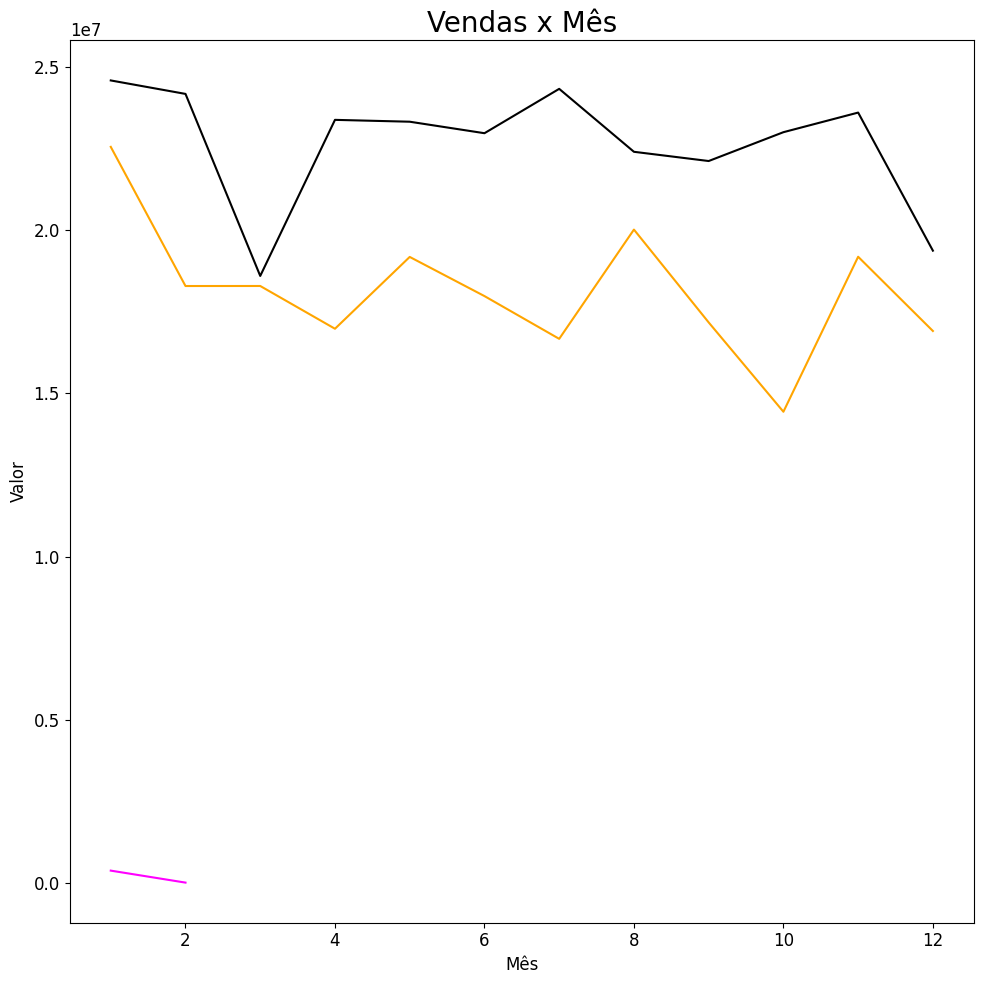

In [258]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
adultos['Data_Contratacao'] = pd.to_datetime(adultos['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
nao_fraude_adultos_df_2020 = adultos[adultos["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
nao_fraude_adultos_df_2021 = adultos[adultos["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
nao_fraude_adultos_df_2022 = adultos[adultos["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
nao_fraude_adultos_df_2023 = adultos[adultos["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
nao_fraude_adultos_df_2020.groupby(nao_fraude_adultos_df_2020["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='red', label='Ano 2020')
nao_fraude_adultos_df_2021.groupby(nao_fraude_adultos_df_2021["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='black', label='Ano 2021')
nao_fraude_adultos_df_2022.groupby(nao_fraude_adultos_df_2022["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='orange', label='Ano 2022')
nao_fraude_adultos_df_2023.groupby(nao_fraude_adultos_df_2023["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Vendas x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

In [259]:
# ANALISANDO 2020
(nao_fraude_adultos_df_2020.groupby(nao_fraude_adultos_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,


In [260]:
# ANALISANDO 2021
(nao_fraude_adultos_df_2021.groupby(nao_fraude_adultos_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2021,"24,593,417.20"
02-2021,"24,180,672.81"
03-2021,"18,600,390.84"
04-2021,"23,385,151.63"
05-2021,"23,328,255.24"
06-2021,"22,975,755.38"
07-2021,"24,335,571.53"
08-2021,"22,406,113.29"
09-2021,"22,123,131.96"


In [261]:
# ANALISANDO 2022
(nao_fraude_adultos_df_2022.groupby(nao_fraude_adultos_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2022,"22,557,381.08"
02-2022,"18,291,476.02"
03-2022,"18,292,489.59"
04-2022,"16,981,794.25"
05-2022,"19,183,407.87"
06-2022,"17,983,122.04"
07-2022,"16,672,432.72"
08-2022,"20,021,552.35"
09-2022,"17,175,575.36"


In [262]:
# ANALISANDO 2022
(nao_fraude_adultos_df_2023.groupby(nao_fraude_adultos_df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2023,"370,885.98"
02-2023,"3,239.25"


### IDOSOS

In [263]:
idosos = nao_fraude.query('Idade > 59 and Idade <= 103')
idosos['Idade'].value_counts().sum()

2698

In [264]:
idosos.head(1)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
54,322034335715,64,M,2500.00,SP,9.00,60,2022-01-28,44,8000.00,9200.00,21,17,1,0,OUTRO,N,0.00,0,468.00,5667.95,3085.70,0


### ANALISANDO POR SEXO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO, SOMA LUCROS

In [265]:
quantidade = idosos.groupby(["Sexo"])["Idade"].count().rename('Quantidade')
mediarenda = idosos.groupby(['Sexo'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =idosos.groupby(['Sexo'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = idosos.groupby(['Sexo'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = idosos.groupby(['Sexo'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = idosos.groupby(['Sexo'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = idosos.groupby(['Sexo'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = idosos.groupby(['Sexo'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
Sexo,,,,,,,,
M,1435,"$4,600.00",$20.00,"$35,000.00","$23,019.72","$31,422,903.88",9.13,0.55
F,1263,"$3,000.00",$20.00,"$30,000.00","$22,637.35","$20,110,946.38",9.85,0.63


### ANALISANDO POR ESTADO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO E SOMA LUCRO

In [266]:
quantidade = idosos.groupby(["UF_Cliente"])["Idade"].count().rename('Quantidade')
mediarenda = idosos.groupby(['UF_Cliente'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =idosos.groupby(['UF_Cliente'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = idosos.groupby(['UF_Cliente'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = idosos.groupby(['UF_Cliente'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = idosos.groupby(['UF_Cliente'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = idosos.groupby(['UF_Cliente'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = idosos.groupby(['UF_Cliente'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
UF_Cliente,,,,,,,,
SP,925,"$4,000.00",$20.00,"$35,000.00","$24,502.38","$20,433,425.07",9.67,0.46
MG,431,"$3,400.00",$20.00,"$30,000.00","$15,543.43","$7,839,843.50",9.28,0.61
PR,196,"$3,500.00",$20.00,"$32,500.00","$27,960.00","$3,046,239.05",9.80,0.53
BA,180,"$3,000.00",$20.00,"$35,000.00","$24,298.83","$3,568,245.21",7.84,0.67
RS,138,"$3,100.00",$21.00,"$30,000.00","$19,089.42","$1,815,733.18",11.36,0.62


### PLOTANDO EM UM GRAFICO AS INFORMAÇÕES

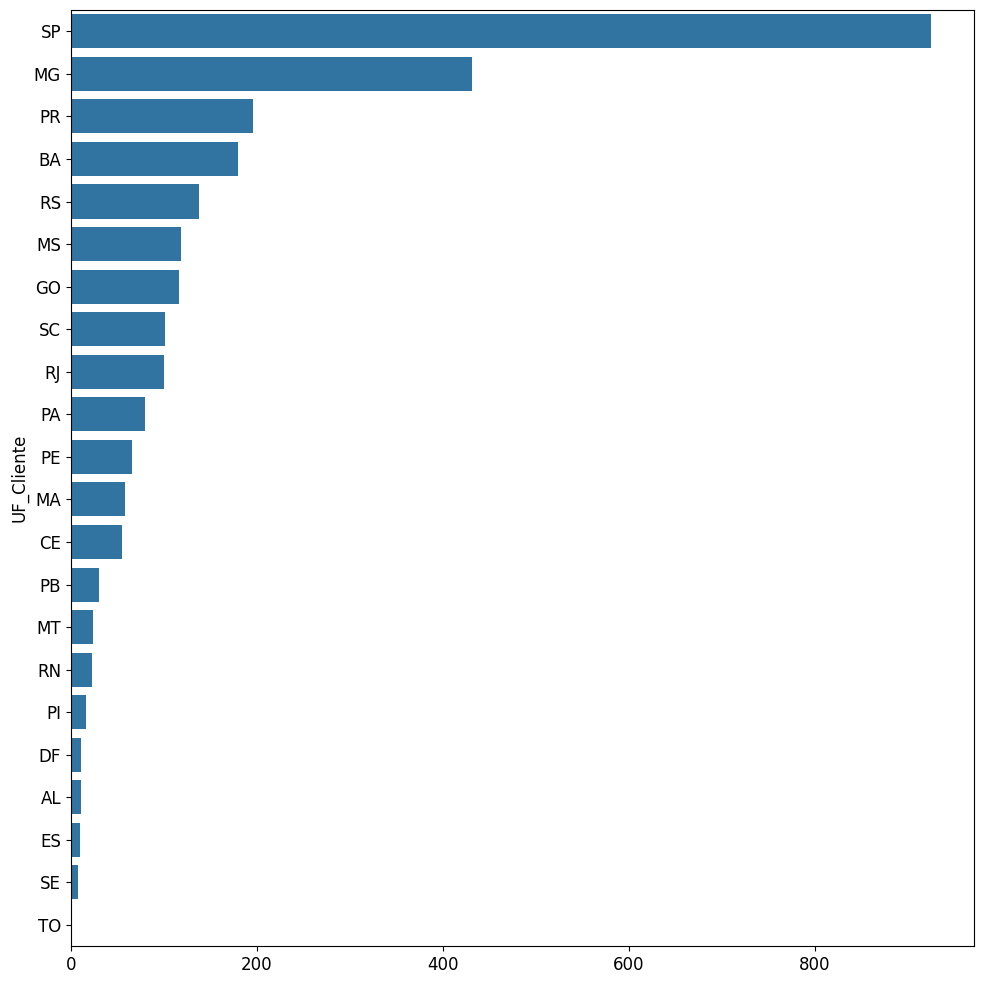

In [267]:
x = idosos['UF_Cliente'].value_counts().values
y = idosos['UF_Cliente'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

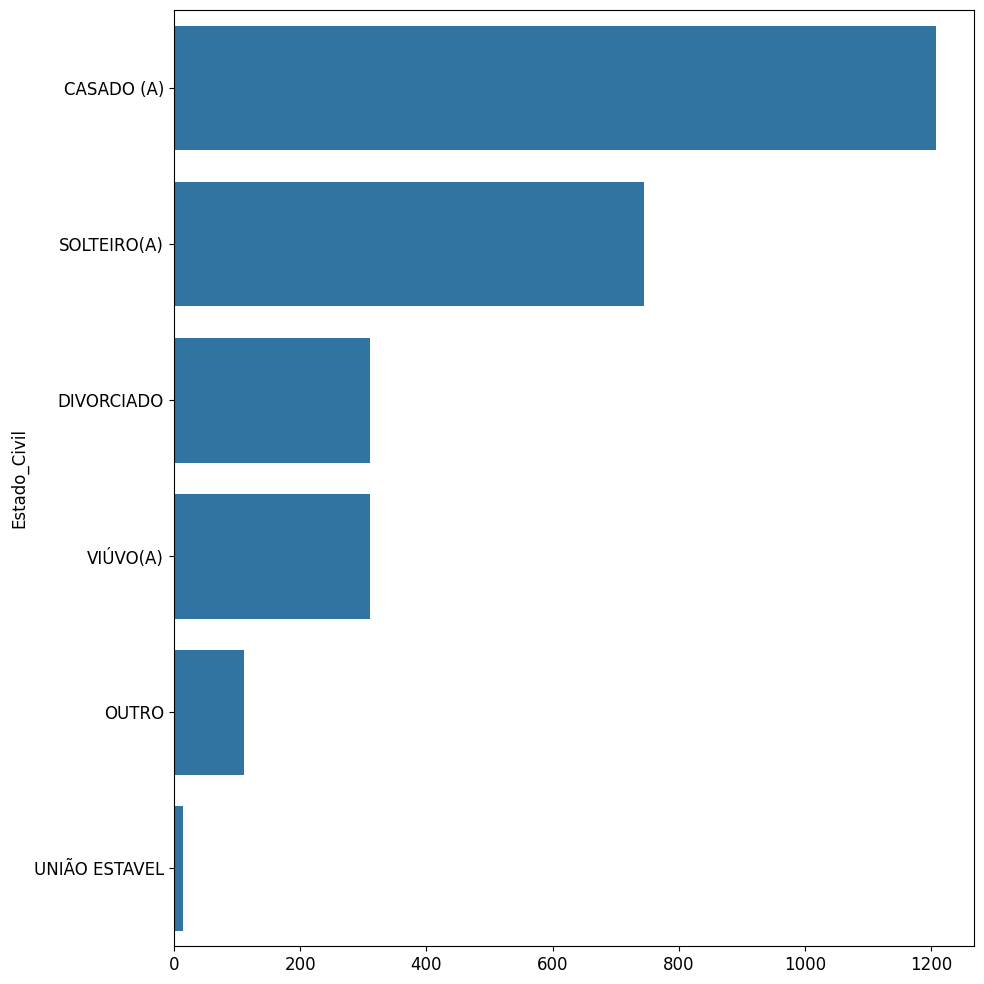

In [268]:
x = idosos['Estado_Civil'].value_counts().values
y = idosos['Estado_Civil'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

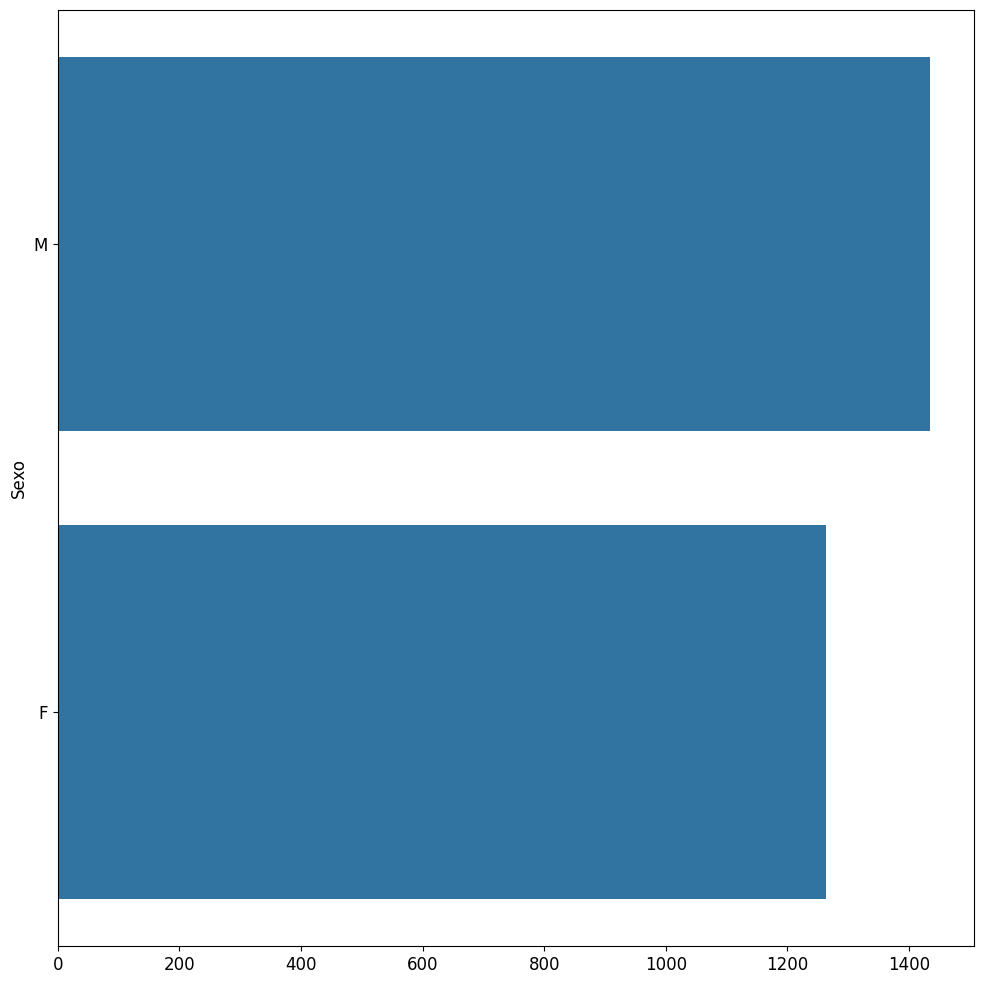

In [269]:
x = idosos['Sexo'].value_counts().values
y = idosos['Sexo'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

<Axes: xlabel='Possivel_Fraude', ylabel='count'>

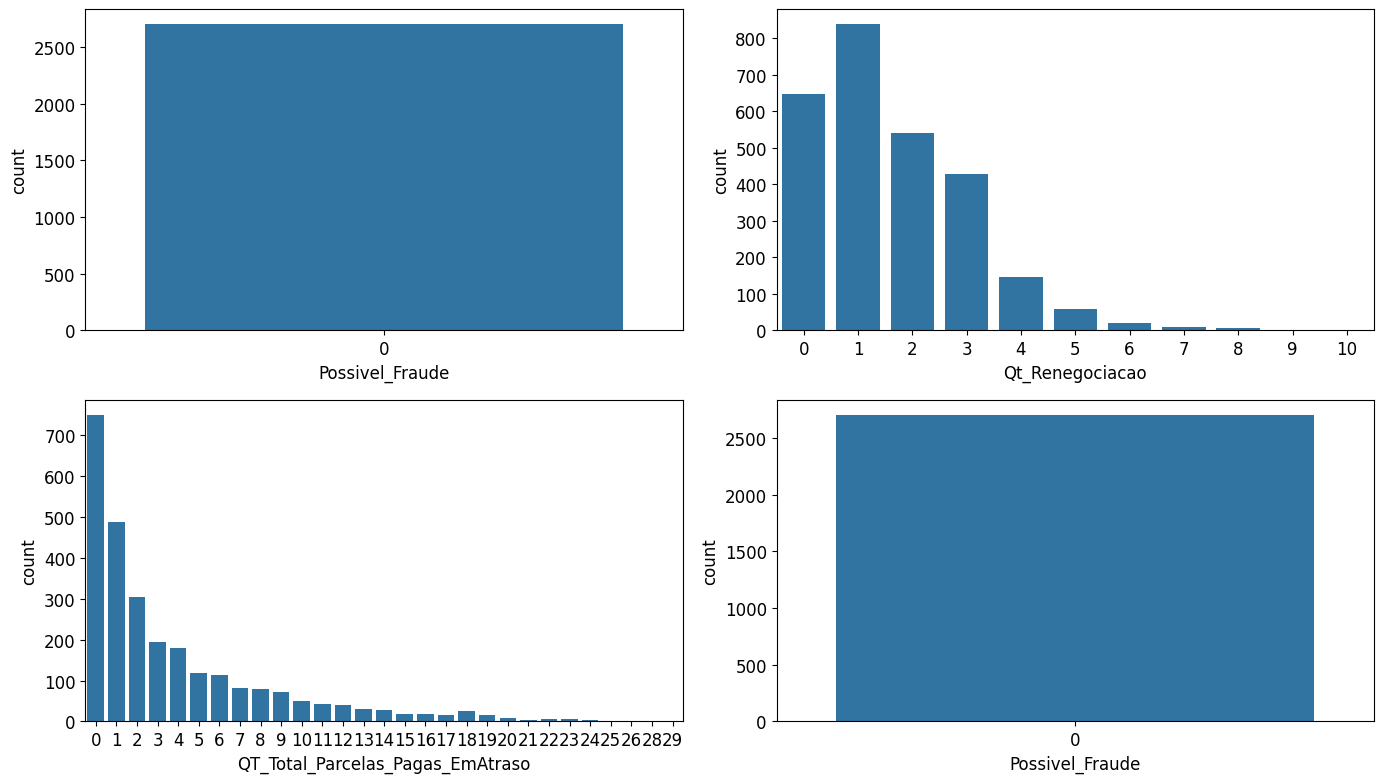

In [270]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = idosos, x="Possivel_Fraude", ax=axes[0][0])
sns.countplot(data = idosos, x="Qt_Renegociacao", ax=axes[0][1])
sns.countplot(data = idosos, x="QT_Total_Parcelas_Pagas_EmAtraso", ax=axes[1][0])
sns.countplot(data = idosos, x="Possivel_Fraude", ax=axes[1][1])

### COMO NÃO HOUVE FRAUDES VAMOS APENAS ANALISAR O LUCRO POR DATA DOS IDOSOS

Text(0.5, 0, 'Mês')

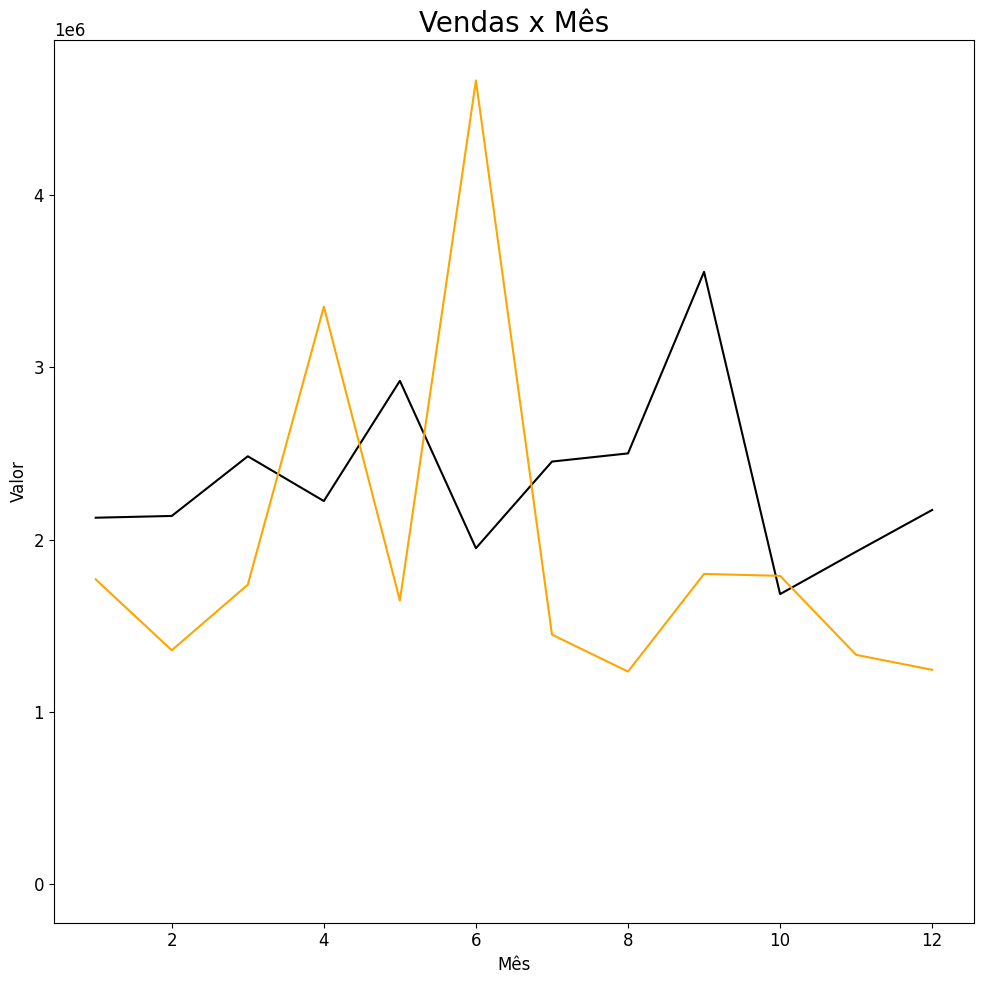

In [271]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
idosos['Data_Contratacao'] = pd.to_datetime(idosos['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
nao_fraude_idosos_df_2020 = idosos[idosos["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
nao_fraude_idosos_df_2021 = idosos[idosos["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
nao_fraude_idosos_df_2022 = idosos[idosos["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
nao_fraude_idosos_df_2023 = idosos[idosos["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
nao_fraude_idosos_df_2020.groupby(nao_fraude_idosos_df_2020["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='red', label='Ano 2020')
nao_fraude_idosos_df_2021.groupby(nao_fraude_idosos_df_2021["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='black', label='Ano 2021')
nao_fraude_idosos_df_2022.groupby(nao_fraude_idosos_df_2022["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='orange', label='Ano 2022')
nao_fraude_idosos_df_2023.groupby(nao_fraude_idosos_df_2023["Data_Contratacao"].dt.month)["Total_Pago"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Vendas x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

In [272]:
# ANALISANDO 2020
(nao_fraude_idosos_df_2020.groupby(nao_fraude_idosos_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,


In [273]:
# ANALISANDO 2021
(nao_fraude_idosos_df_2021.groupby(nao_fraude_idosos_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2021,"2,127,502.24"
02-2021,"2,137,748.32"
03-2021,"2,484,155.62"
04-2021,"2,224,330.04"
05-2021,"2,922,203.06"
06-2021,"1,950,618.30"
07-2021,"2,453,385.28"
08-2021,"2,500,880.22"
09-2021,"3,554,784.22"


In [274]:
# ANALISANDO 2022
(nao_fraude_idosos_df_2022.groupby(nao_fraude_idosos_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2022,"1,769,382.76"
02-2022,"1,358,072.82"
03-2022,"1,738,829.52"
04-2022,"3,352,548.57"
05-2022,"1,647,059.46"
06-2022,"4,665,812.88"
07-2022,"1,448,798.60"
08-2022,"1,234,321.89"
09-2022,"1,801,156.33"


In [275]:
# ANALISANDO 2023
(nao_fraude_idosos_df_2023.groupby(nao_fraude_idosos_df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Total_Pago": "sum"}).style.format("{:,.2f}"))

,Total_Pago
Data_Contratacao,
01-2023,"9,308.38"


# UMA ANÁLISE DAS PESSOAS QUE FRAUDARAM

In [276]:
fraude = df.loc[df['Possivel_Fraude'] == 1]
fraude.head(1)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322090928715,42,M,4000.00,MA,17.00,140,2022-11-18,143,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),N,0.00,10,284.00,187861.70,1617.36,1


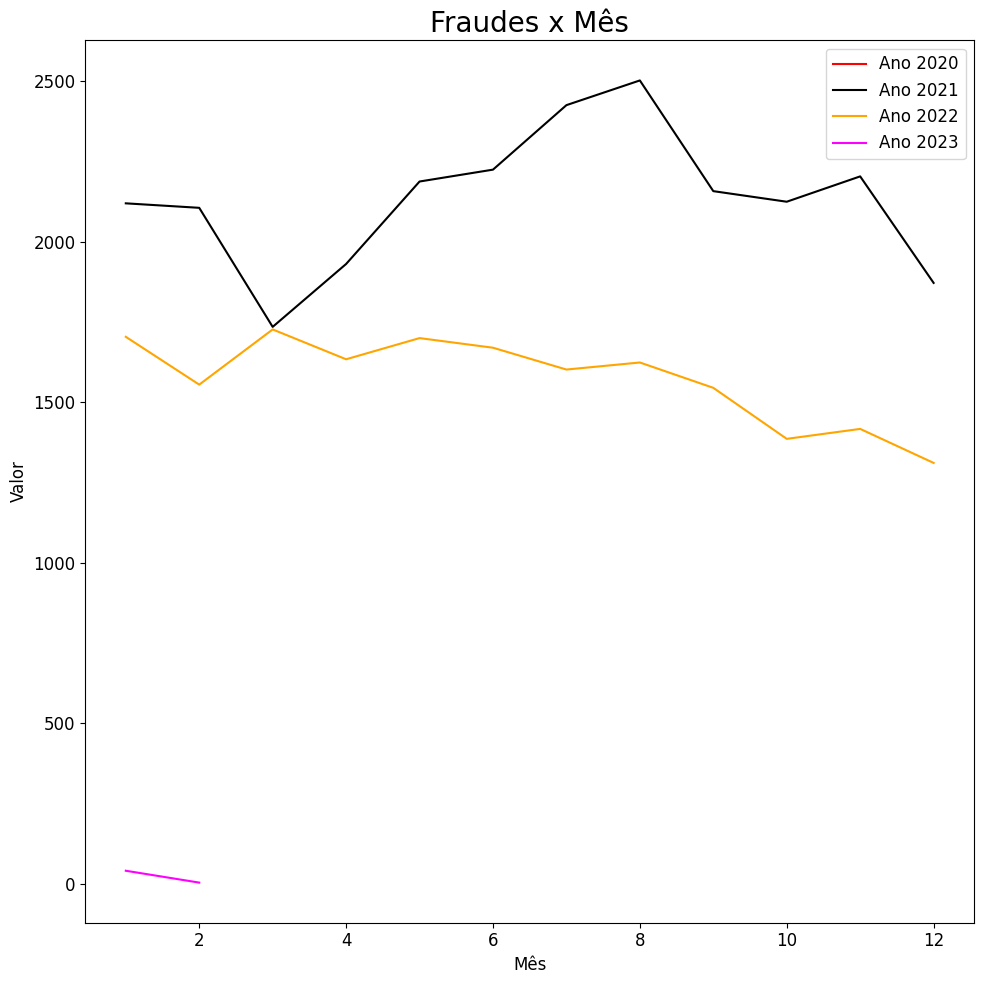

In [277]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
fraude['Data_Contratacao'] = pd.to_datetime(fraude['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
fraude_df_2020 = fraude[fraude["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
fraude_df_2021 = fraude[fraude["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
fraude_df_2022 = fraude[fraude["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
fraude_df_2023 = fraude[fraude["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
fraude_df_2020.groupby(fraude_df_2020["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='red', label='Ano 2020')
fraude_df_2021.groupby(fraude_df_2021["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='black', label='Ano 2021')
fraude_df_2022.groupby(fraude_df_2022["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='orange', label='Ano 2022')
fraude_df_2023.groupby(fraude_df_2023["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Fraudes x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

plt.legend()

In [278]:
# ANALISANDO 2020
(fraude_df_2020.groupby(fraude_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,


In [279]:
# ANALISANDO 2020
(fraude_df_2021.groupby(fraude_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2021,2120
02-2021,2106
03-2021,1735
04-2021,1931
05-2021,2188
06-2021,2225
07-2021,2426
08-2021,2503
09-2021,2158


In [280]:
# ANALISANDO 2020
(fraude_df_2022.groupby(fraude_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2022,1704
02-2022,1555
03-2022,1727
04-2022,1634
05-2022,1700
06-2022,1670
07-2022,1602
08-2022,1624
09-2022,1545


In [281]:
# ANALISANDO 2020
(fraude_df_2023.groupby(fraude_df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2023,40
02-2023,3


## SEGMENTAÇÃO POR FAIXA ETARIA DE IDADE DAS FRAUDES

### JOVENS

In [282]:
jovens_fraude = fraude[fraude['Idade']<=29] 
jovens_fraude['Idade'].value_counts().sum()

12920

### ANALISANDO POR SEXO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO, SOMA LUCROS

In [283]:
quantidade = jovens_fraude.groupby(["Sexo"])["Idade"].count().rename('Quantidade')
mediarenda = jovens_fraude.groupby(['Sexo'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =jovens_fraude.groupby(['Sexo'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = jovens_fraude.groupby(['Sexo'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = jovens_fraude.groupby(['Sexo'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = jovens_fraude.groupby(['Sexo'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = jovens_fraude.groupby(['Sexo'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = jovens_fraude.groupby(['Sexo'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
Sexo,,,,,,,,
M,8352,"$2,500.00",$20.00,"$30,000.00","$35,660.38","$15,888,448.03",2.20,18.87
F,4568,"$2,500.00",$20.00,"$35,000.00","$41,257.84","$9,587,341.63",2.27,18.23


### ANALISANDO POR ESTADO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO E SOMA LUCRO

In [284]:
quantidade = jovens_fraude.groupby(["UF_Cliente"])["Idade"].count().rename('Quantidade')
mediarenda = jovens_fraude.groupby(['UF_Cliente'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =jovens_fraude.groupby(['UF_Cliente'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = jovens_fraude.groupby(['UF_Cliente'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = jovens_fraude.groupby(['UF_Cliente'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = jovens_fraude.groupby(['UF_Cliente'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = jovens_fraude.groupby(['UF_Cliente'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = jovens_fraude.groupby(['UF_Cliente'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
UF_Cliente,,,,,,,,
SP,3112,"$2,500.00",$20.00,"$35,000.00","$40,909.11","$6,918,320.33",2.33,18.70
MG,2291,"$2,200.00",$20.00,"$30,000.00","$32,238.58","$4,332,835.99",2.13,18.47
PR,1018,"$2,500.00",$20.00,"$40,000.00","$42,518.06","$2,392,573.44",2.41,18.81
BA,997,"$2,000.00",$20.00,"$30,000.00","$34,947.99","$1,670,977.80",2.11,18.45
PA,664,"$2,500.00",$21.00,"$40,000.00","$45,980.87","$1,152,251.34",2.08,18.48


### PLOTANDO EM UM GRAFICO AS INFORMAÇÕES

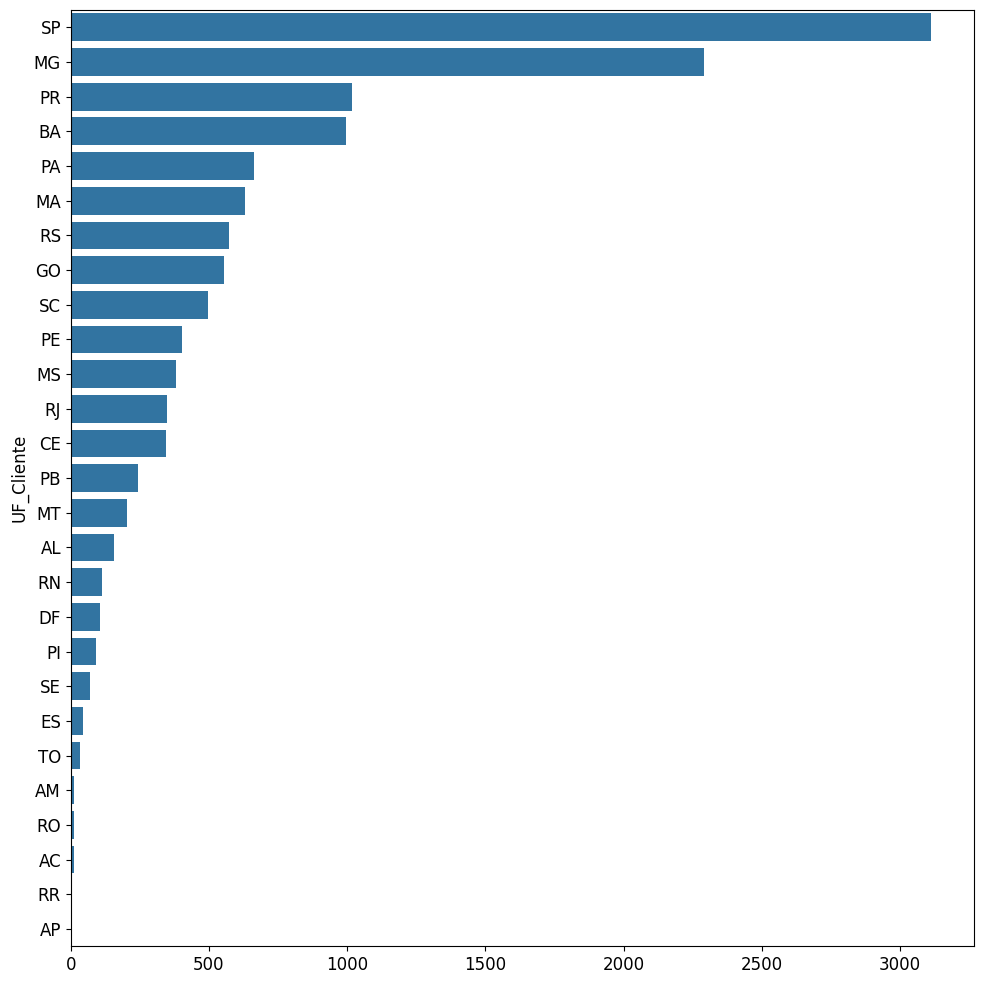

In [285]:
x = jovens_fraude['UF_Cliente'].value_counts().values
y = jovens_fraude['UF_Cliente'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

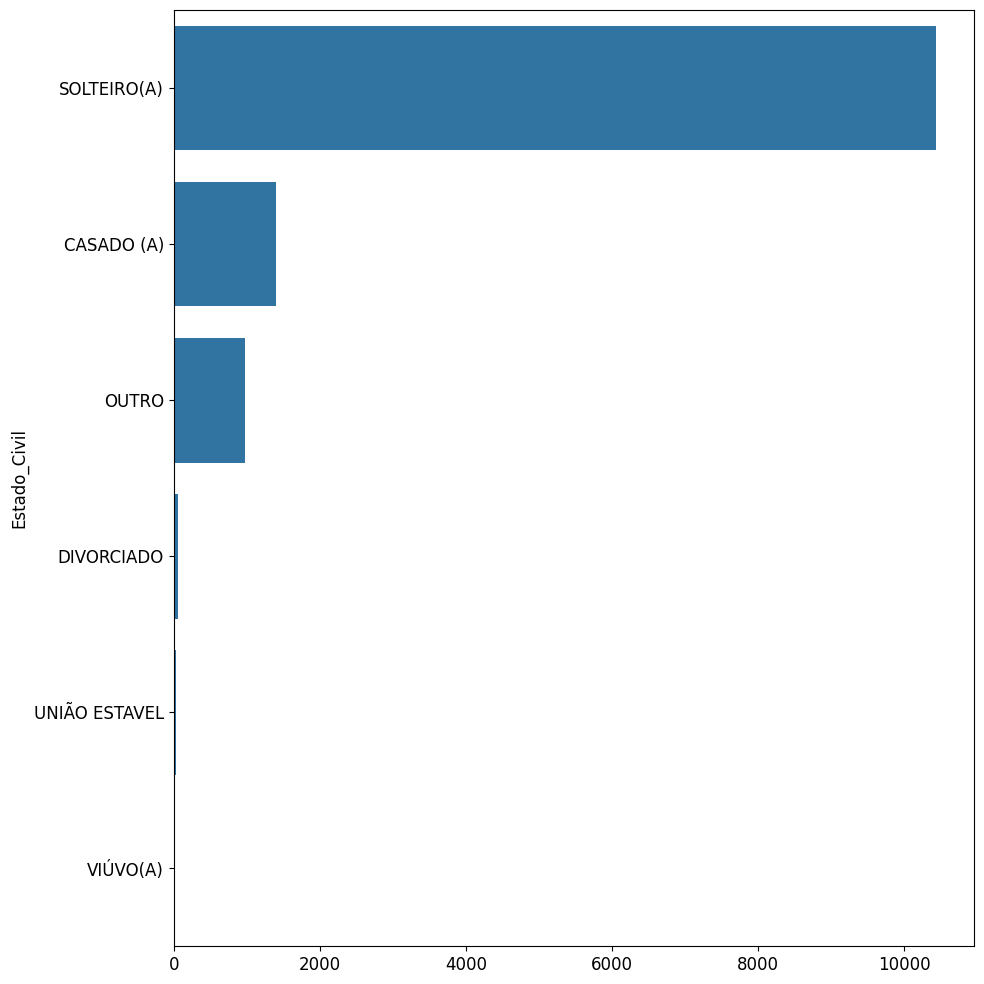

In [286]:
x = jovens_fraude['Estado_Civil'].value_counts().values
y = jovens_fraude['Estado_Civil'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

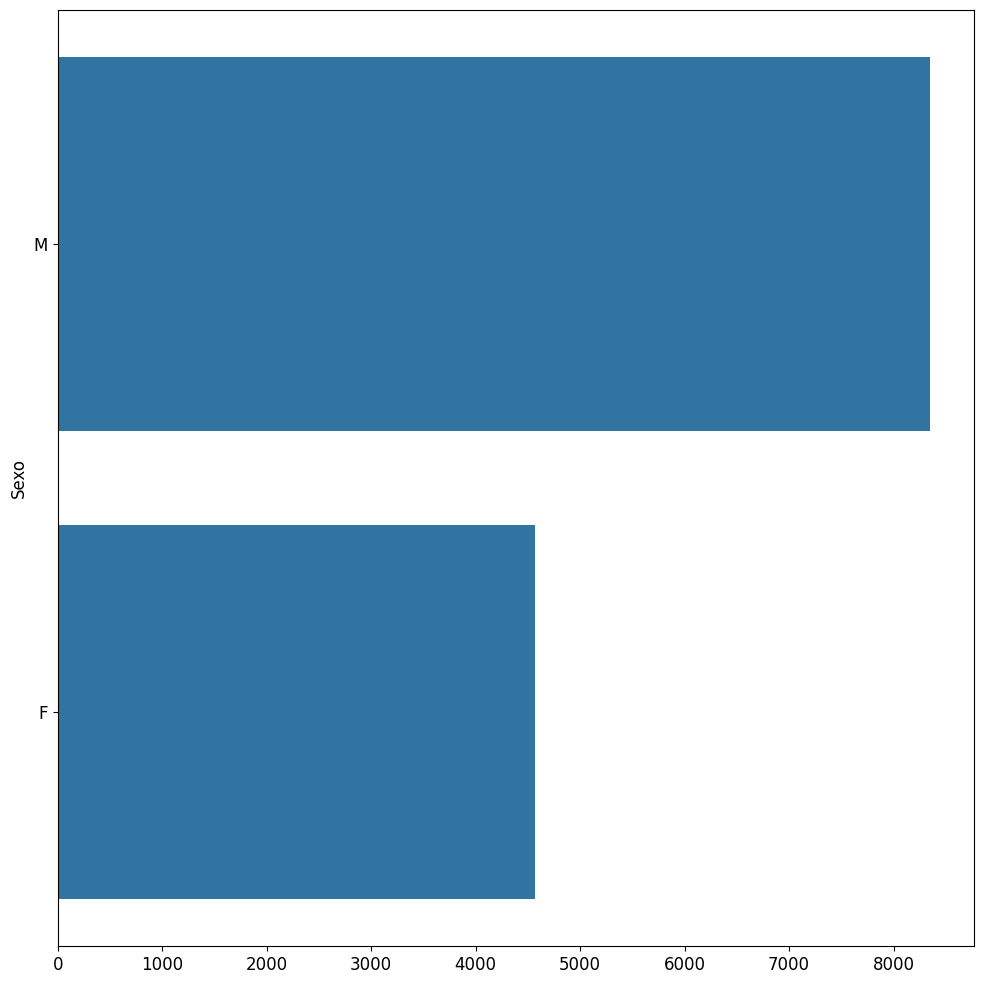

In [287]:
x = jovens_fraude['Sexo'].value_counts().values
y = jovens_fraude['Sexo'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

<Axes: xlabel='Possivel_Fraude', ylabel='count'>

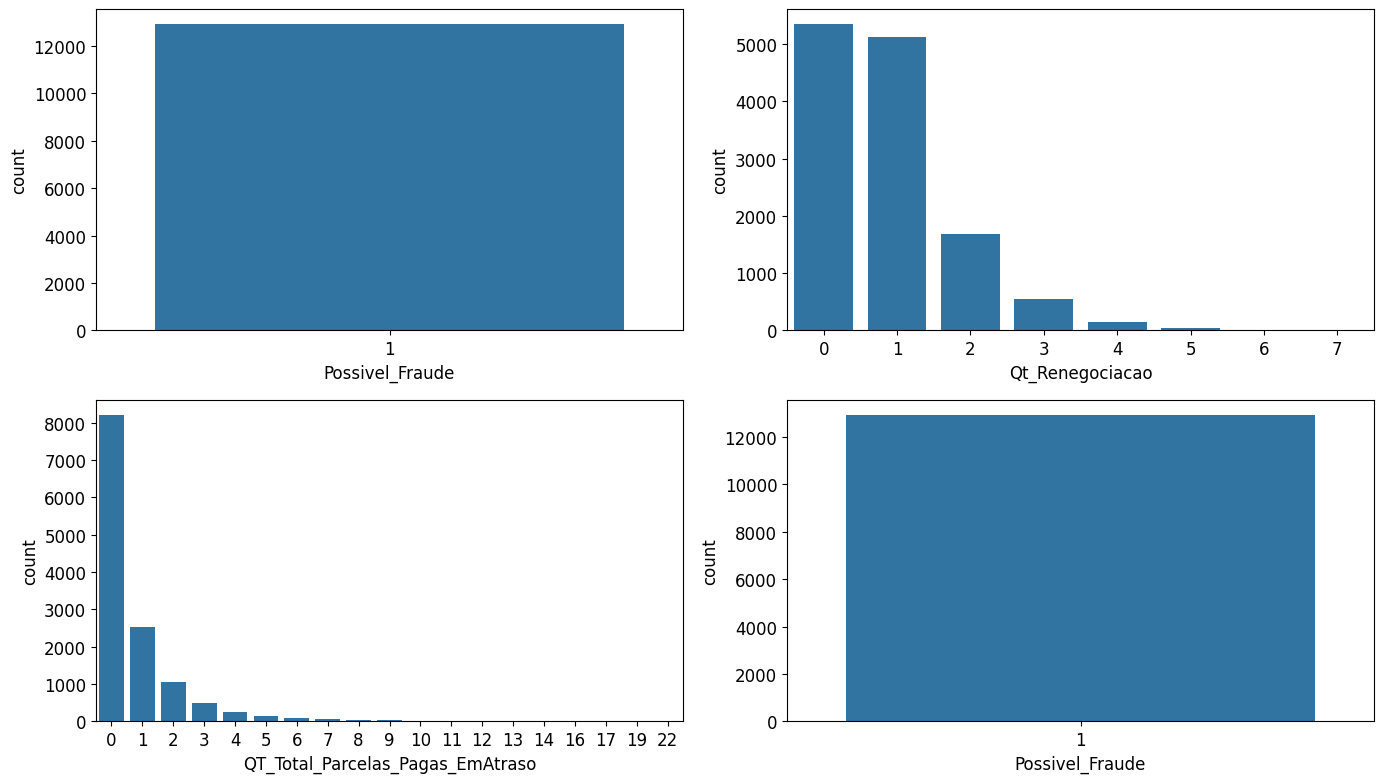

In [288]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens_fraude, x="Possivel_Fraude", ax=axes[0][0])
sns.countplot(data = jovens_fraude, x="Qt_Renegociacao", ax=axes[0][1])
sns.countplot(data = jovens_fraude, x="QT_Total_Parcelas_Pagas_EmAtraso", ax=axes[1][0])
sns.countplot(data = jovens_fraude, x="Possivel_Fraude", ax=axes[1][1])

### VERIFICANDO AS DATAS DAS FRAUDES QUE OCORRERAM DOS JOVENS

Text(0.5, 0, 'Mês')

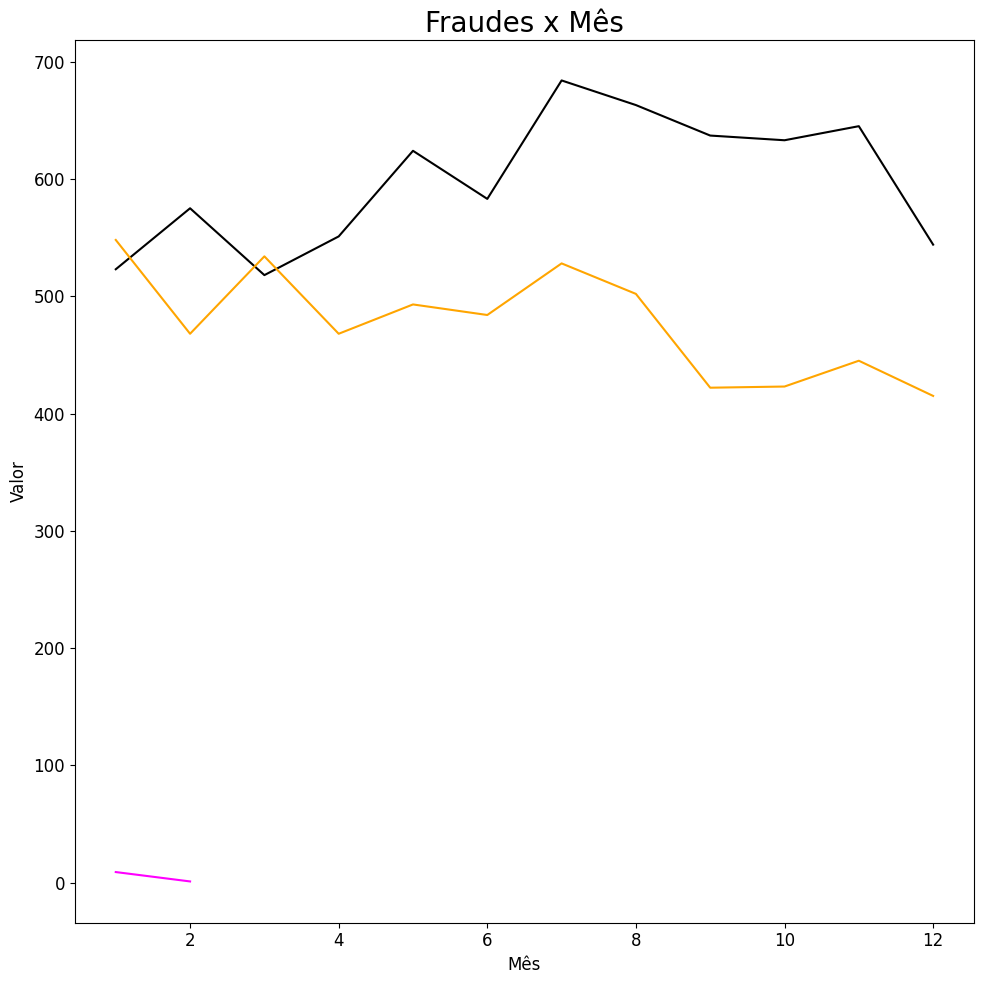

In [289]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
jovens_fraude['Data_Contratacao'] = pd.to_datetime(jovens_fraude['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
fraude_jovens_df_2020 = jovens[jovens["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
fraude_jovens_df_2021 = jovens_fraude[jovens_fraude["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
fraude_jovens_df_2022 = jovens_fraude[jovens_fraude["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
fraude_jovens_df_2023 = jovens_fraude[jovens_fraude["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
fraude_jovens_df_2020.groupby(fraude_jovens_df_2020["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='red', label='Ano 2020')
fraude_jovens_df_2021.groupby(fraude_jovens_df_2021["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='black', label='Ano 2021')
fraude_jovens_df_2022.groupby(fraude_jovens_df_2022["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='orange', label='Ano 2022')
fraude_jovens_df_2023.groupby(fraude_jovens_df_2023["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Fraudes x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

In [290]:
# ANALISANDO 2020
(fraude_jovens_df_2020.groupby(fraude_jovens_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
11-2020,0


In [291]:
# ANALISANDO 2021
(fraude_jovens_df_2021.groupby(fraude_jovens_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2021,523
02-2021,575
03-2021,518
04-2021,551
05-2021,624
06-2021,583
07-2021,684
08-2021,663
09-2021,637


In [292]:
# ANALISANDO 2022
(fraude_jovens_df_2022.groupby(fraude_jovens_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2022,548
02-2022,468
03-2022,534
04-2022,468
05-2022,493
06-2022,484
07-2022,528
08-2022,502
09-2022,422


In [293]:
# ANALISANDO 2023
(fraude_jovens_df_2023.groupby(fraude_jovens_df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2023,9
02-2023,1


### ADULTOS

In [294]:
adultos_fraude = fraude.query('Idade > 29 and Idade <= 59')
adultos_fraude['Idade'].value_counts().sum()

28375

### ANALISANDO POR SEXO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO, SOMA LUCROS

In [295]:
quantidade = adultos_fraude.groupby(["Sexo"])["Idade"].count().rename('Quantidade')
mediarenda = adultos_fraude.groupby(['Sexo'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =adultos_fraude.groupby(['Sexo'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = adultos_fraude.groupby(['Sexo'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = adultos_fraude.groupby(['Sexo'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = adultos_fraude.groupby(['Sexo'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = jovens_fraude.groupby(['Sexo'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = jovens_fraude.groupby(['Sexo'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
Sexo,,,,,,,,
M,16796,"$3,500.00",$20.00,"$50,000.00","$58,999.03","$46,204,379.22",2.20,18.87
F,11579,"$3,000.00",$20.00,"$60,000.00","$61,217.01","$29,559,423.88",2.27,18.23


### ANALISANDO POR ESTADO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO E SOMA LUCRO

In [296]:
quantidade = adultos_fraude.groupby(["UF_Cliente"])["Idade"].count().rename('Quantidade')
mediarenda = adultos_fraude.groupby(['UF_Cliente'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =adultos_fraude.groupby(['UF_Cliente'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = adultos_fraude.groupby(['UF_Cliente'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = adultos_fraude.groupby(['UF_Cliente'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = adultos_fraude.groupby(['UF_Cliente'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = adultos_fraude.groupby(['UF_Cliente'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = adultos_fraude.groupby(['UF_Cliente'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
UF_Cliente,,,,,,,,
SP,7314,"$3,600.00",$20.00,"$60,000.00","$70,359.58","$22,557,143.25",2.35,18.49
MG,3883,"$3,000.00",$20.00,"$40,000.00","$45,407.91","$10,107,631.88",2.21,18.75
BA,2369,"$3,000.00",$20.00,"$40,000.00","$47,422.00","$5,303,783.90",2.07,18.39
PR,1986,"$4,000.00",$20.00,"$100,000.00","$118,115.13","$6,508,838.86",2.39,18.45
PA,1557,"$3,000.00",$20.00,"$60,000.00","$70,147.36","$3,148,637.18",2.06,18.75


### PLOTANDO EM UM GRAFICO AS INFORMAÇÕES

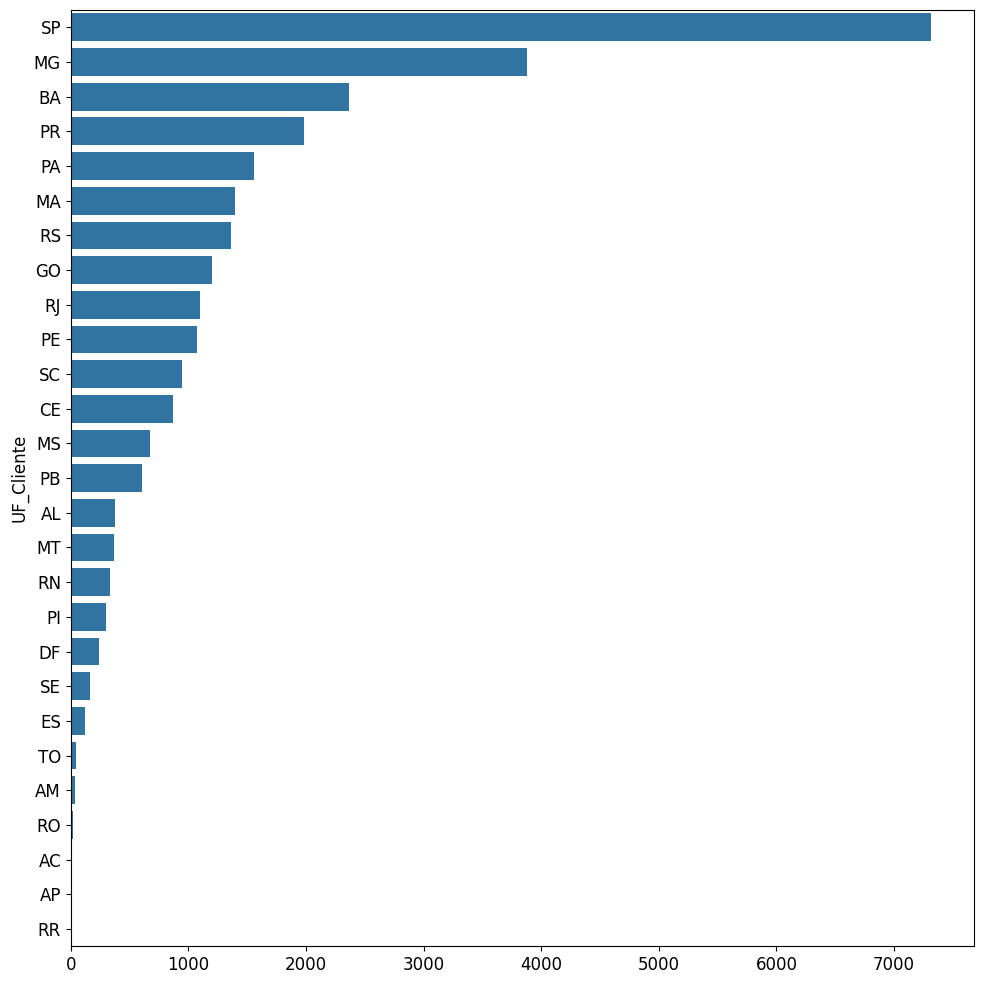

In [297]:
x = adultos_fraude['UF_Cliente'].value_counts().values
y = adultos_fraude['UF_Cliente'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

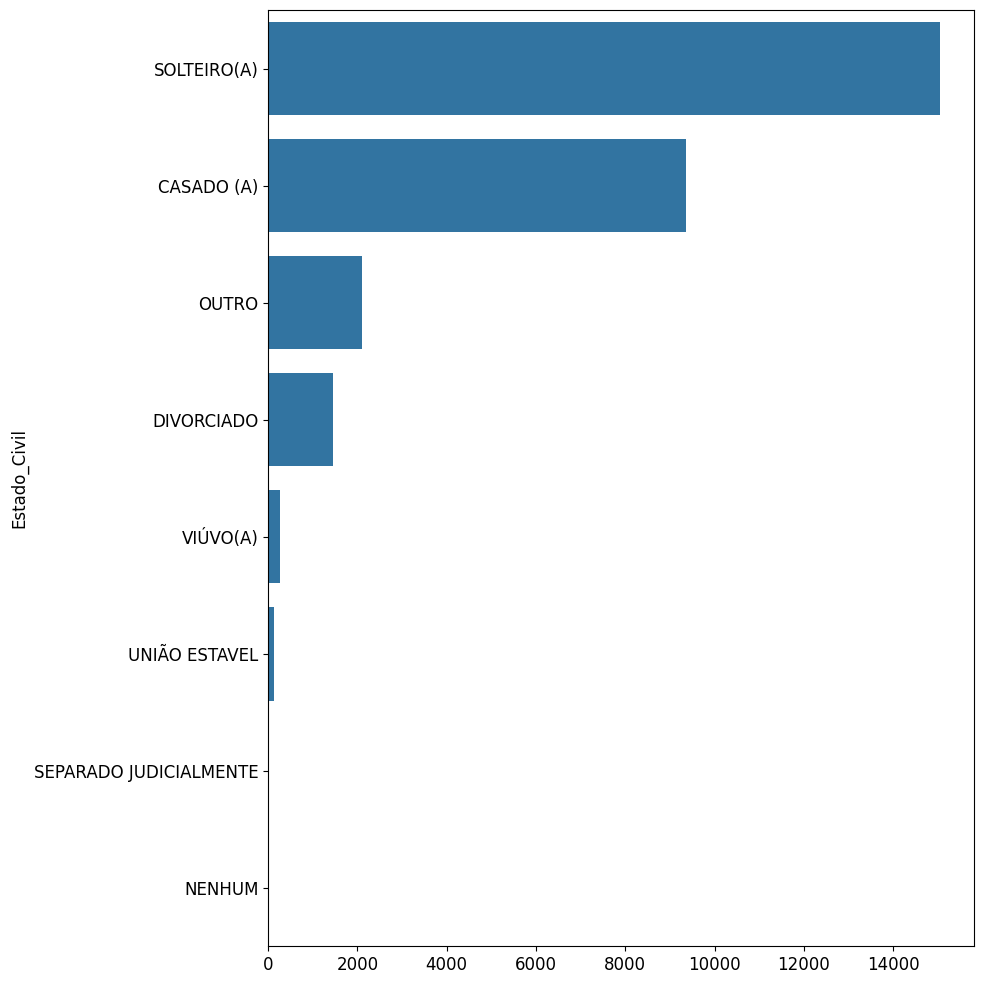

In [298]:
x = adultos_fraude['Estado_Civil'].value_counts().values
y = adultos_fraude['Estado_Civil'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

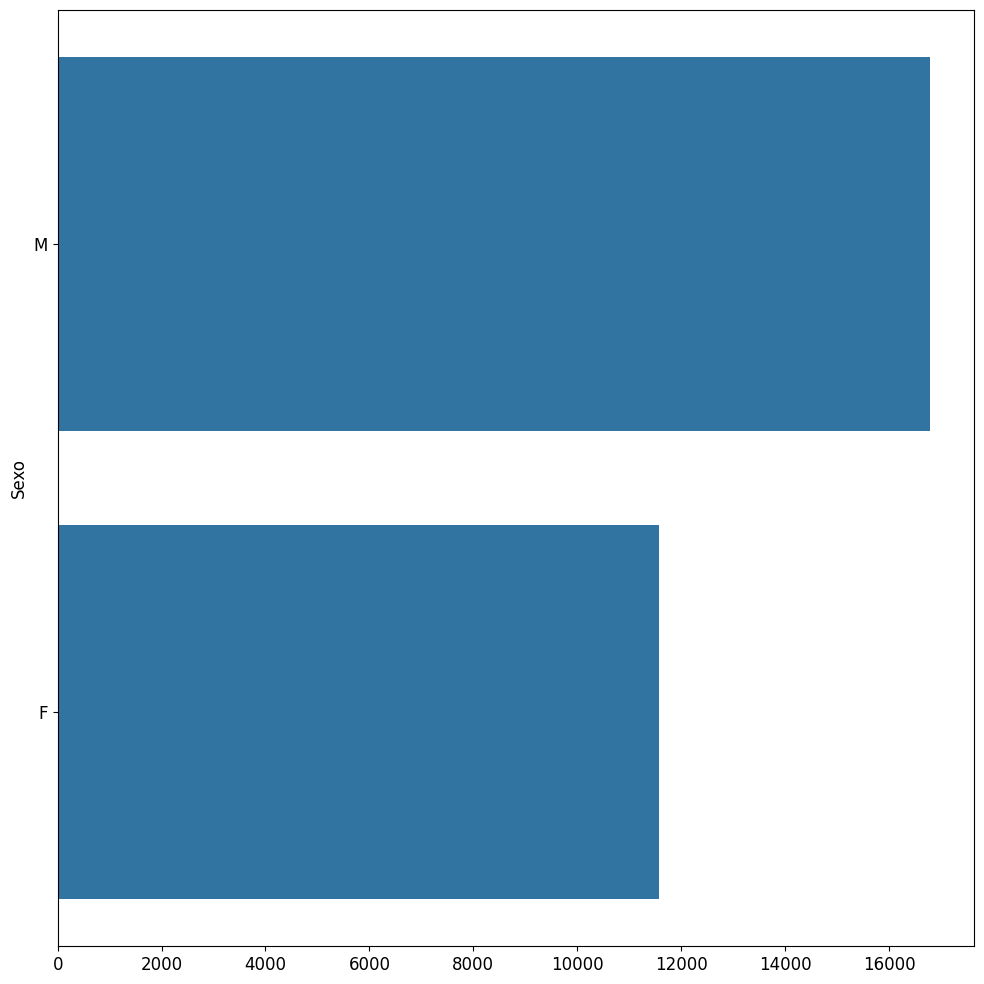

In [299]:
x = adultos_fraude['Sexo'].value_counts().values
y = adultos_fraude['Sexo'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

<Axes: xlabel='Possivel_Fraude', ylabel='count'>

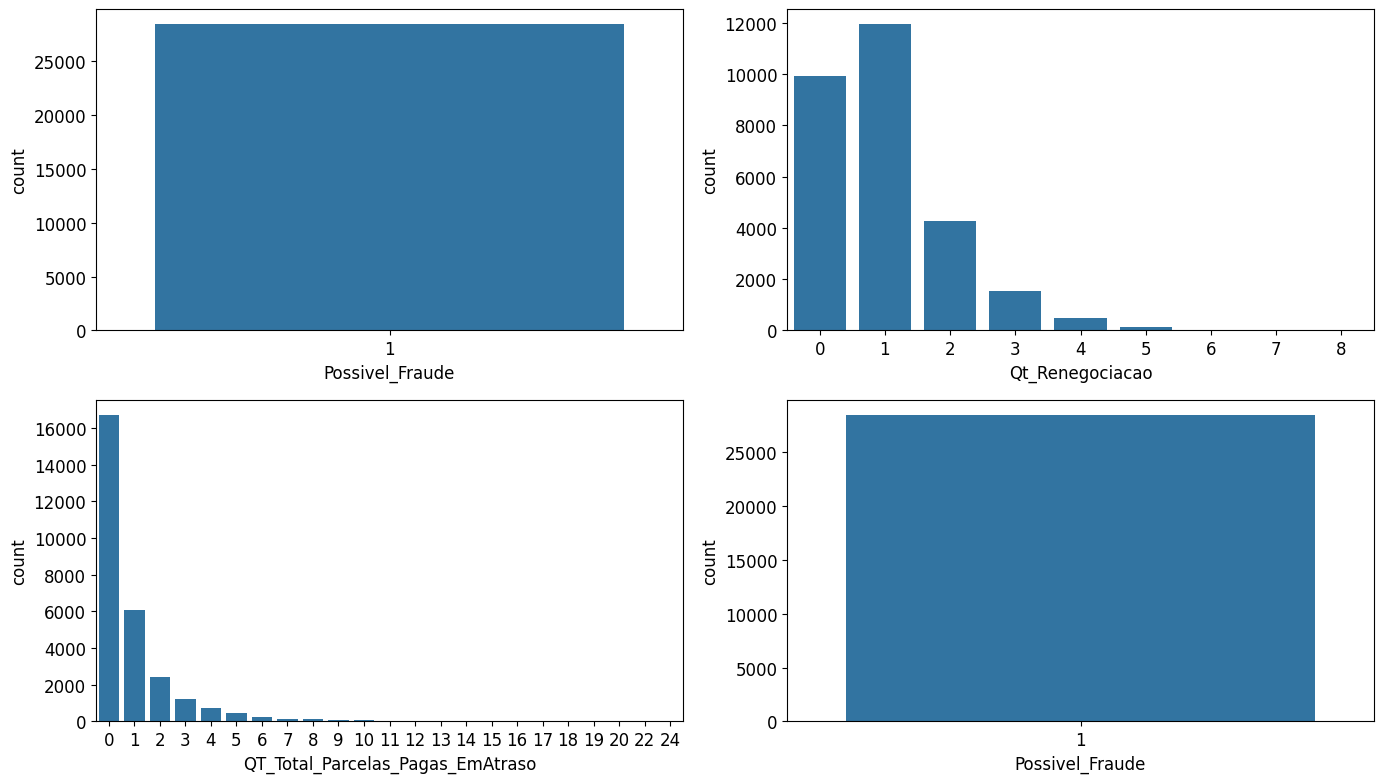

In [300]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adultos_fraude, x="Possivel_Fraude", ax=axes[0][0])
sns.countplot(data = adultos_fraude, x="Qt_Renegociacao", ax=axes[0][1])
sns.countplot(data = adultos_fraude, x="QT_Total_Parcelas_Pagas_EmAtraso", ax=axes[1][0])
sns.countplot(data = adultos_fraude, x="Possivel_Fraude", ax=axes[1][1])

### VERIFICANDO AS DATAS DAS FRAUDES QUE OCORRERAM DOS ADULTOS

Text(0.5, 0, 'Mês')

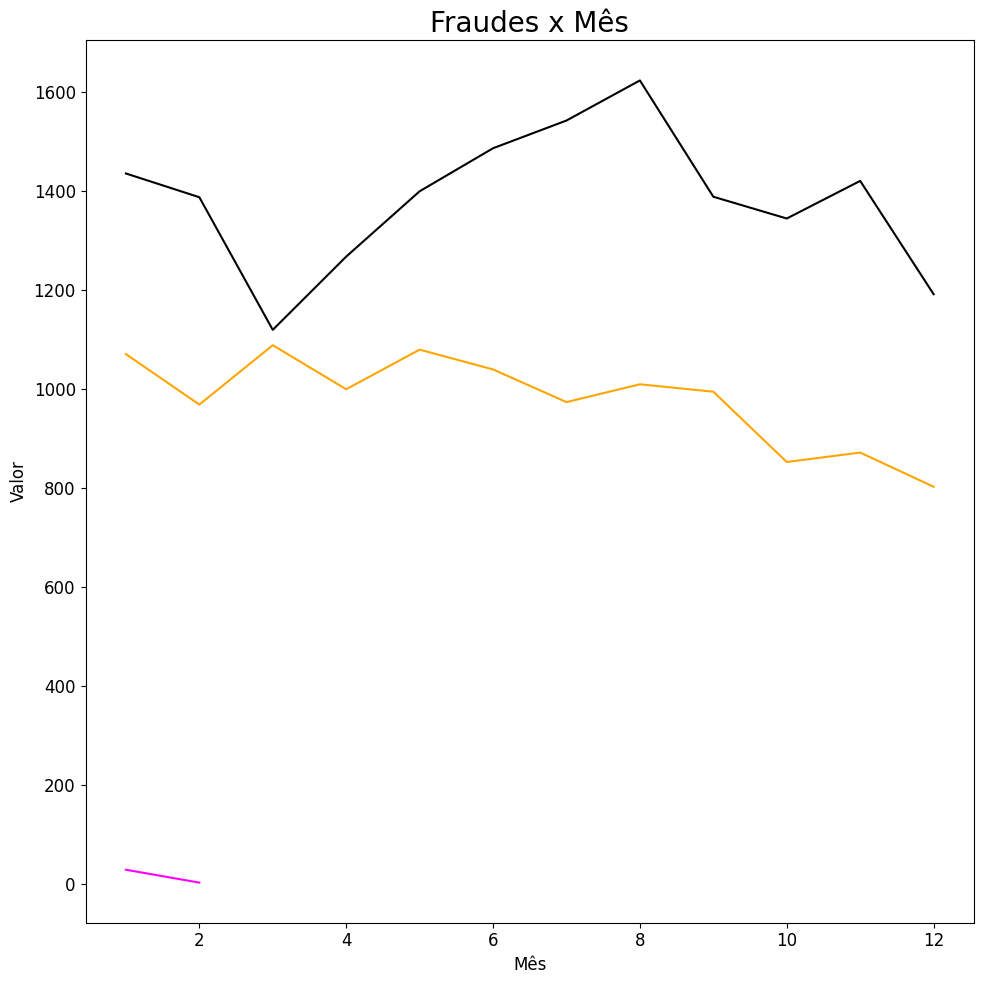

In [301]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
adultos_fraude['Data_Contratacao'] = pd.to_datetime(adultos_fraude['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
fraude_adulto_df_2020 = adultos_fraude[adultos_fraude["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
fraude_adulto_df_2021 = adultos_fraude[adultos_fraude["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
fraude_adulto_df_2022 = adultos_fraude[adultos_fraude["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
fraude_adulto_df_2023 = adultos_fraude[adultos_fraude["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
fraude_adulto_df_2020.groupby(fraude_adulto_df_2020["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='red', label='Ano 2020')
fraude_adulto_df_2021.groupby(fraude_adulto_df_2021["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='black', label='Ano 2021')
fraude_adulto_df_2022.groupby(fraude_adulto_df_2022["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='orange', label='Ano 2022')
fraude_adulto_df_2023.groupby(fraude_adulto_df_2023["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Fraudes x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

In [302]:
# ANALISANDO 2020
(fraude_adulto_df_2020.groupby(fraude_adulto_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,


In [303]:
# ANALISANDO 2021
(fraude_adulto_df_2021.groupby(fraude_adulto_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2021,1435
02-2021,1387
03-2021,1119
04-2021,1267
05-2021,1399
06-2021,1486
07-2021,1542
08-2021,1623
09-2021,1388


In [304]:
# ANALISANDO 2022
(fraude_adulto_df_2022.groupby(fraude_adulto_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2022,1070
02-2022,968
03-2022,1088
04-2022,999
05-2022,1079
06-2022,1039
07-2022,973
08-2022,1009
09-2022,994


In [305]:
# ANALISANDO 2023
(fraude_adulto_df_2023.groupby(fraude_adulto_df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2023,28
02-2023,2


### IDOSOS

In [306]:
idosos_fraude = fraude.query('Idade > 59 and Idade <= 103')
idosos_fraude['Idade'].value_counts().sum()

3216

### ANALISANDO POR SEXO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO, SOMA LUCROS

In [307]:
quantidade = idosos_fraude.groupby(["Sexo"])["Idade"].count().rename('Quantidade')
mediarenda = idosos_fraude.groupby(['Sexo'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =idosos_fraude.groupby(['Sexo'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = idosos_fraude.groupby(['Sexo'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = idosos_fraude.groupby(['Sexo'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = idosos_fraude.groupby(['Sexo'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = idosos_fraude.groupby(['Sexo'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = idosos_fraude.groupby(['Sexo'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
Sexo,,,,,,,,
M,1648,"$3,500.00",$20.00,"$50,000.00","$58,914.82","$3,817,183.39",2.09,18.91
F,1568,"$3,000.00",$20.00,"$60,000.00","$69,505.83","$3,354,437.27",2.27,18.40


### ANALISANDO POR ESTADO MEDIA RENDAS, JUROS, EMPRÉSTIMO, SALDO E SOMA LUCRO

In [308]:
quantidade = idosos_fraude.groupby(["UF_Cliente"])["Idade"].count().rename('Quantidade')
mediarenda = idosos_fraude.groupby(['UF_Cliente'])['Valor_Renda'].median().rename('MédiaRenda')
mediaJuros =idosos_fraude.groupby(['UF_Cliente'])['Perc_Juros'].median().rename('MédiaJuros')
MediaEmprestimo = idosos_fraude.groupby(['UF_Cliente'])['VL_Emprestimo'].median().rename('MédiaEmprétismo')
saldo = idosos_fraude.groupby(['UF_Cliente'])['Saldo_Devedor'].median().rename('MédiaSaldos')
lucro = idosos_fraude.groupby(['UF_Cliente'])['Total_Pago'].sum().rename('TotalLucro')
Parcelas_Pagas_EmDia = idosos_fraude.groupby(['UF_Cliente'])['QT_Total_Parcelas_Pagas_EmDia'].mean().rename('MediaParcelasPagaDia')
parcelasatrasadas = idosos_fraude.groupby(['UF_Cliente'])['QT_Parcelas_Atraso'].mean().rename('MediaParcelasAtrasadas')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":quantidade,'MédiaRenda':mediarenda,'MédiaJuros':mediaJuros,'MédiaEmprétismo':MediaEmprestimo,'MédiaSaldos':saldo,'TotalLucro':lucro,'MediaParcelasPagaDia':Parcelas_Pagas_EmDia,'MediaParcelasAtrasadas':parcelasatrasadas})
dados_usuarios ["MédiaRenda"] = dados_usuarios["MédiaRenda"].map("${:,.2f}".format)
dados_usuarios ["MédiaJuros"] = dados_usuarios["MédiaJuros"].map("${:,.2f}".format)
dados_usuarios ["MédiaEmprétismo"] = dados_usuarios["MédiaEmprétismo"].map("${:,.2f}".format)
dados_usuarios ["MédiaSaldos"] = dados_usuarios["MédiaSaldos"].map("${:,.2f}".format)
dados_usuarios ["TotalLucro"] = dados_usuarios["TotalLucro"].map("${:,.2f}".format)

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,MédiaRenda,MédiaJuros,MédiaEmprétismo,MédiaSaldos,TotalLucro,MediaParcelasPagaDia,MediaParcelasAtrasadas
UF_Cliente,,,,,,,,
SP,922,"$3,500.00",$20.00,"$65,000.00","$79,384.74","$2,325,892.75",2.38,18.23
MG,367,"$3,000.00",$20.00,"$45,000.00","$48,614.27","$912,381.03",2.22,18.59
PR,244,"$3,500.00",$20.00,"$60,000.00","$72,248.02","$618,520.77",1.96,17.75
BA,222,"$3,000.00",$20.00,"$40,000.00","$43,801.61","$371,738.50",1.77,18.70
RS,211,"$3,000.00",$20.00,"$35,000.00","$39,999.85","$382,617.06",1.97,19.49


### PLOTANDO EM UM GRAFICO AS INFORMAÇÕES

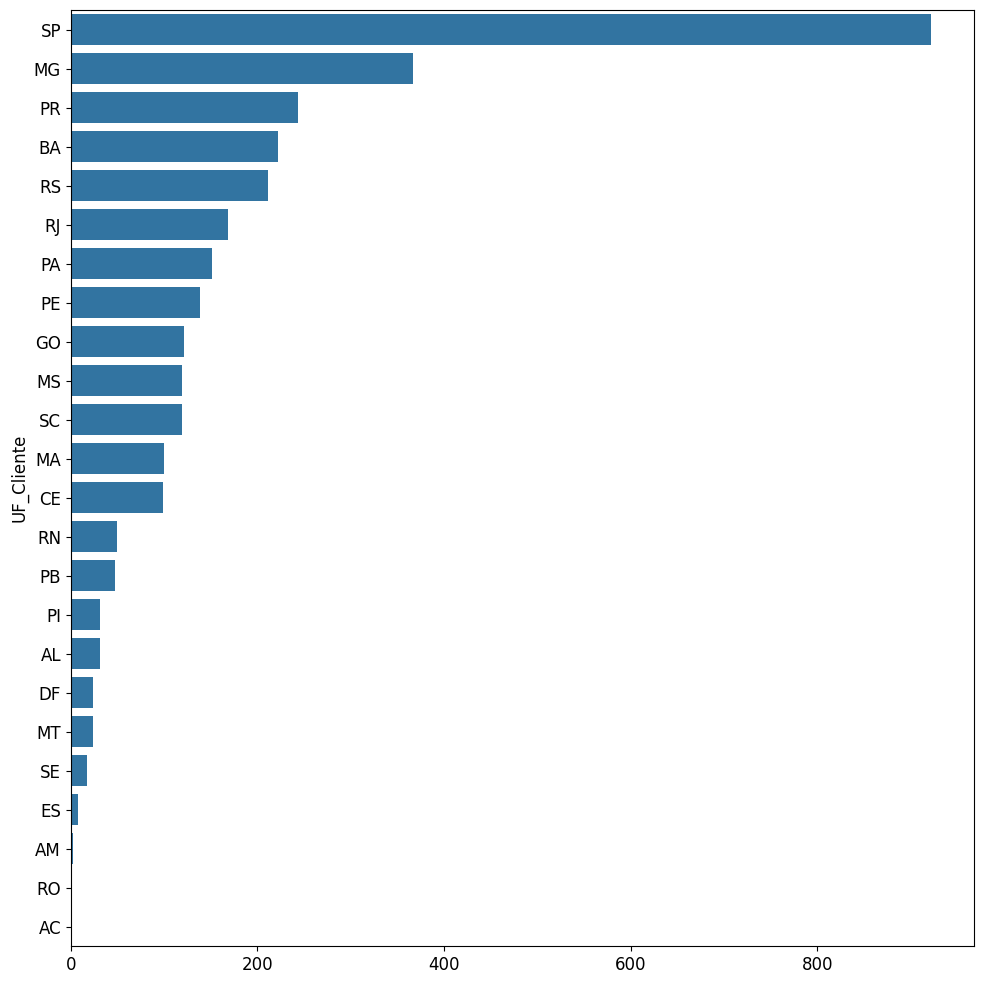

In [309]:
x = idosos_fraude['UF_Cliente'].value_counts().values
y = idosos_fraude['UF_Cliente'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

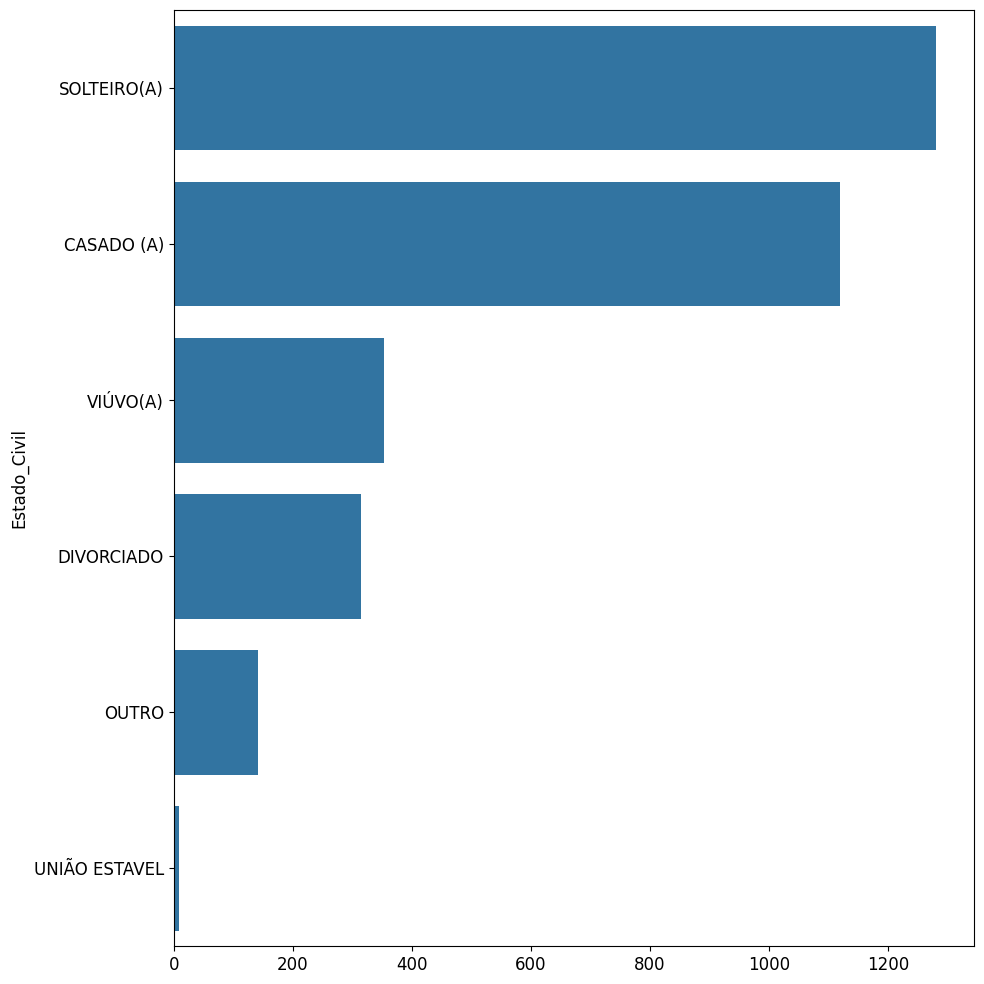

In [310]:
x = idosos_fraude['Estado_Civil'].value_counts().values
y = idosos_fraude['Estado_Civil'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

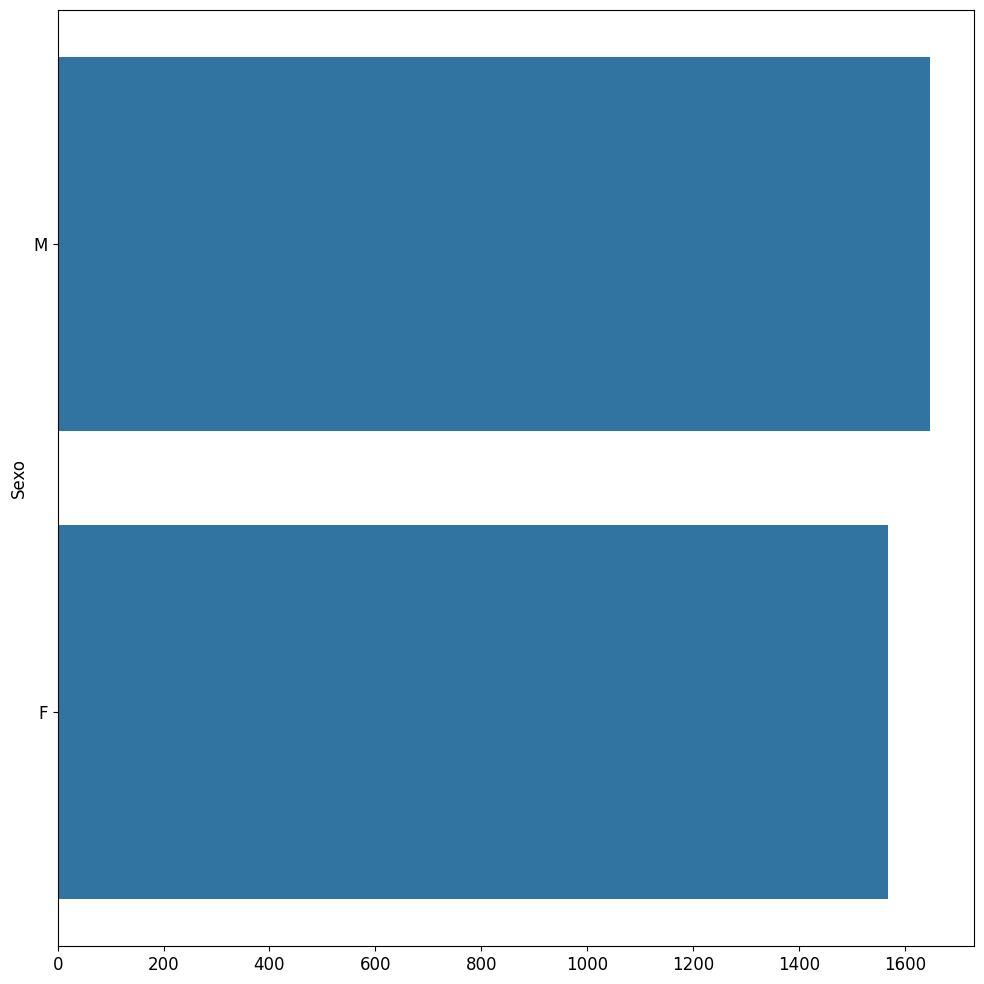

In [311]:
x = idosos_fraude['Sexo'].value_counts().values
y = idosos_fraude['Sexo'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

<Axes: xlabel='Possivel_Fraude', ylabel='count'>

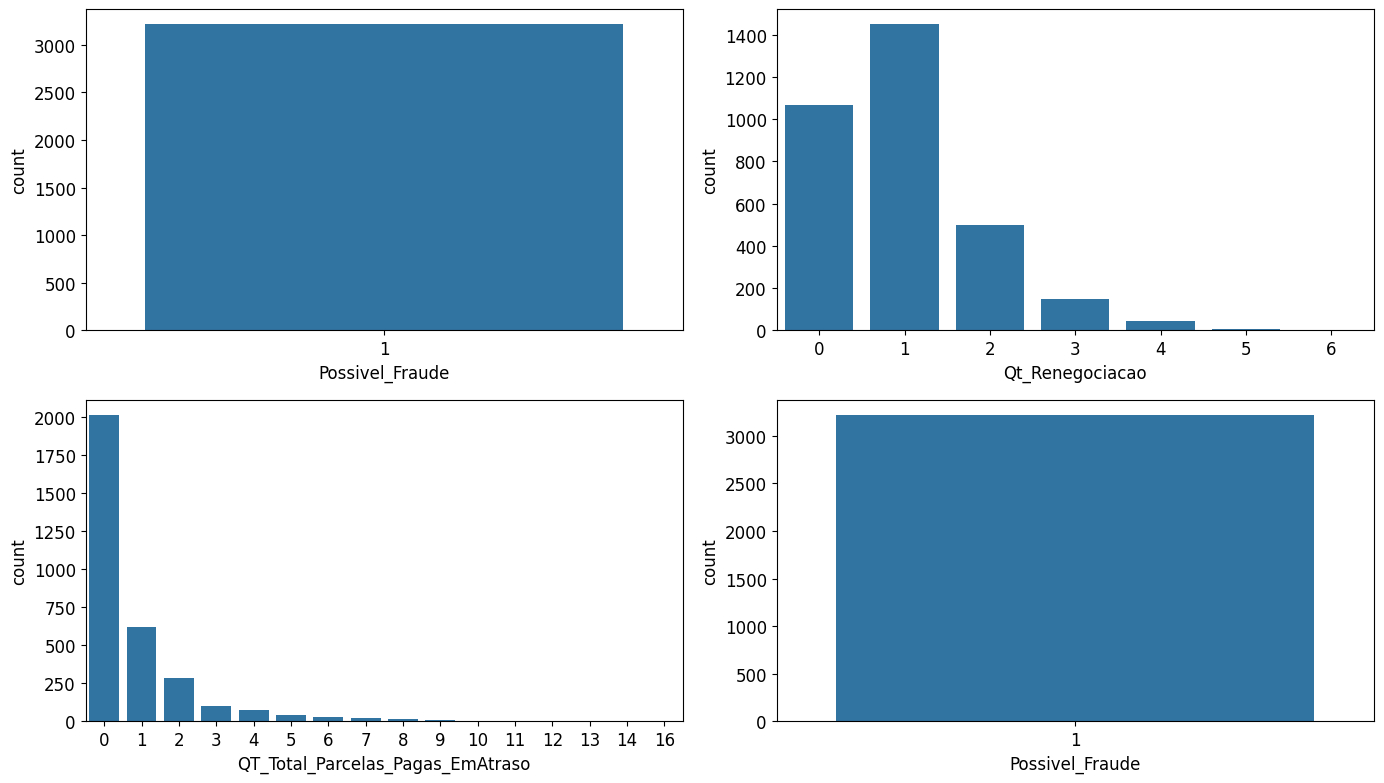

In [312]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = idosos_fraude, x="Possivel_Fraude", ax=axes[0][0])
sns.countplot(data = idosos_fraude, x="Qt_Renegociacao", ax=axes[0][1])
sns.countplot(data = idosos_fraude, x="QT_Total_Parcelas_Pagas_EmAtraso", ax=axes[1][0])
sns.countplot(data = idosos_fraude, x="Possivel_Fraude", ax=axes[1][1])

### VERIFICANDO AS DATAS DAS FRAUDES QUE OCORRERAM DOS IDOSOS

Text(0.5, 0, 'Mês')

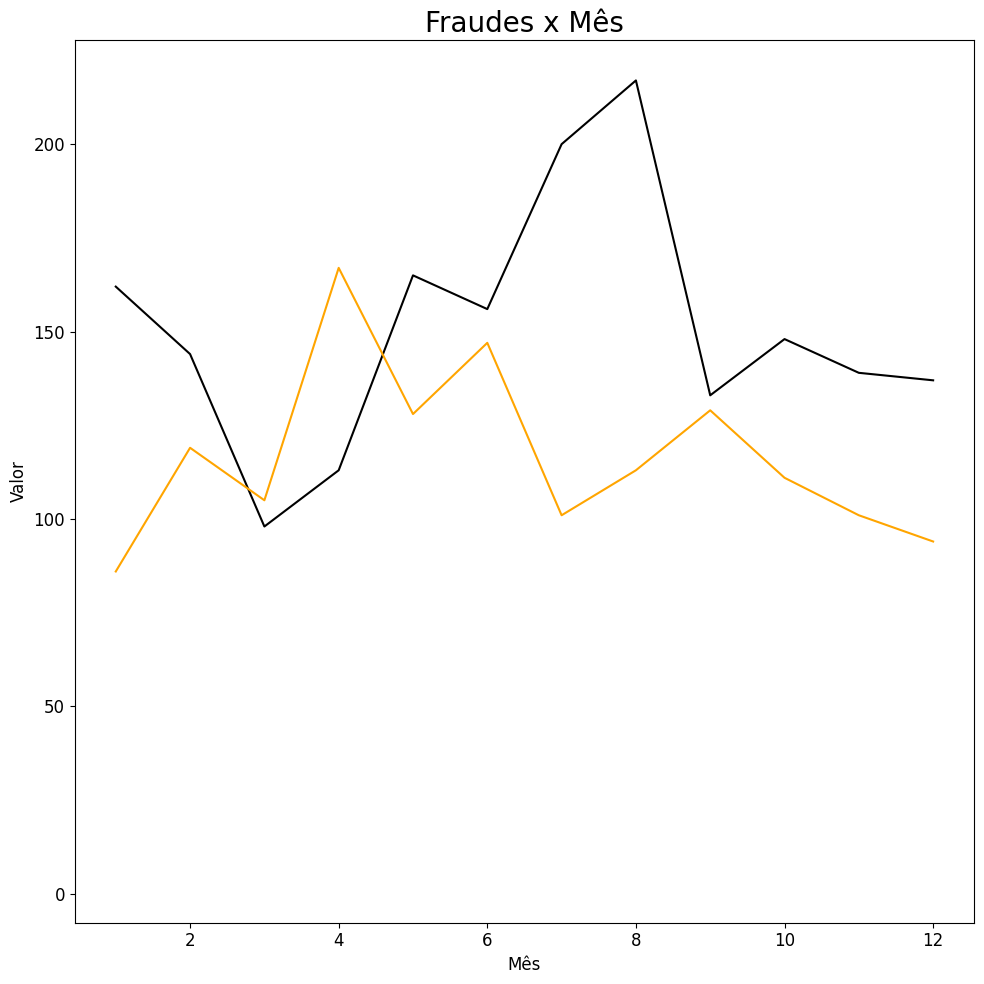

In [313]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

# Formatando tamanho do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 20

# Convertendo o campo DATA_VENDA para DateTime
idosos_fraude['Data_Contratacao'] = pd.to_datetime(idosos_fraude['Data_Contratacao'], format="%d/%m/%Y")

# Selecionando apenas as vendas de 2020
fraude_idosos_df_2020 = idosos_fraude[idosos_fraude["Data_Contratacao"].dt.year == 2020]

# Selecionando apenas as vendas de 2021
fraude_idosos_df_2021 = idosos_fraude[idosos_fraude["Data_Contratacao"].dt.year == 2021]

# Selecionando apenas as vendas de 2022
fraude_idosos_df_2022 = idosos_fraude[idosos_fraude["Data_Contratacao"].dt.year == 2022]

# Selecionando apenas as vendas de 2023
fraude_idosos_df_2023 = idosos_fraude[idosos_fraude["Data_Contratacao"].dt.year == 2023]

# Comparativo de lucro bruto por mês
fraude_idosos_df_2020.groupby(fraude_idosos_df_2020["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='red', label='Ano 2020')
fraude_idosos_df_2021.groupby(fraude_idosos_df_2021["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='black', label='Ano 2021')
fraude_idosos_df_2022.groupby(fraude_idosos_df_2022["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='orange', label='Ano 2022')
fraude_idosos_df_2023.groupby(fraude_idosos_df_2023["Data_Contratacao"].dt.month)["Possivel_Fraude"].sum().plot(color='magenta', label='Ano 2023')

plt.title("Fraudes x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

In [314]:
# ANALISANDO 2020
(fraude_idosos_df_2020.groupby(fraude_idosos_df_2020["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,


In [315]:
# ANALISANDO 20201
(fraude_idosos_df_2021.groupby(fraude_idosos_df_2021["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2021,162
02-2021,144
03-2021,98
04-2021,113
05-2021,165
06-2021,156
07-2021,200
08-2021,217
09-2021,133


In [316]:
# ANALISANDO 2022
(fraude_idosos_df_2022.groupby(fraude_idosos_df_2022["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2022,86
02-2022,119
03-2022,105
04-2022,167
05-2022,128
06-2022,147
07-2022,101
08-2022,113
09-2022,129


In [317]:
# ANALISANDO 2023
(fraude_idosos_df_2023.groupby(fraude_idosos_df_2023["Data_Contratacao"].dt.strftime('%m-%Y')).agg({"Possivel_Fraude": "sum"}))

,Possivel_Fraude
Data_Contratacao,
01-2023,3


# MACHINE LEARNING

## PRÉ-PROCESSAMENTO DE DADOS

### EXCLUINDO VARIAVEÍS NÃO SERÃO QUE ÚTEIS

In [318]:
del df['Data_Contratacao']
del df['VL_Emprestimo_ComJuros']
del df['Estado_Civil']
del df['Possui_Patrimonio']
del df['VL_Patrimonio']
del df['Contrato']
del df['Total_Pago']
del df['QT_Dias_Atraso']
del df['Qt_Renegociacao']

In [319]:
df.head(10)

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,QT_Parcelas_Atraso,Saldo_Devedor,Possivel_Fraude
0,42,M,4000.00,MA,17.00,140,143,160000.00,2,1,1,10,187861.70,1
1,31,M,3000.00,MA,20.00,28,0,14000.00,2,1,1,26,16615.93,1
2,36,F,2100.00,SP,24.00,180,149,60000.00,4,1,0,27,74443.40,1
3,28,M,2155.00,DF,19.00,190,159,180000.00,29,28,0,2,196812.41,0
4,21,F,4300.00,MG,22.00,100,94,30000.00,4,3,0,6,36114.39,1
5,32,M,6000.00,RS,22.00,100,91,30000.00,3,2,0,9,36379.10,1
6,42,F,3800.00,PR,24.00,36,15,10000.00,25,23,0,0,3911.25,0
7,30,F,6000.00,BA,20.00,200,225,300000.00,20,11,1,1,341628.55,0
8,20,F,2024.74,MG,18.00,25,13,14000.00,13,8,0,0,8064.00,0
9,41,F,4000.00,MG,18.00,25,10,9000.00,18,16,0,0,2304.81,0


### Cria o encoder

In [320]:
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df['Sexo'] = lb.fit_transform(df['Sexo'])
df['UF_Cliente'] = lb.fit_transform(df['UF_Cliente'])
# Remove valores missing eventualmente gerados
df.dropna(inplace = True)

### Correlação

In [321]:

df.corr()

,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,QT_Parcelas_Atraso,Saldo_Devedor,Possivel_Fraude
Idade,1.00,-0.07,0.00,0.07,0.02,0.08,0.08,0.10,0.07,0.02,0.01,-0.05,0.09,-0.05
Sexo,-0.07,1.00,0.00,-0.01,-0.09,-0.06,-0.06,0.01,0.00,-0.00,-0.02,0.00,-0.01,-0.01
Valor_Renda,0.00,0.00,1.00,-0.00,-0.01,-0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,0.00,-0.01
UF_Cliente,0.07,-0.01,-0.00,1.00,0.00,0.10,0.11,0.13,0.02,0.02,-0.05,-0.00,0.13,0.01
Perc_Juros,0.02,-0.09,-0.01,0.00,1.00,0.11,0.09,-0.03,-0.14,-0.08,-0.03,0.06,0.03,0.11
Prazo_Emprestimo,0.08,-0.06,-0.00,0.10,0.11,1.00,0.98,0.70,-0.14,-0.07,-0.19,0.14,0.73,0.20
Prazo_Restante,0.08,-0.06,-0.00,0.11,0.09,0.98,1.00,0.73,-0.15,-0.07,-0.20,0.12,0.76,0.19
VL_Emprestimo,0.10,0.01,0.01,0.13,-0.03,0.70,0.73,1.00,-0.06,-0.05,-0.12,0.04,0.98,0.08
QT_Total_Parcelas_Pagas,0.07,0.00,0.00,0.02,-0.14,-0.14,-0.15,-0.06,1.00,0.70,0.49,-0.76,-0.14,-0.79
QT_Total_Parcelas_Pagas_EmDia,0.02,-0.00,-0.00,0.02,-0.08,-0.07,-0.07,-0.05,0.70,1.00,-0.03,-0.53,-0.10,-0.54


### Separa X e y

In [322]:
# Supondo que 'df_traduzida' seja o DataFrame com seus dados
# Separa X e y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Cria o balanceador SMOTE

Contagem de classes antes do balanceamento:
Possivel_Fraude
1    44511
0    35632
Name: count, dtype: int64

Contagem de classes após o balanceamento:
Possivel_Fraude
1    44511
0    44511
Name: count, dtype: int64


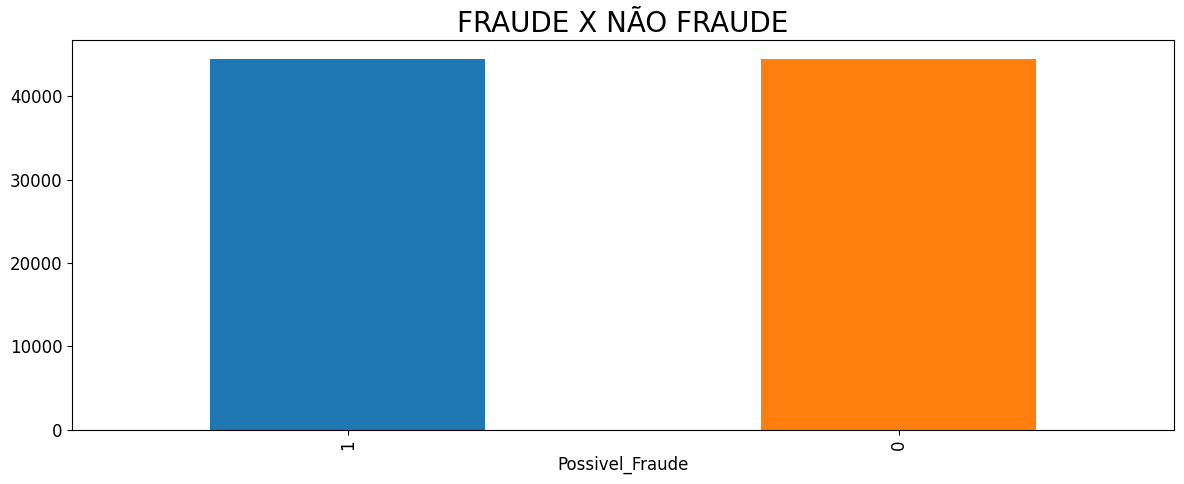

In [323]:
# Seed para reproduzir o mesmo resultado
seed = 100


smote_bal = SMOTE(random_state=seed)
# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='FRAUDE X NÃO FRAUDE',color = ['#1F77B4', '#FF7F0E']);

### SEPRANDO AS VARIAVEIS PARA TREINAMENTO

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

### CRIAÇÃO E TREINAMENTO DO MODELO DE MACHINE LEARNING 

In [325]:
from xgboost import XGBClassifier

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [326]:
y_pred = modelo.predict(X_test)
previsoes = [round(value) for value in y_pred]

### Avaliando as previsões


In [327]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 98.88%


In [328]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))
print(cm)


---------------------------

Accuracy of Predictions =  0.9888044332946418

---------------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13292
           1       0.99      0.99      0.99     13415

    accuracy                           0.99     26707
   macro avg       0.99      0.99      0.99     26707
weighted avg       0.99      0.99      0.99     26707

[[13096   196]
 [  103 13312]]


### SALVAR O MODELO PARA POR EM PRODUÇÃO

In [329]:
import pickle 
pickle_out = open("maquina_preditiva_fraude.pkl", mode = "wb") 
pickle.dump(modelo, pickle_out) 
pickle_out.close() 

In [1]:
import xgboost as xgb

print(xgb.__version__)



2.0.0
